In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from pylatexenc import *
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.circuit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit import transpile
from qiskit.providers.basic_provider import BasicProvider
from matplotlib import pyplot as plt

# kickback

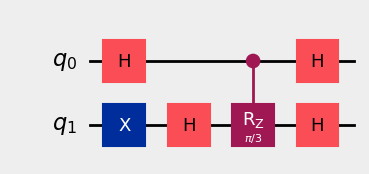

In [2]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0,1])
qc.crz(math.pi/3, 0, 1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

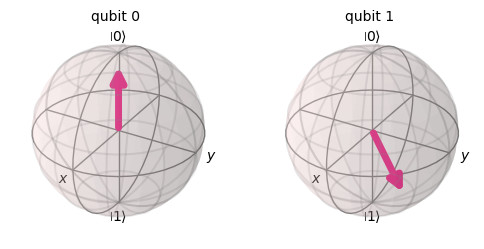

In [3]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

# QAE e QPE

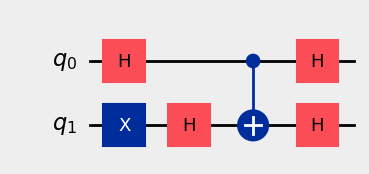

In [4]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0,1])
qc.cx(0, 1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

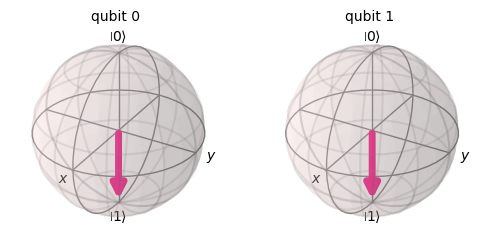

In [5]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

{'11': 1}


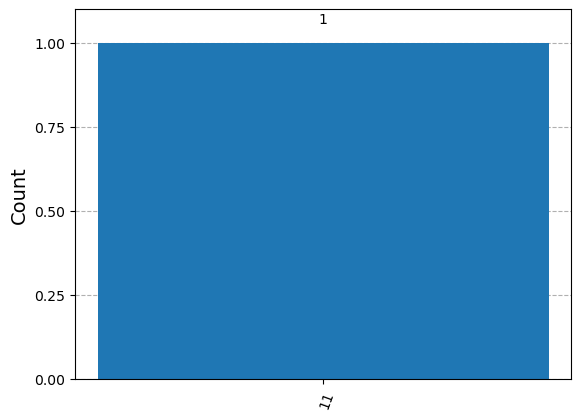

In [6]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# tabela periódica

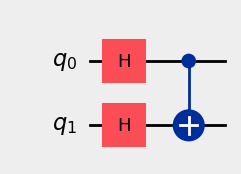

In [7]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0, 1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

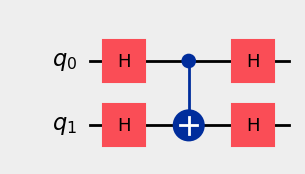

In [8]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0, 1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

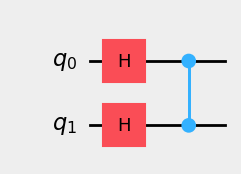

In [9]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cz(0, 1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

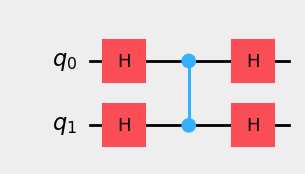

In [10]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cz(0, 1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

# Deutsch-Jozsa

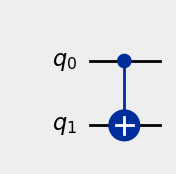

In [11]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

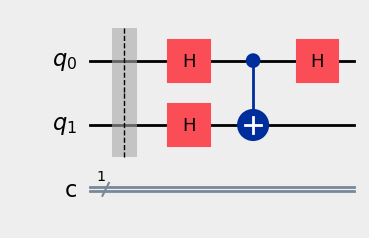

In [12]:
#f(0)=1 e f(1)=0
qc = QuantumCircuit(2,1)
#qc.x(0)
qc.barrier(0,1)
qc.h([0,1])
qc.cx(0,1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

/Users/glaucoreis/anaconda3/lib/python3.11/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.4' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/glaucoreis/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


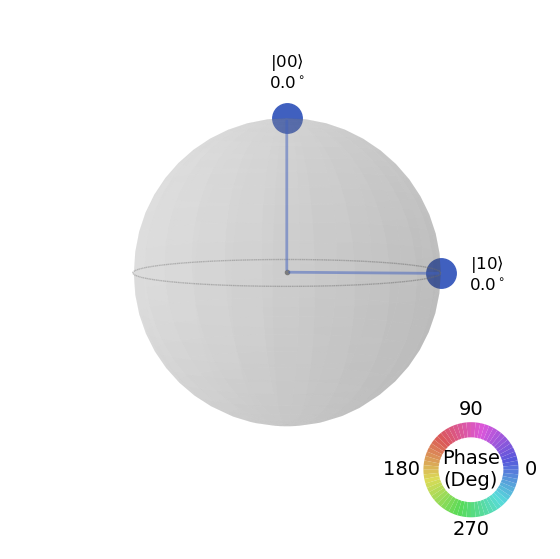

In [13]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

{'0': 1}


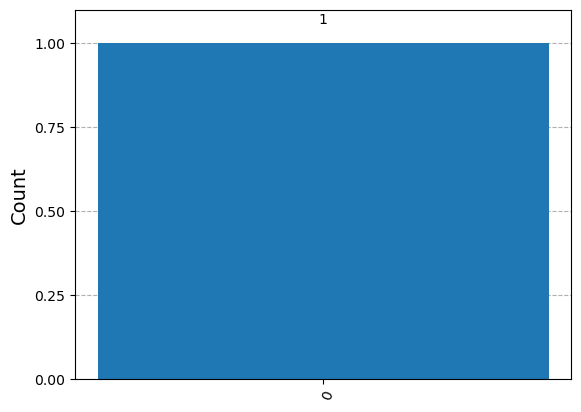

In [14]:
qc.measure(1,0)
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

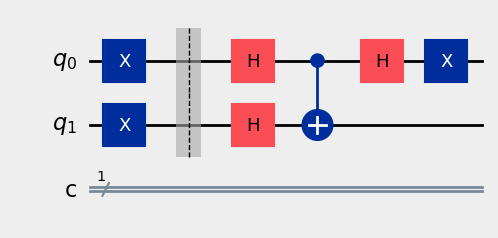

In [15]:
#f(0) = 0 e f(1)=1
qc = QuantumCircuit(2,1)
qc.x([0,1])
qc.barrier(0,1)
qc.h([0,1])
qc.cx(0,1)
qc.h(0)
qc.x(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

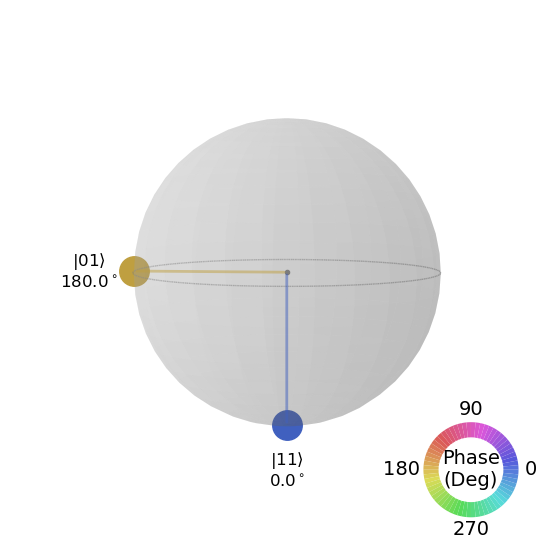

In [16]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

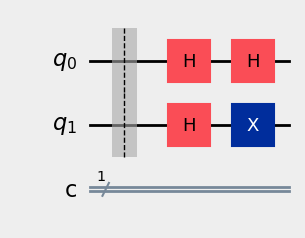

In [17]:
#f(0) = 0 e f(1)=0
qc = QuantumCircuit(2,1)
qc.barrier(0,1)
qc.h([0,1])
qc.h(0)
qc.x(1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

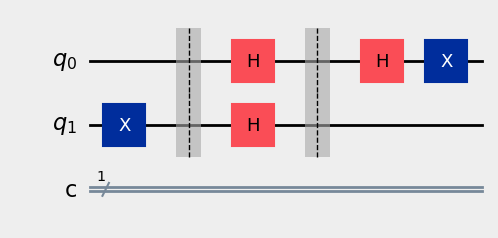

In [18]:
#f(0) = 0 e f(1)=0
qc = QuantumCircuit(2,1)
qc.x(1)
qc.barrier(0,1)
qc.h([0,1])
qc.barrier(0,1)
qc.h(0)
qc.x(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

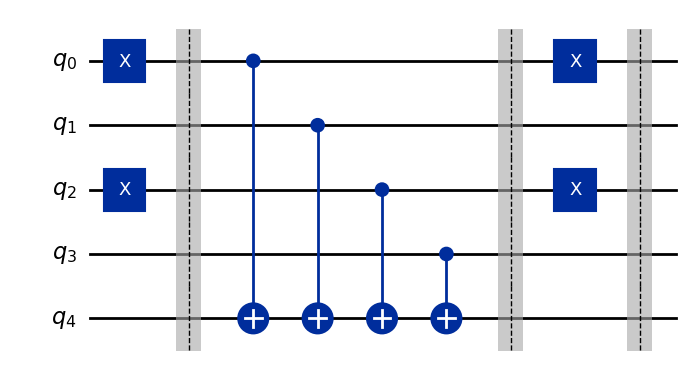

In [19]:
balanced_oracle = QuantumCircuit(5)
balanced_oracle.x(0)
balanced_oracle.x(2)
balanced_oracle.barrier()
for i in range(4):
    balanced_oracle.cx(i,4)
balanced_oracle.barrier()
balanced_oracle.x(0)
balanced_oracle.x(2)
balanced_oracle.barrier()
balanced_oracle.draw('mpl')

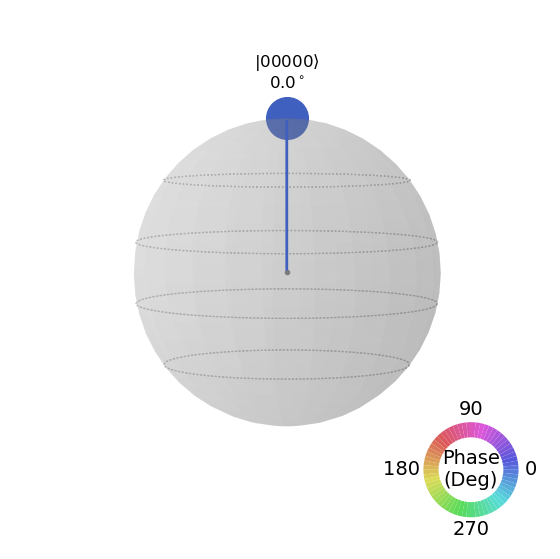

In [20]:
matrix = DensityMatrix(balanced_oracle)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

In [21]:
qc.measure([0,1,2], [0,1,2])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

CircuitError: 'Index 2 out of range for size 2.'

In [ ]:
#Deutsch-Jozsa  000
qc = QuantumCircuit(4,3)
qc.barrier(0,1,2,3)
#qc.x(0)
qc.x(3)
qc.h([0,1,2,3])
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.barrier(0,1,2,3)
qc.h(3)
qc.x(3)
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.h([0,1,2])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [22]:
qc.measure([0,1,2],[0,1,2])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

CircuitError: 'Index 2 out of range for size 2.'

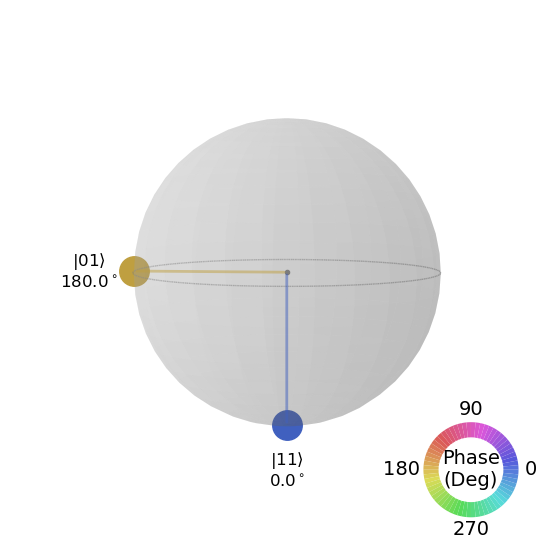

In [23]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

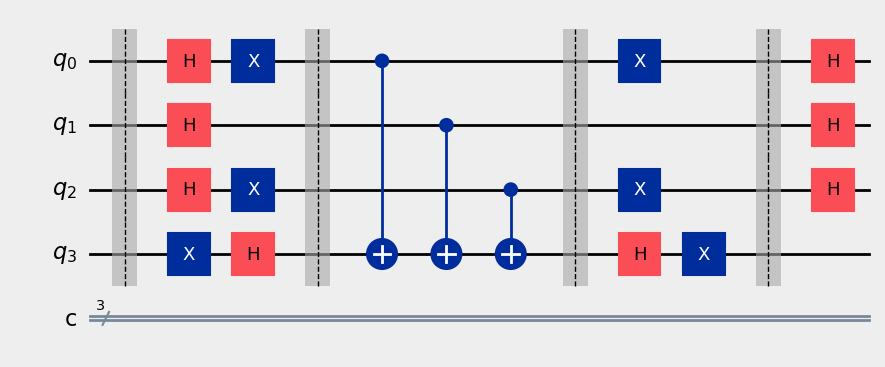

In [24]:
#Deutsch-Jozsa  000
qc = QuantumCircuit(4,3)
qc.barrier(0,1,2,3)
#qc.x(0)
qc.x(3)
qc.h([0,1,2,3])
qc.x([0,2])
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.barrier(0,1,2,3)
qc.x([0,2])
qc.h(3)
qc.x(3)
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.h([0,1,2])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'111': 1024}


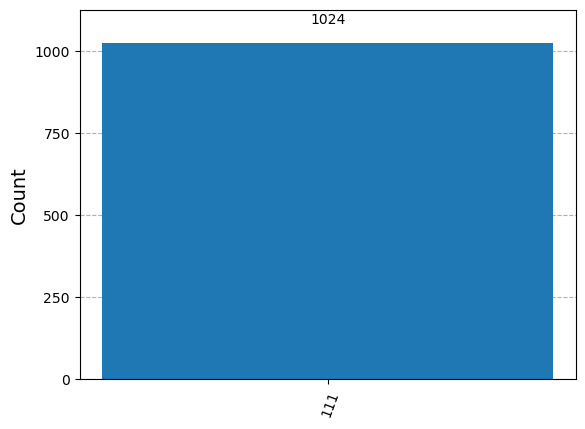

In [25]:
qc.measure([0,1,2], [0,1,2])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

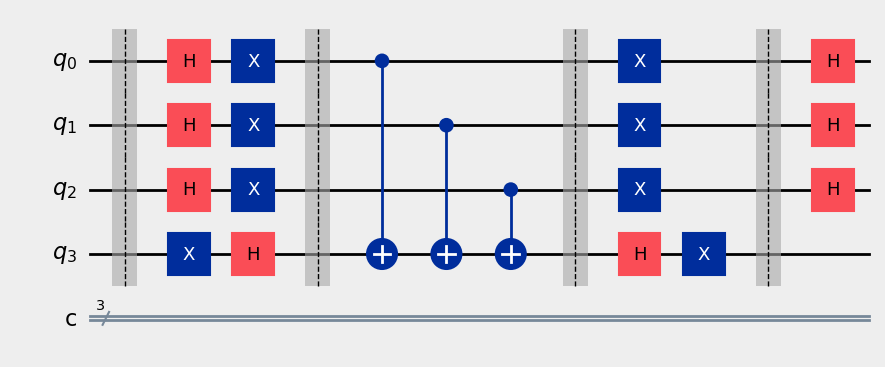

In [26]:
#Deutsch-Jozsa  000
qc = QuantumCircuit(4,3)
qc.barrier(0,1,2,3)
#qc.x(0)
qc.x(3)
qc.h([0,1,2,3])
qc.x([0,1,2])
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.barrier(0,1,2,3)
qc.x([0,1,2])
qc.h(3)
qc.x(3)
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.h([0,1,2])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'111': 1024}


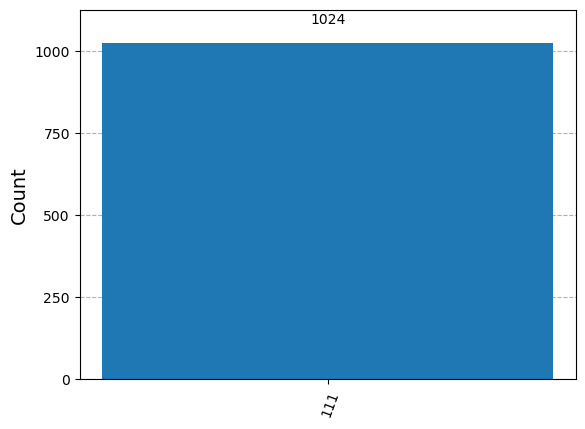

In [27]:
qc.measure([0,1,2], [0,1,2])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

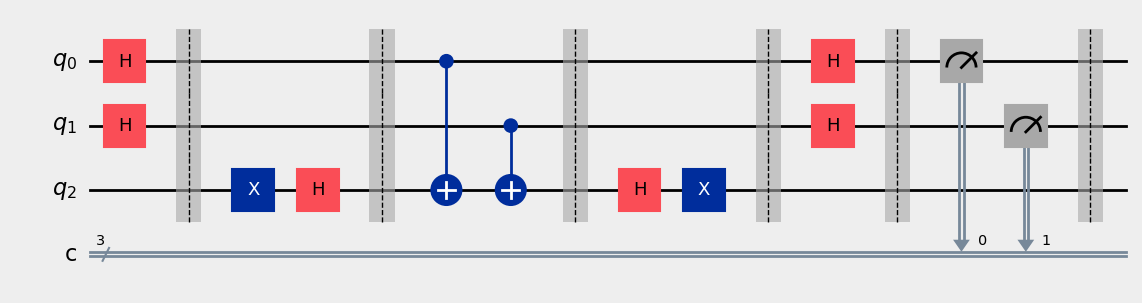

In [28]:
def createOracleBalanced(q,c):
    circuit = QuantumCircuit(q,c)
    circuit.cx(q[0], q[2])
    circuit.cx(q[1], q[2])
    circuit.barrier(q)
    return circuit
def createInitialState(circuit):
    circuit.h(q[0])
    circuit.h(q[1])
    circuit.barrier(q)
def addAncilla(circuit):
    circuit.x(q[2])
    circuit.h(q[2])
    circuit.barrier(q)
def uncomputeAncilla(circuit):
    circuit.h(q[2])
    circuit.x(q[2])
    circuit.barrier(q)
def addMeasurement(circuit):
    circuit.h(q[0])
    circuit.h(q[1])
    circuit.barrier(q)
    circuit.measure(q[0], c[0])
    circuit.measure(q[1], c[1])
    circuit.barrier(q)    

q = QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")
circuit = QuantumCircuit(q,c)
createInitialState(circuit)
addAncilla(circuit)
circuit = circuit.compose(createOracleBalanced(q,c))
uncomputeAncilla(circuit)
addMeasurement(circuit)  
circuit.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'111': 1024}


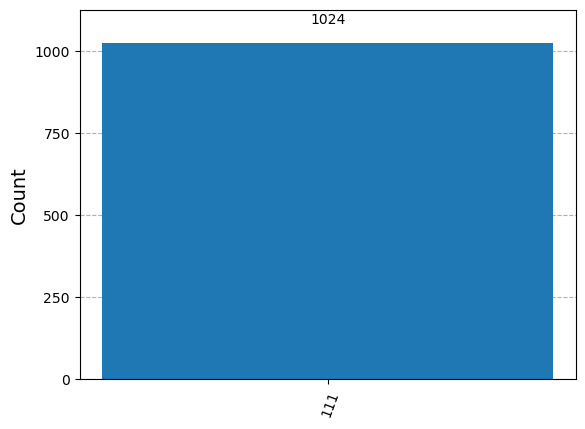

In [29]:
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

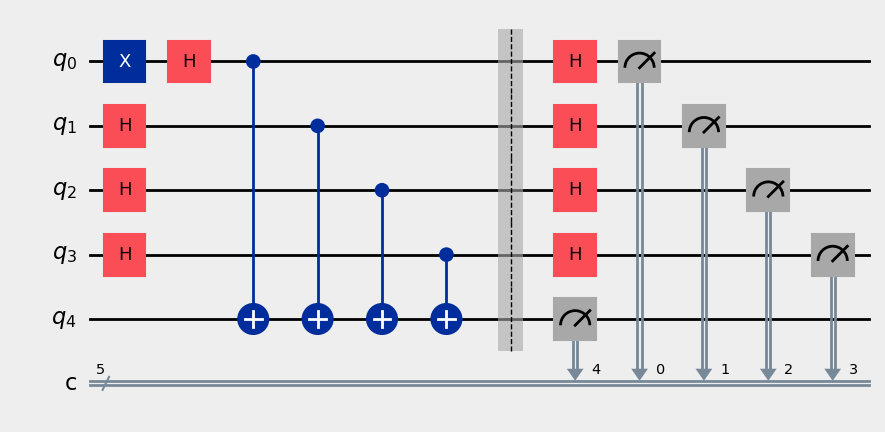

In [30]:
#Deutsch-Jozsa
qc = QuantumCircuit(5,5)
qc.x(0)
qc.h([0,1,2,3])
qc.cx(0,4)
qc.cx(1,4)
qc.cx(2,4)
qc.cx(3,4)
qc.barrier(0,1,2,3,4)
qc.h([0,1,2,3])
qc.measure([0,1,2,3], [0,1,2,3])
qc.measure(4,4)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'01110': 234, '10001': 266, '11110': 277, '00001': 247}


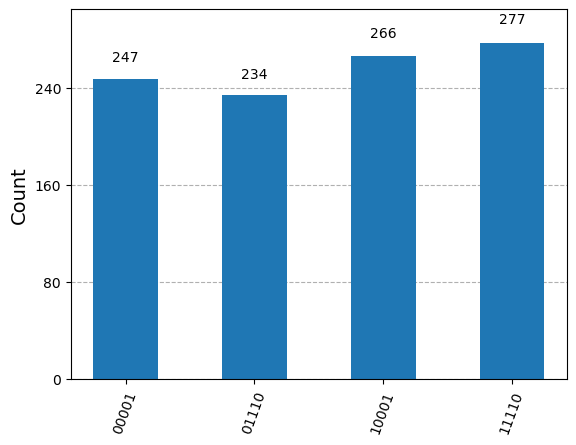

In [31]:
qc.measure(0,0)
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# QFT

# Preparação

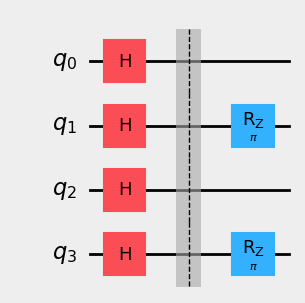

In [32]:
#preparação para QFT de 4 QUBITS 
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.barrier([0,1,2,3])
qc.rz(math.pi, [1,3])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

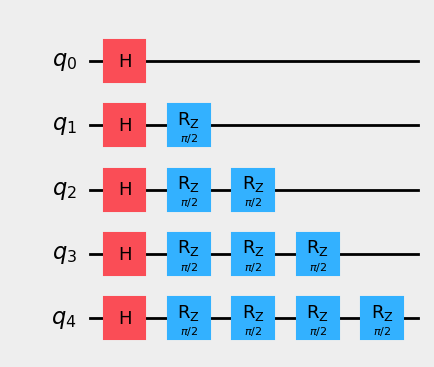

In [33]:
#preparação para QFT 5 QUBITS
qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.rz(math.pi /2, [1,2,3,4])
qc.rz(math.pi /2, [2,3,4])
qc.rz(math.pi /2, [3,4])
qc.rz(math.pi /2, [4])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

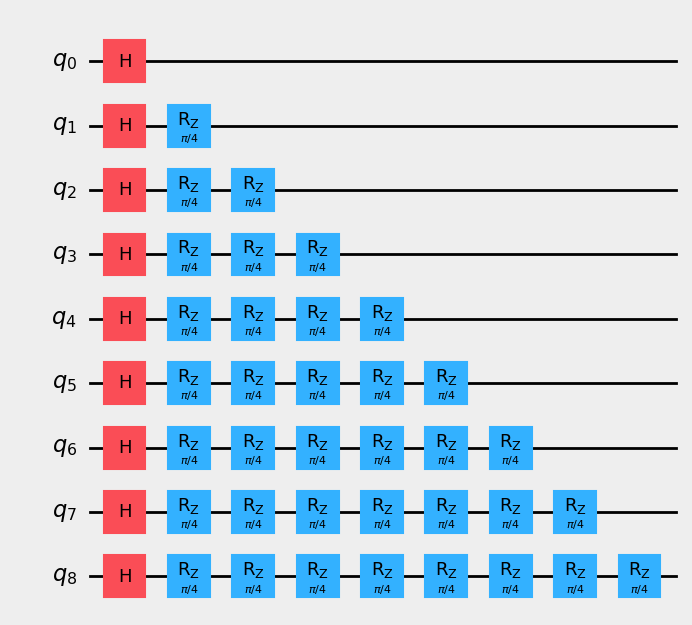

In [34]:
#QFT para 9 QUBITS - preparação
qc = QuantumCircuit(9)
qc.h([0,1,2,3,4,5,6,7,8])
qc.rz(math.pi /4, [1,2,3,4,5,6,7,8])
qc.rz(math.pi /4, [2,3,4,5,6,7,8])
qc.rz(math.pi /4, [3,4,5,6,7,8])
qc.rz(math.pi /4, [4,5,6,7,8])
qc.rz(math.pi /4, [5,6,7,8])
qc.rz(math.pi /4, [6,7,8])
qc.rz(math.pi /4, [7,8])
qc.rz(math.pi /4, [8])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

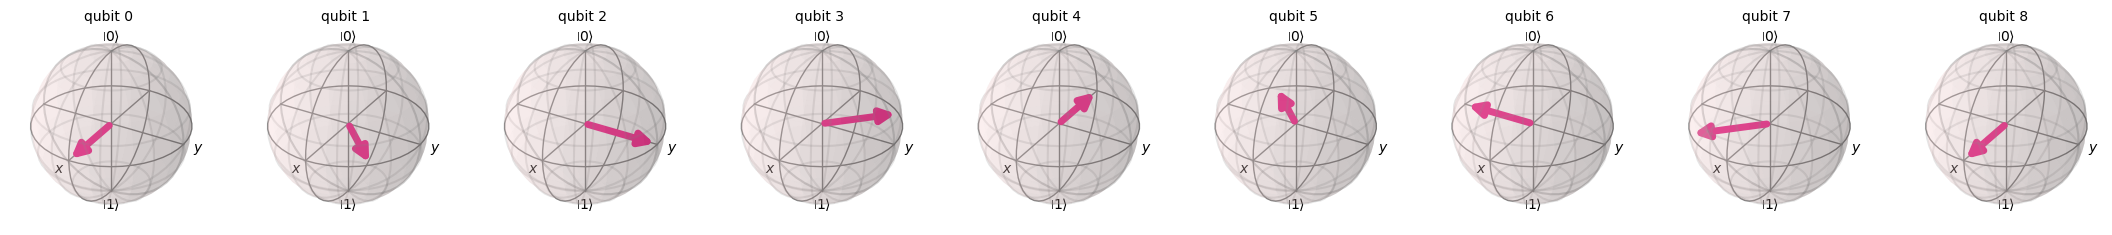

In [35]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

# QFT testes

# 2 QUBITS

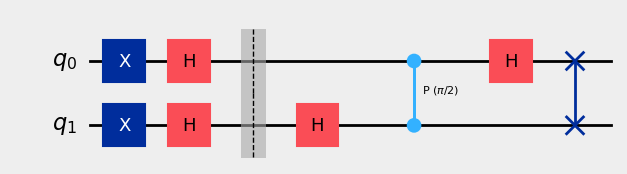

In [36]:
#QFT 2 bits - ok
from qiskit.circuit.library import QFT

qc = QuantumCircuit(2)
qc.x([0,1])
qc.h([0,1])
qc.barrier([0,1])

qft = QFT(2).decompose()

qall = QuantumCircuit(2)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'01': 508, '11': 516}


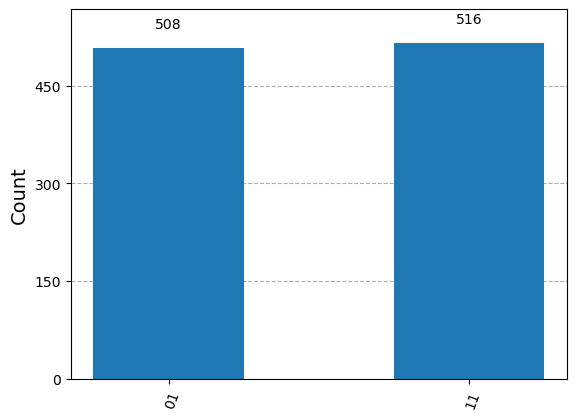

In [37]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [38]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

QiskitError: 'Cannot apply instruction with classical bits: measure'

# 3 QUBITS

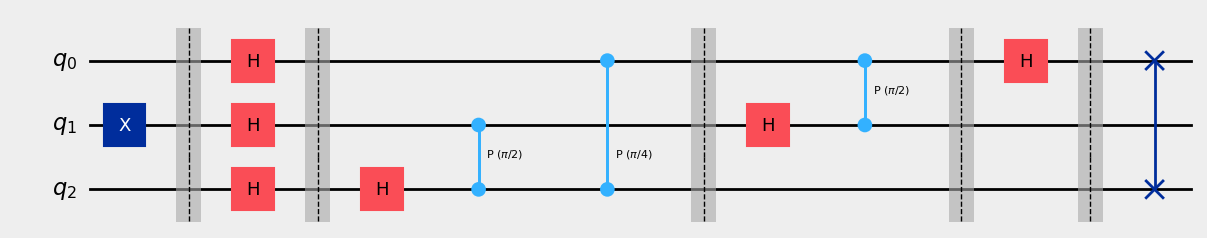

In [39]:
#QFT 3 - programado
qc = QuantumCircuit(3)
qc.x([1])
qc.barrier([0,1,2])
qc.h([0,1,2])
qc.barrier([0,1,2])

qc.h(2)
qc.cp(math.pi/2,1, 2)
qc.cp(math.pi/4,0, 2)
qc.barrier([0,1,2])
qc.h(1)
qc.cp(math.pi/2,0, 1)
qc.barrier([0,1,2])
qc.h(0)
qc.barrier([0,1,2])
qc.swap(0,2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

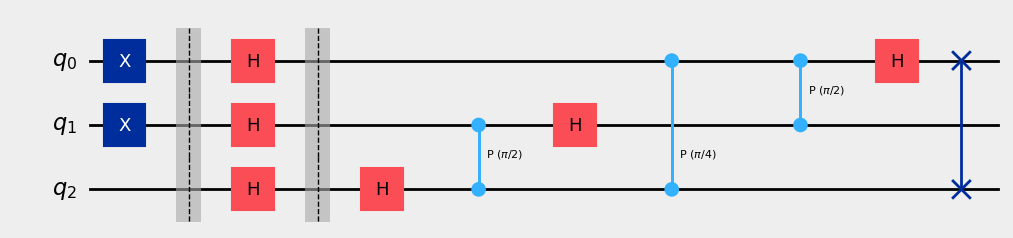

In [40]:
#QFT 3 - com QFT
qc = QuantumCircuit(3)
qc.x([0,1])
qc.barrier([0,1,2])
qc.h([0,1,2])
qc.barrier([0,1,2])

qft = QFT(3).decompose()

qall = QuantumCircuit(3)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall

qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'010': 513, '110': 511}


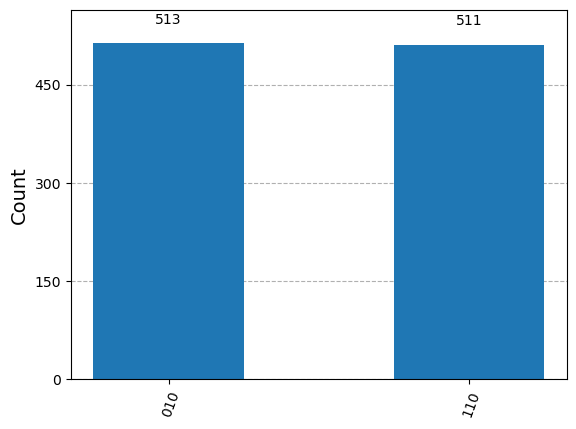

In [41]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

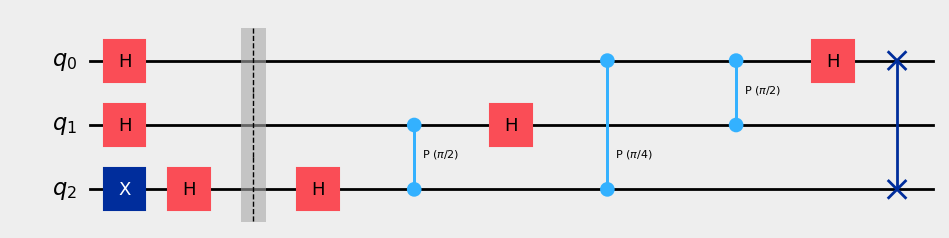

In [42]:
#QFT 3 bits com repetição em 2
from qiskit.circuit.library import QFT

qc = QuantumCircuit(3)
qc.x([2])
qc.h([0,1,2])
qc.barrier([0,1,2])

qft = QFT(3).decompose()

qall = QuantumCircuit(3)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'111': 447, '101': 78, '001': 426, '011': 73}


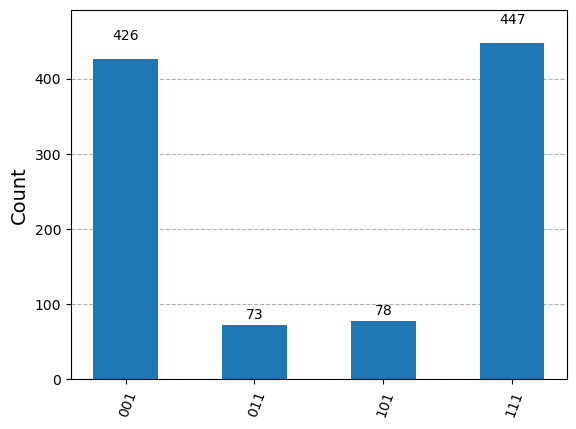

In [43]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [44]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

QiskitError: 'Cannot apply instruction with classical bits: measure'

# 4 QUBITS

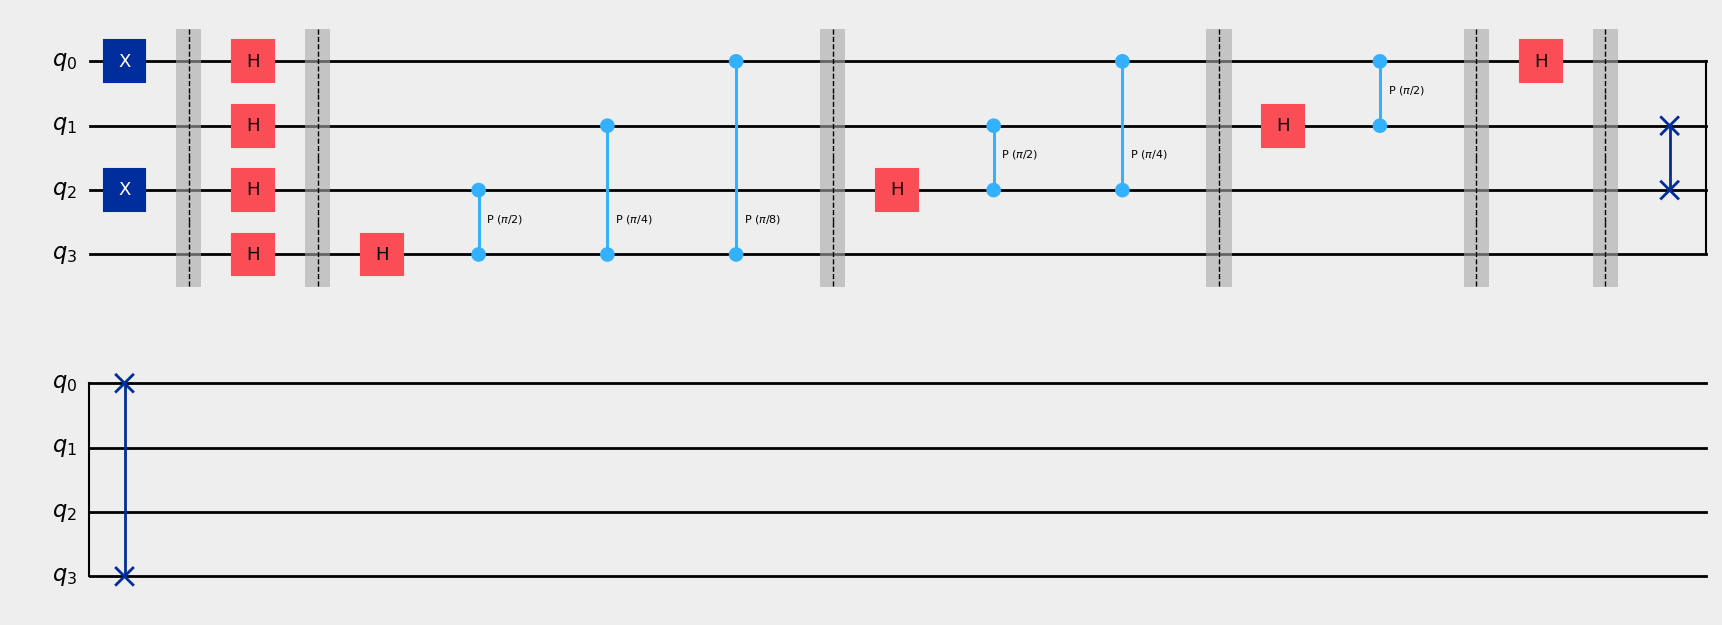

In [45]:
#QFT 4 - implementado
qc = QuantumCircuit(4)
qc.x([0,2])
qc.barrier([0,1,2,3])
qc.h([0,1,2,3])
qc.barrier([0,1,2,3])

qft = QuantumCircuit(4)
qft.h(3)
qft.cp(math.pi /2, 2, 3)
qft.cp(math.pi /4, 1, 3)
qft.cp(math.pi /8, 0, 3)
qft.barrier([0,1,2,3])
qft.h(2)
qft.cp(math.pi /2, 1,2)
qft.cp(math.pi /4, 0,2)
qft.barrier([0,1,2,3])
qft.h(1)
qft.cp(math.pi /2, 0,1)
qft.barrier([0,1,2,3])
qft.h(0)
qft.barrier([0,1,2,3])
qft.swap(1,2)
qft.swap(0,3)

qall = QuantumCircuit(4)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

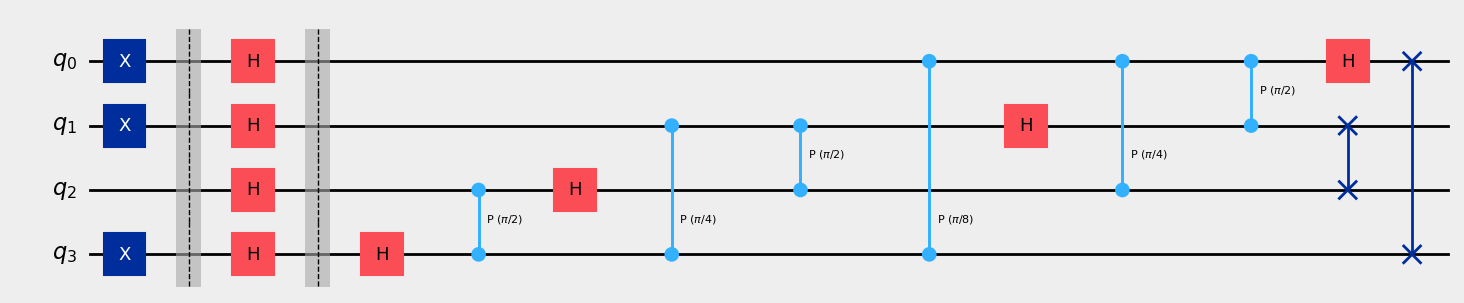

In [46]:
# 4 QUBITS com QFT
from qiskit.circuit.library import QFT

qc = QuantumCircuit(4)
qc.x([0,1,3])
qc.barrier([0,1,2,3])
qc.h([0,1,2,3])
qc.barrier([0,1,2,3])

qft = QFT(4).decompose()

qall = QuantumCircuit(4)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'0101': 302, '1001': 78, '0111': 85, '0011': 121, '1101': 124, '1011': 307, '0001': 4, '1111': 3}


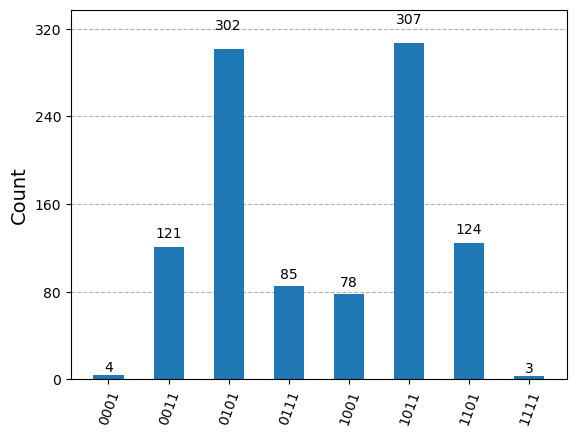

In [47]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [48]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

QiskitError: 'Cannot apply instruction with classical bits: measure'

# 5 QUBITS

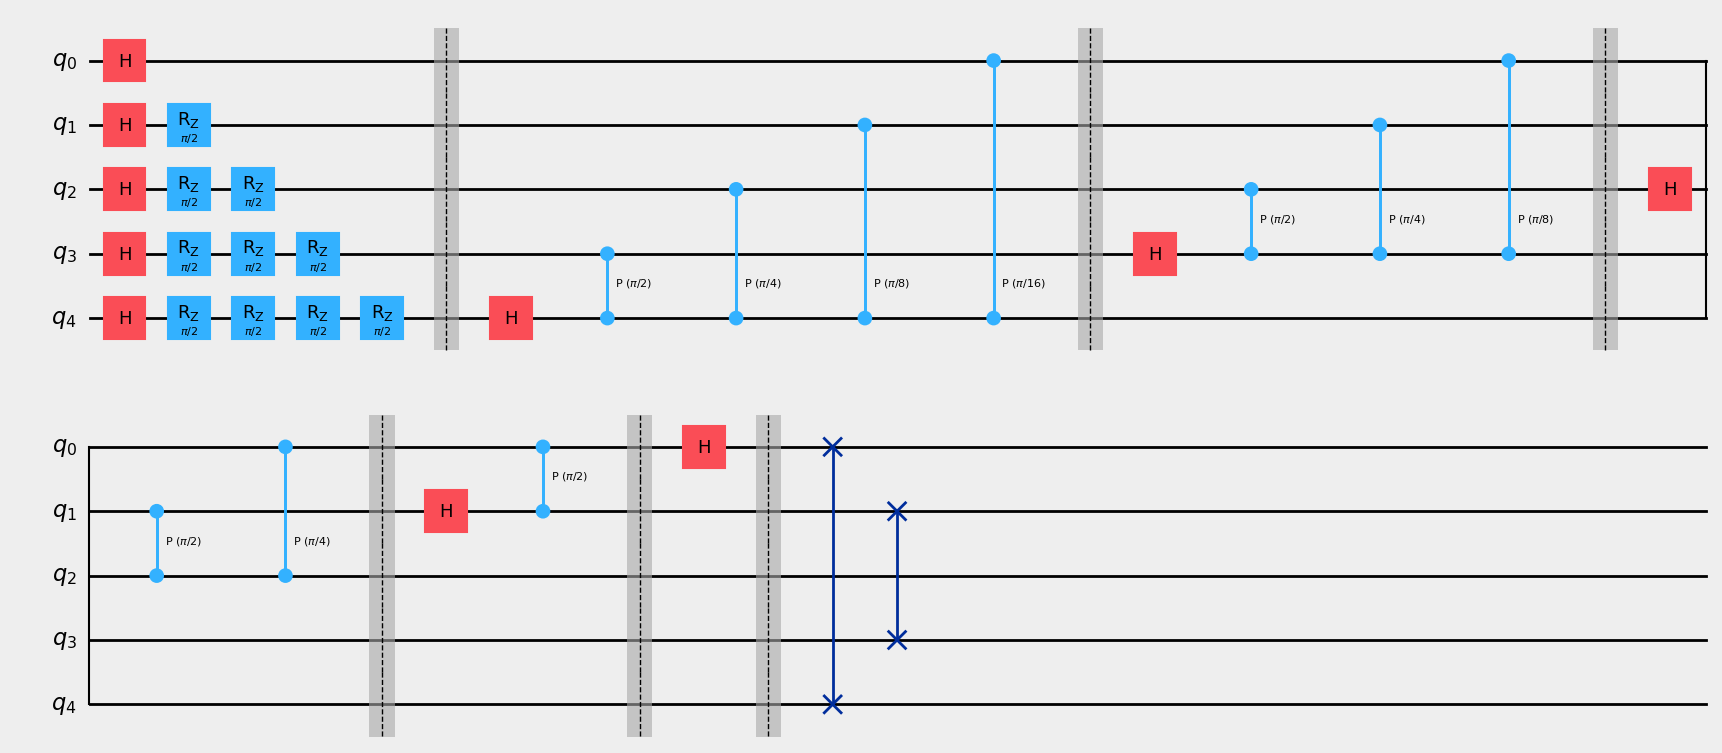

In [49]:
#QFT 5 BITS OK - implementado
qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.rz(math.pi /2, [1,2,3,4])
qc.rz(math.pi /2, [2,3,4])
qc.rz(math.pi /2, [3,4])
qc.rz(math.pi /2, [4])
qc.barrier([0,1,2,3,4])

qc.h(4)
qc.cp(math.pi /2 , 3, 4)
qc.cp(math.pi /4, 2, 4)
qc.cp(math.pi /8, 1, 4)
qc.cp(math.pi /16, 0, 4)
qc.barrier([0,1,2,3,4])
qc.h(3)
qc.cp(math.pi /2, 2, 3)
qc.cp(math.pi /4, 1, 3)
qc.cp(math.pi /8, 0, 3)
qc.barrier([0,1,2,3,4])
qc.h(2)
qc.cp(math.pi /2, 1, 2)
qc.cp(math.pi /4, 0, 2)
qc.barrier([0,1,2,3,4])
qc.h(1)
qc.cp(math.pi/2, 0, 1)
qc.barrier([0,1,2,3,4])
qc.h(0)
qc.barrier([0,1,2,3,4])
qc.swap(0,4)
qc.swap(1,3)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

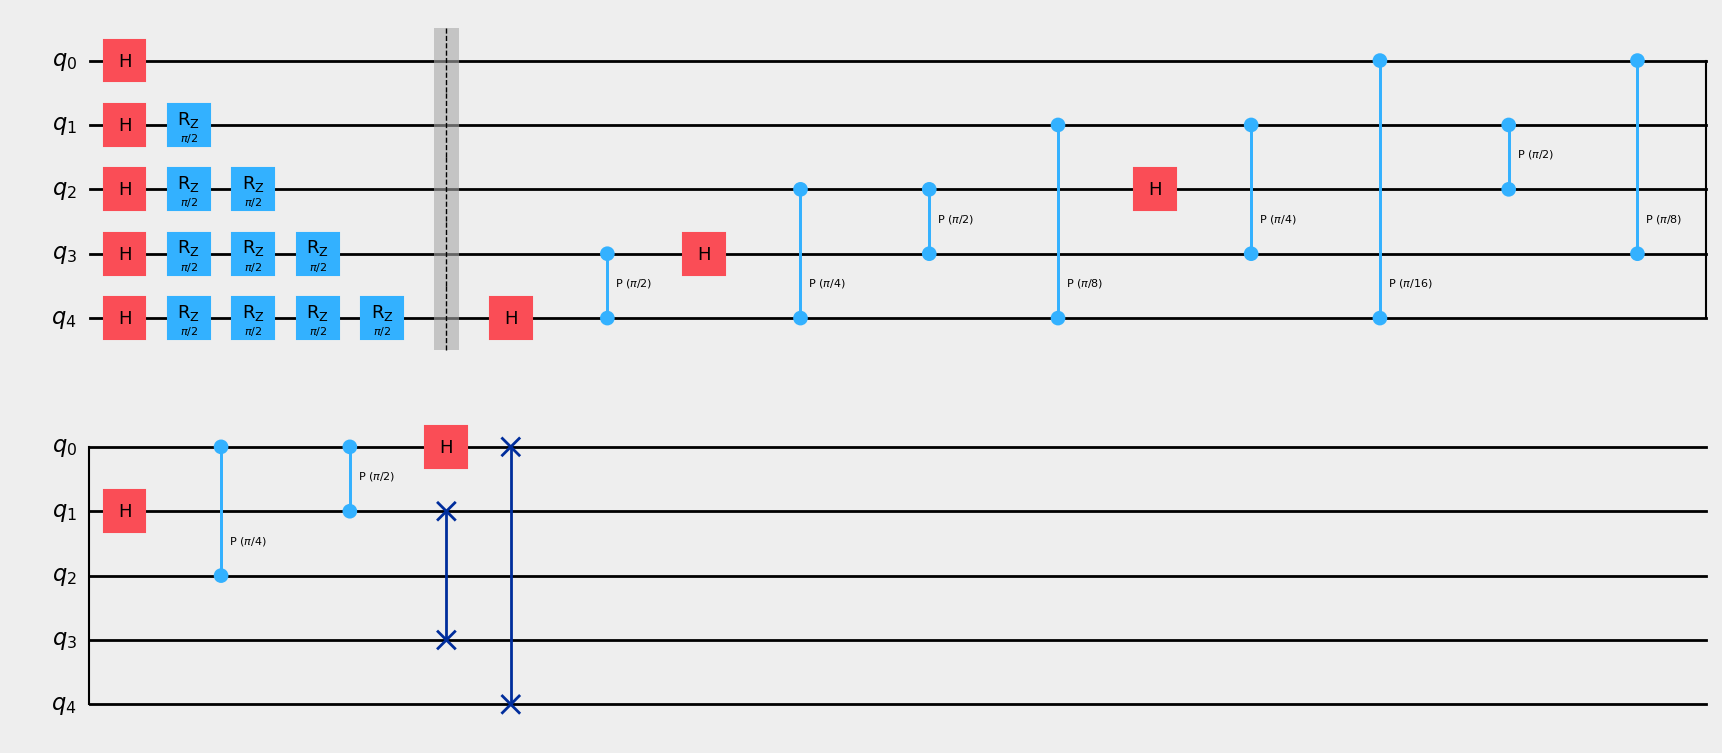

In [50]:
#QFT 5 - QFT
from qiskit.circuit.library import QFT

qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.rz(math.pi /2, [1,2,3,4])
qc.rz(math.pi /2, [2,3,4])
qc.rz(math.pi /2, [3,4])
qc.rz(math.pi /2, [4])
qc.barrier([0,1,2,3,4])

qft = QFT(5).decompose()

qall = QuantumCircuit(5)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

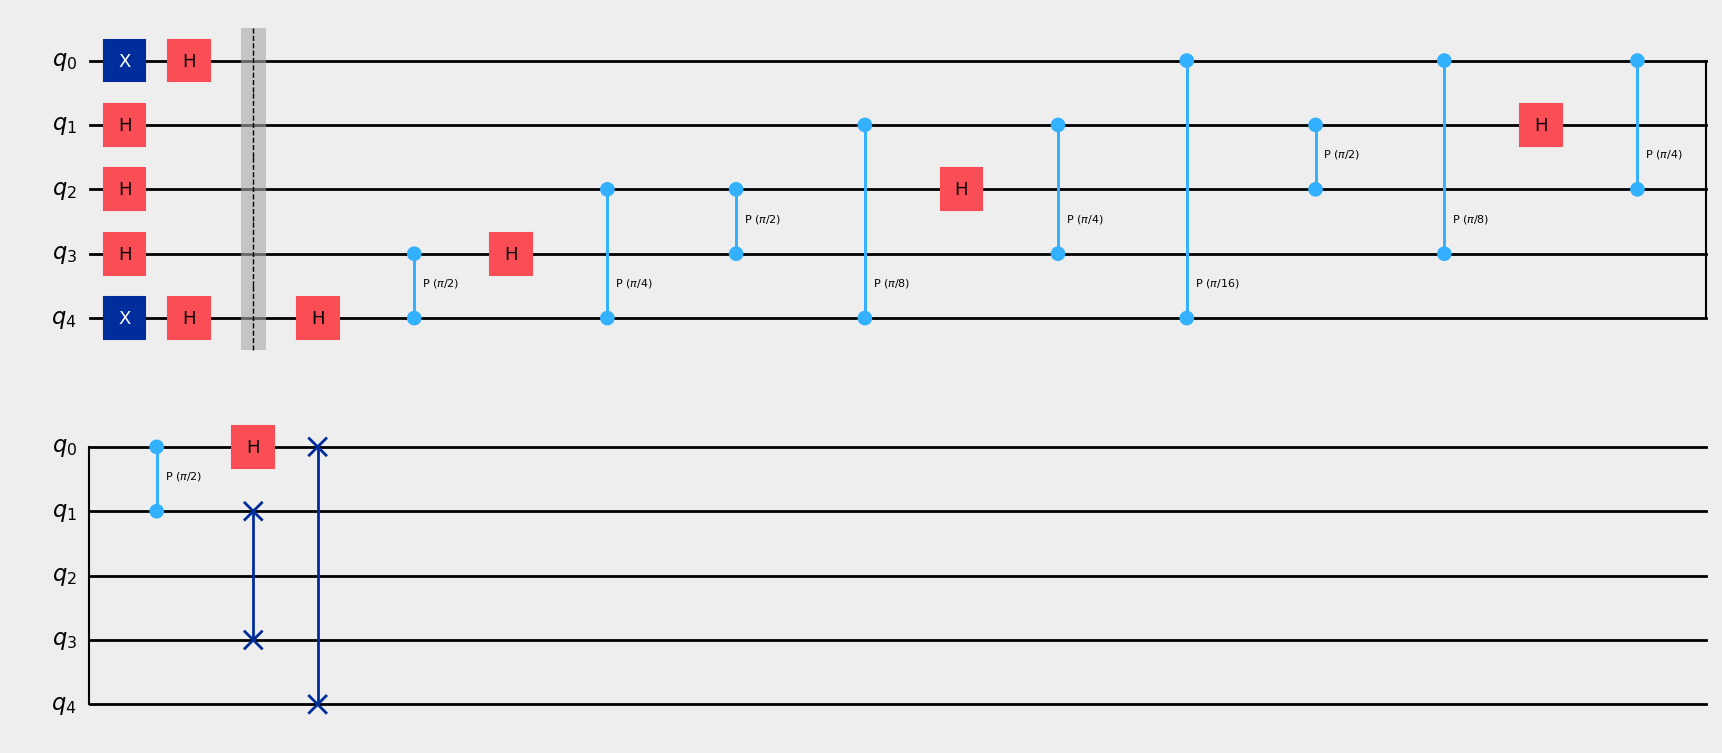

In [51]:
#QFT 5 - QFT
from qiskit.circuit.library import QFT

qc = QuantumCircuit(5)
qc.x([0,4])
qc.h([0,1,2,3,4])
qc.barrier([0,1,2,3,4])

qft = QFT(5).decompose()

qall = QuantumCircuit(5)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'01111': 422, '10001': 411, '01101': 47, '10011': 44, '01001': 9, '10101': 26, '00001': 6, '10111': 9, '00101': 5, '00111': 9, '11101': 6, '11001': 12, '01011': 10, '00011': 3, '11011': 3, '11111': 2}


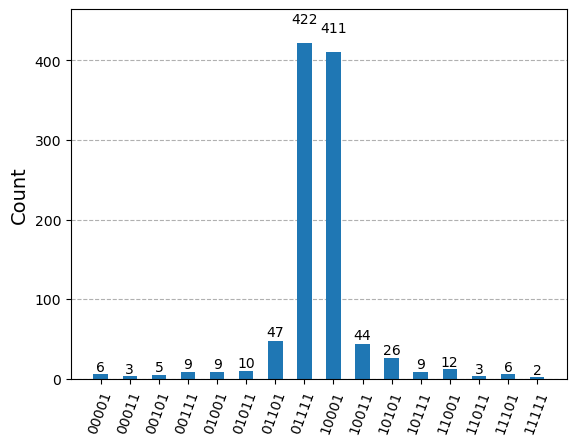

In [52]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# 8 QUBITS

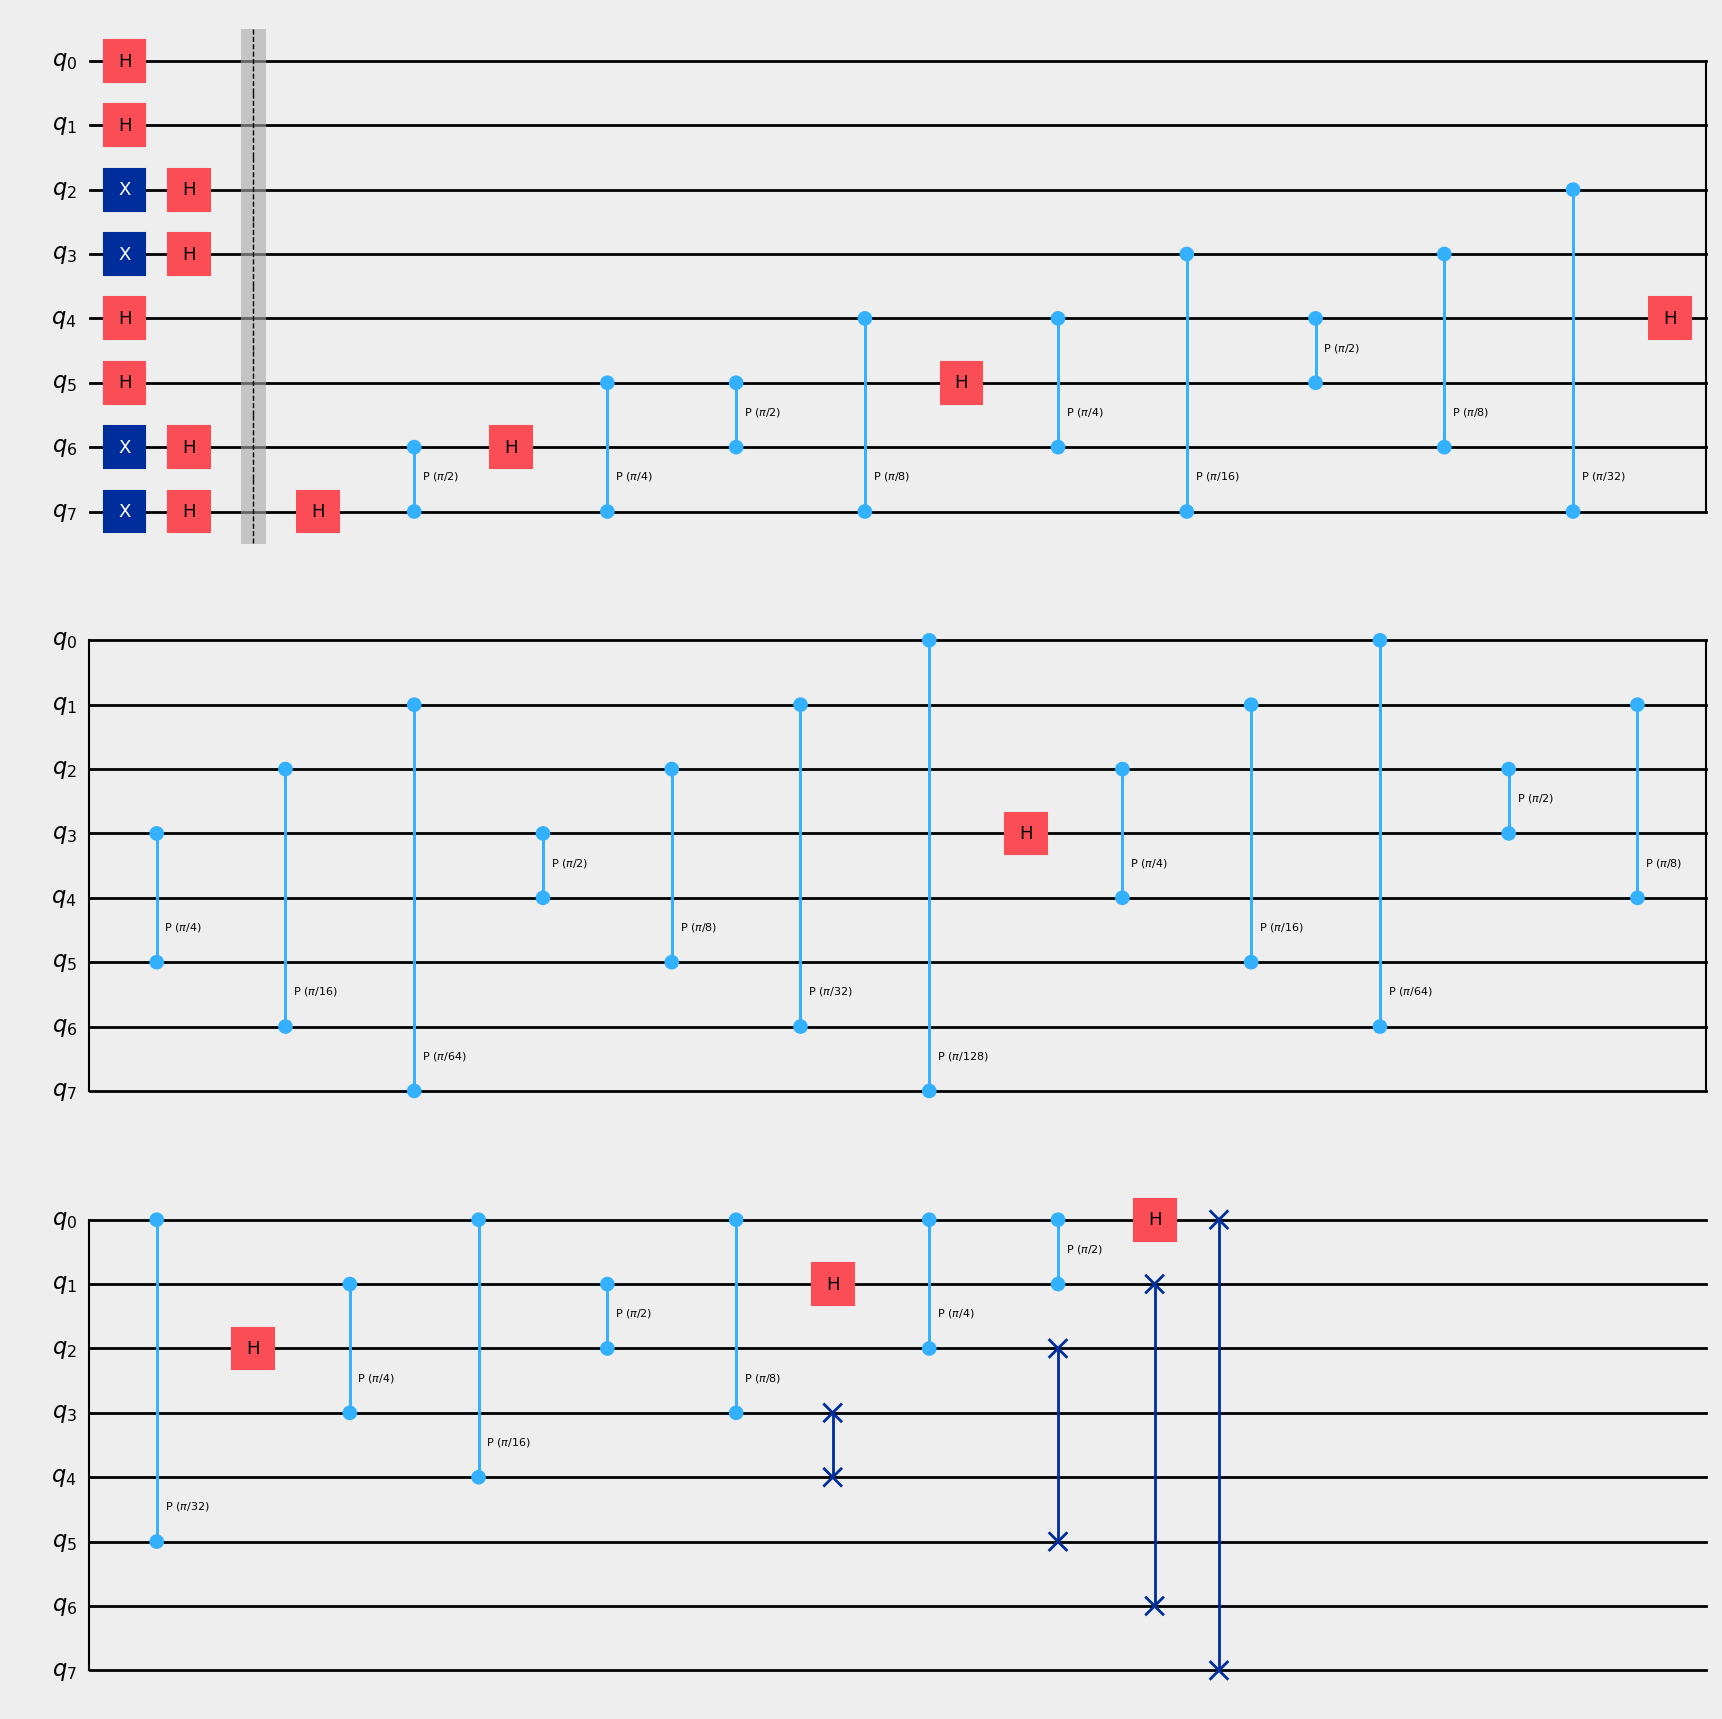

In [53]:
#OK
from qiskit.circuit.library import QFT

qc = QuantumCircuit(8)
qc.x([2,3,6,7])
qc.h([0,1,2,3,4,5,6,7])
qc.barrier([0,1,2,3,4,5,6,7])

qft = QFT(8).decompose()

qall = QuantumCircuit(8)
qall = qall.compose(qc)
qall = qall.compose(qft)
qc = qall
qall.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'11101111': 182, '01110001': 9, '11110001': 154, '00110001': 16, '00010001': 210, '00100101': 6, '00001111': 143, '10110001': 10, '11001111': 15, '11110011': 18, '00010011': 22, '10001111': 10, '00010101': 9, '11010001': 24, '01010001': 12, '00110101': 1, '11010111': 2, '00001001': 1, '00100111': 1, '01010011': 4, '01101111': 5, '10101111': 12, '11011111': 3, '11101001': 7, '00101101': 6, '10010011': 1, '00011111': 5, '01010101': 2, '01110011': 1, '00101001': 1, '00101111': 17, '11100111': 4, '11101101': 16, '00001101': 19, '11101011': 9, '11100011': 1, '11011011': 3, '00010111': 2, '11001101': 1, '00100001': 1, '10011111': 1, '00101011': 1, '01100001': 2, '00001011': 5, '11100101': 5, '01001111': 5, '10101101': 4, '01101011': 1, '11110101': 3, '00011101': 3, '10010001': 8, '00011011': 1, '11010101': 2, '10101001': 1, '11110111': 1, '11011101': 1, '10010101': 1, '10110101': 1, '11100001': 2, '01101101': 2, '11010011': 2, '11111011': 2, '10001101': 1, '11111101': 1, '10101011': 1, '110

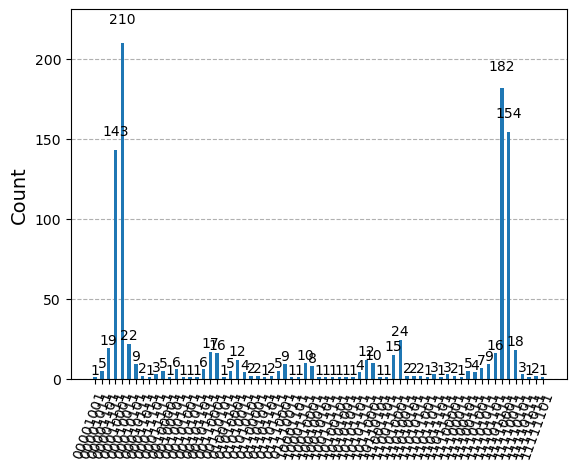

In [54]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# 9 QUBITS

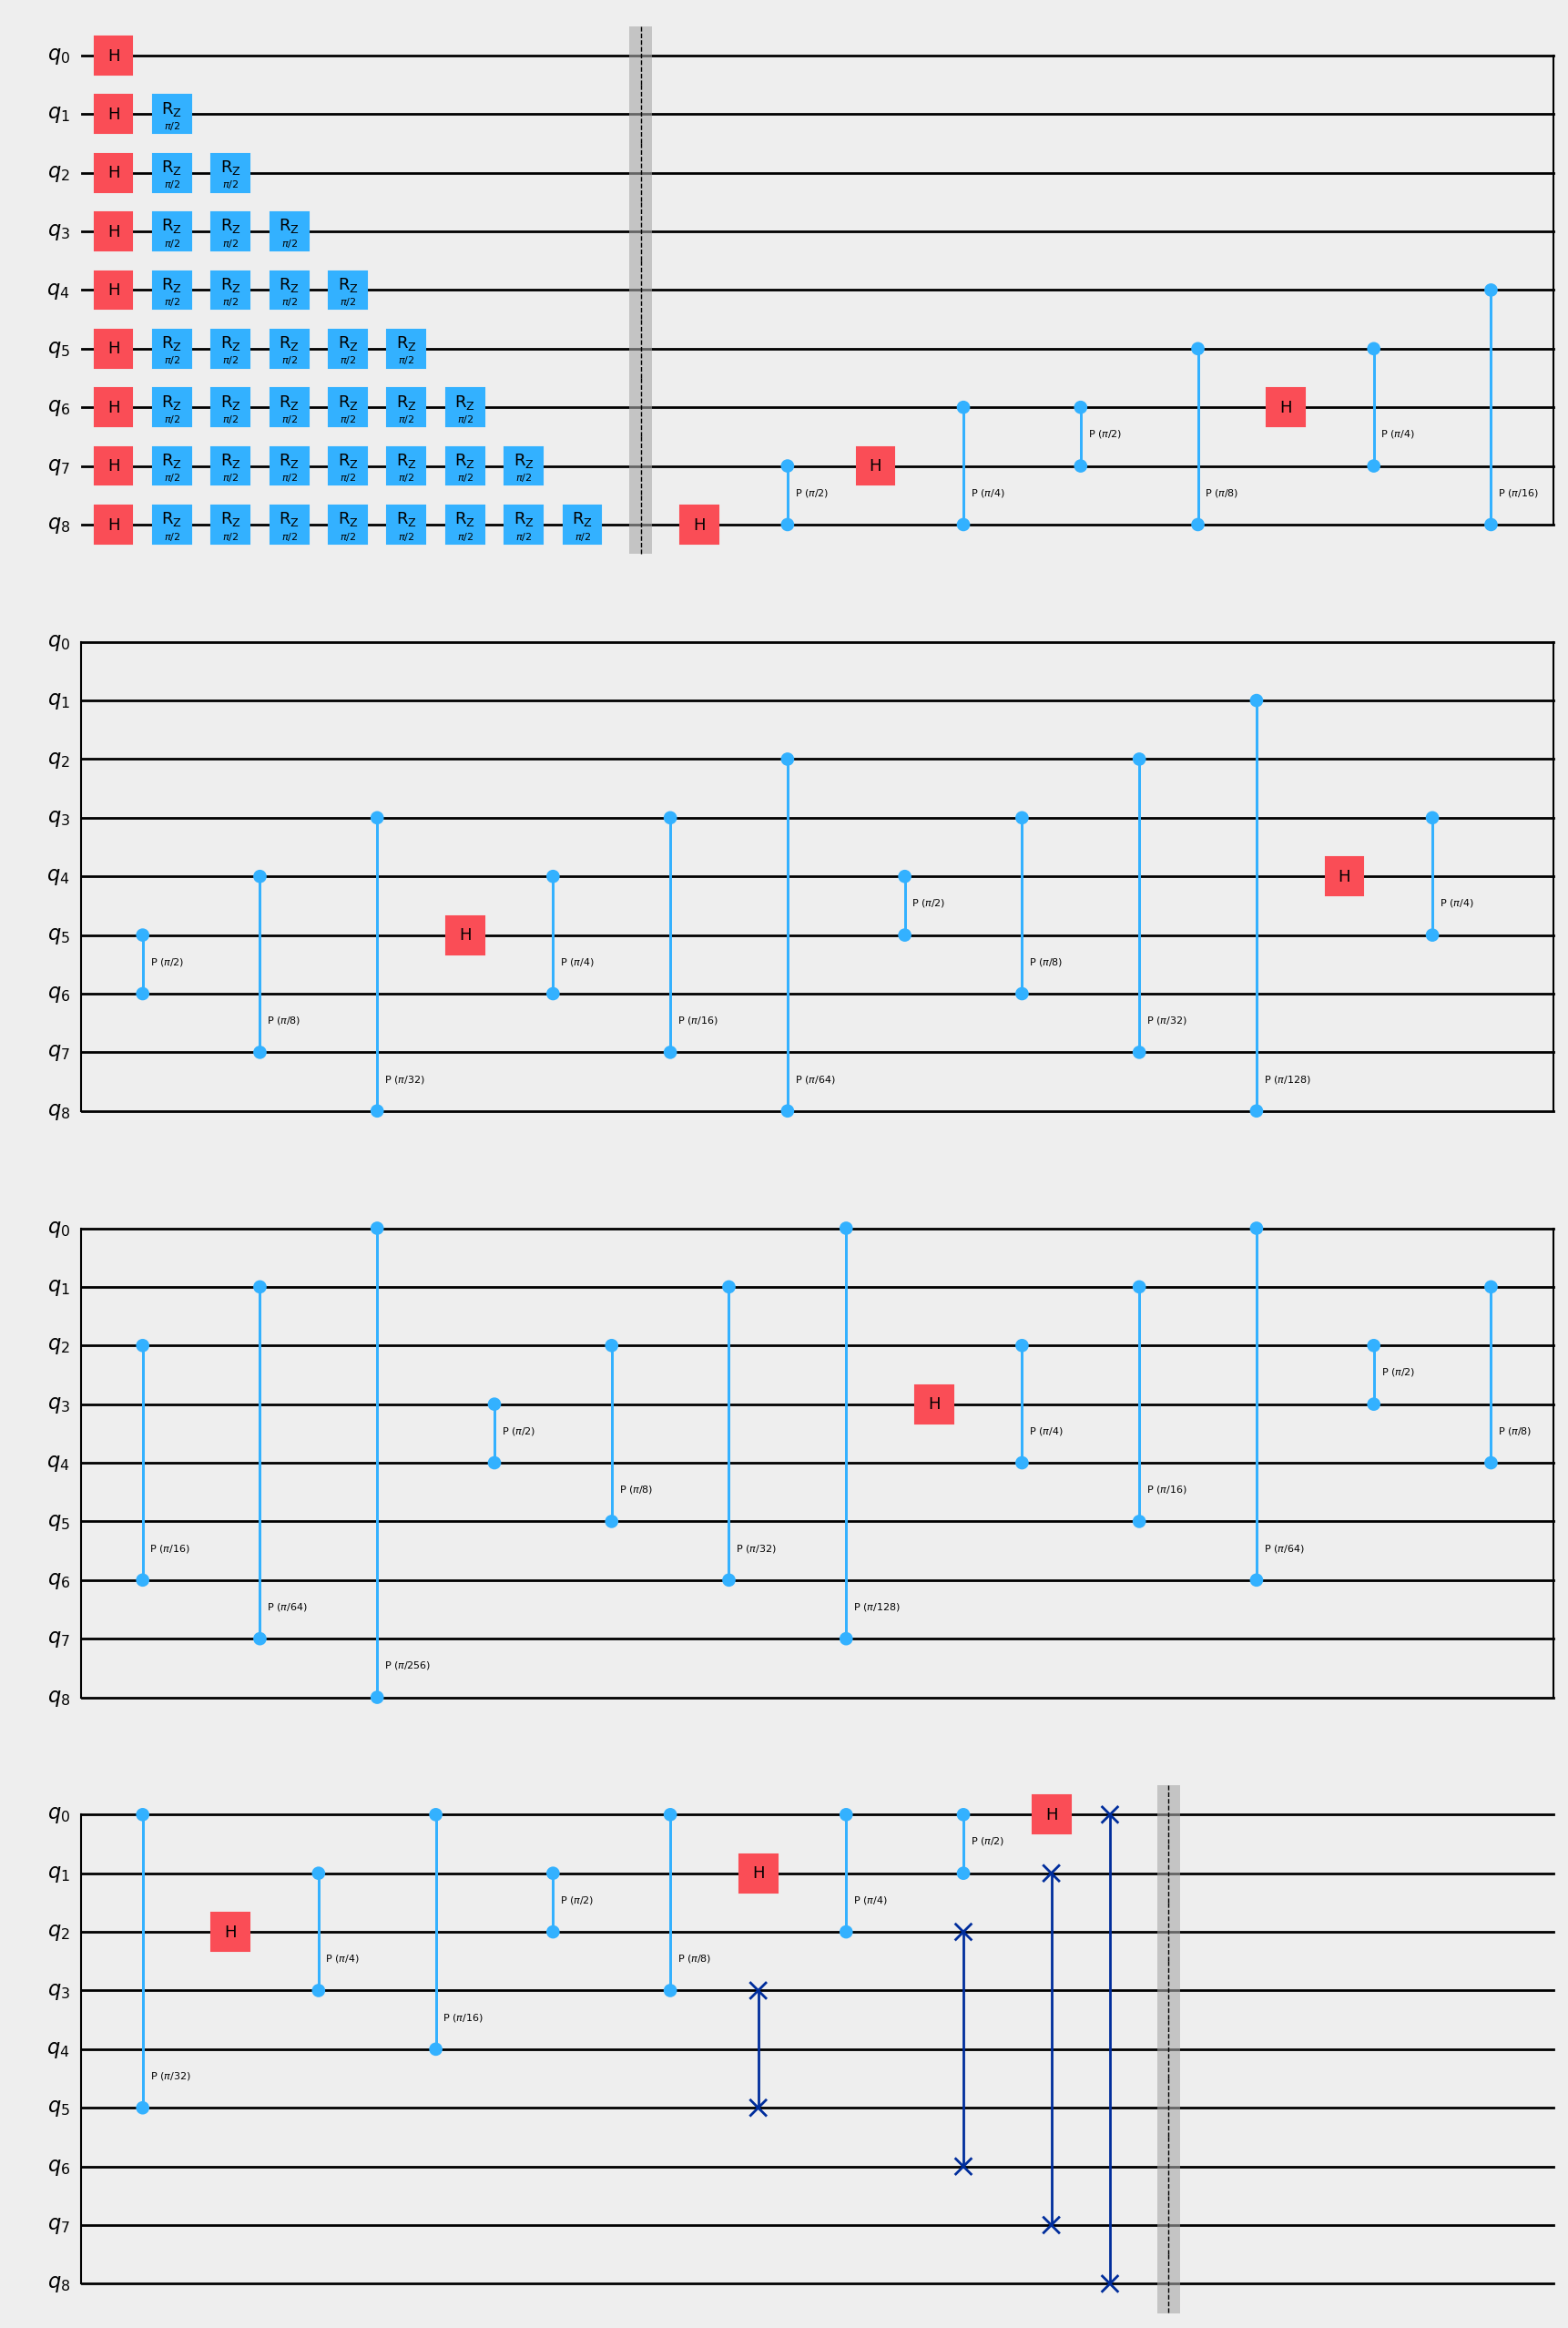

In [55]:
from qiskit.circuit.library import QFT


qft = QFT(9).decompose()

qc = QuantumCircuit(9)
qc.h([0,1,2,3,4,5,6,7,8])
qc.rz(math.pi /2, [1,2,3,4,5,6,7,8])
qc.rz(math.pi /2, [2,3,4,5,6,7,8])
qc.rz(math.pi /2, [3,4,5,6,7,8])
qc.rz(math.pi /2, [4,5,6,7,8])
qc.rz(math.pi /2, [5,6,7,8])
qc.rz(math.pi /2, [6,7,8])
qc.rz(math.pi /2, [7,8])
qc.rz(math.pi /2, [8])

qall = QuantumCircuit(9)
qall = qall.compose(qc)
qall.barrier([0,1,2,3,4,5,6,7,8])
qall = qall.compose(qft)

qc = qall
qc.barrier([0,1,2,3,4,5,6,7,8])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

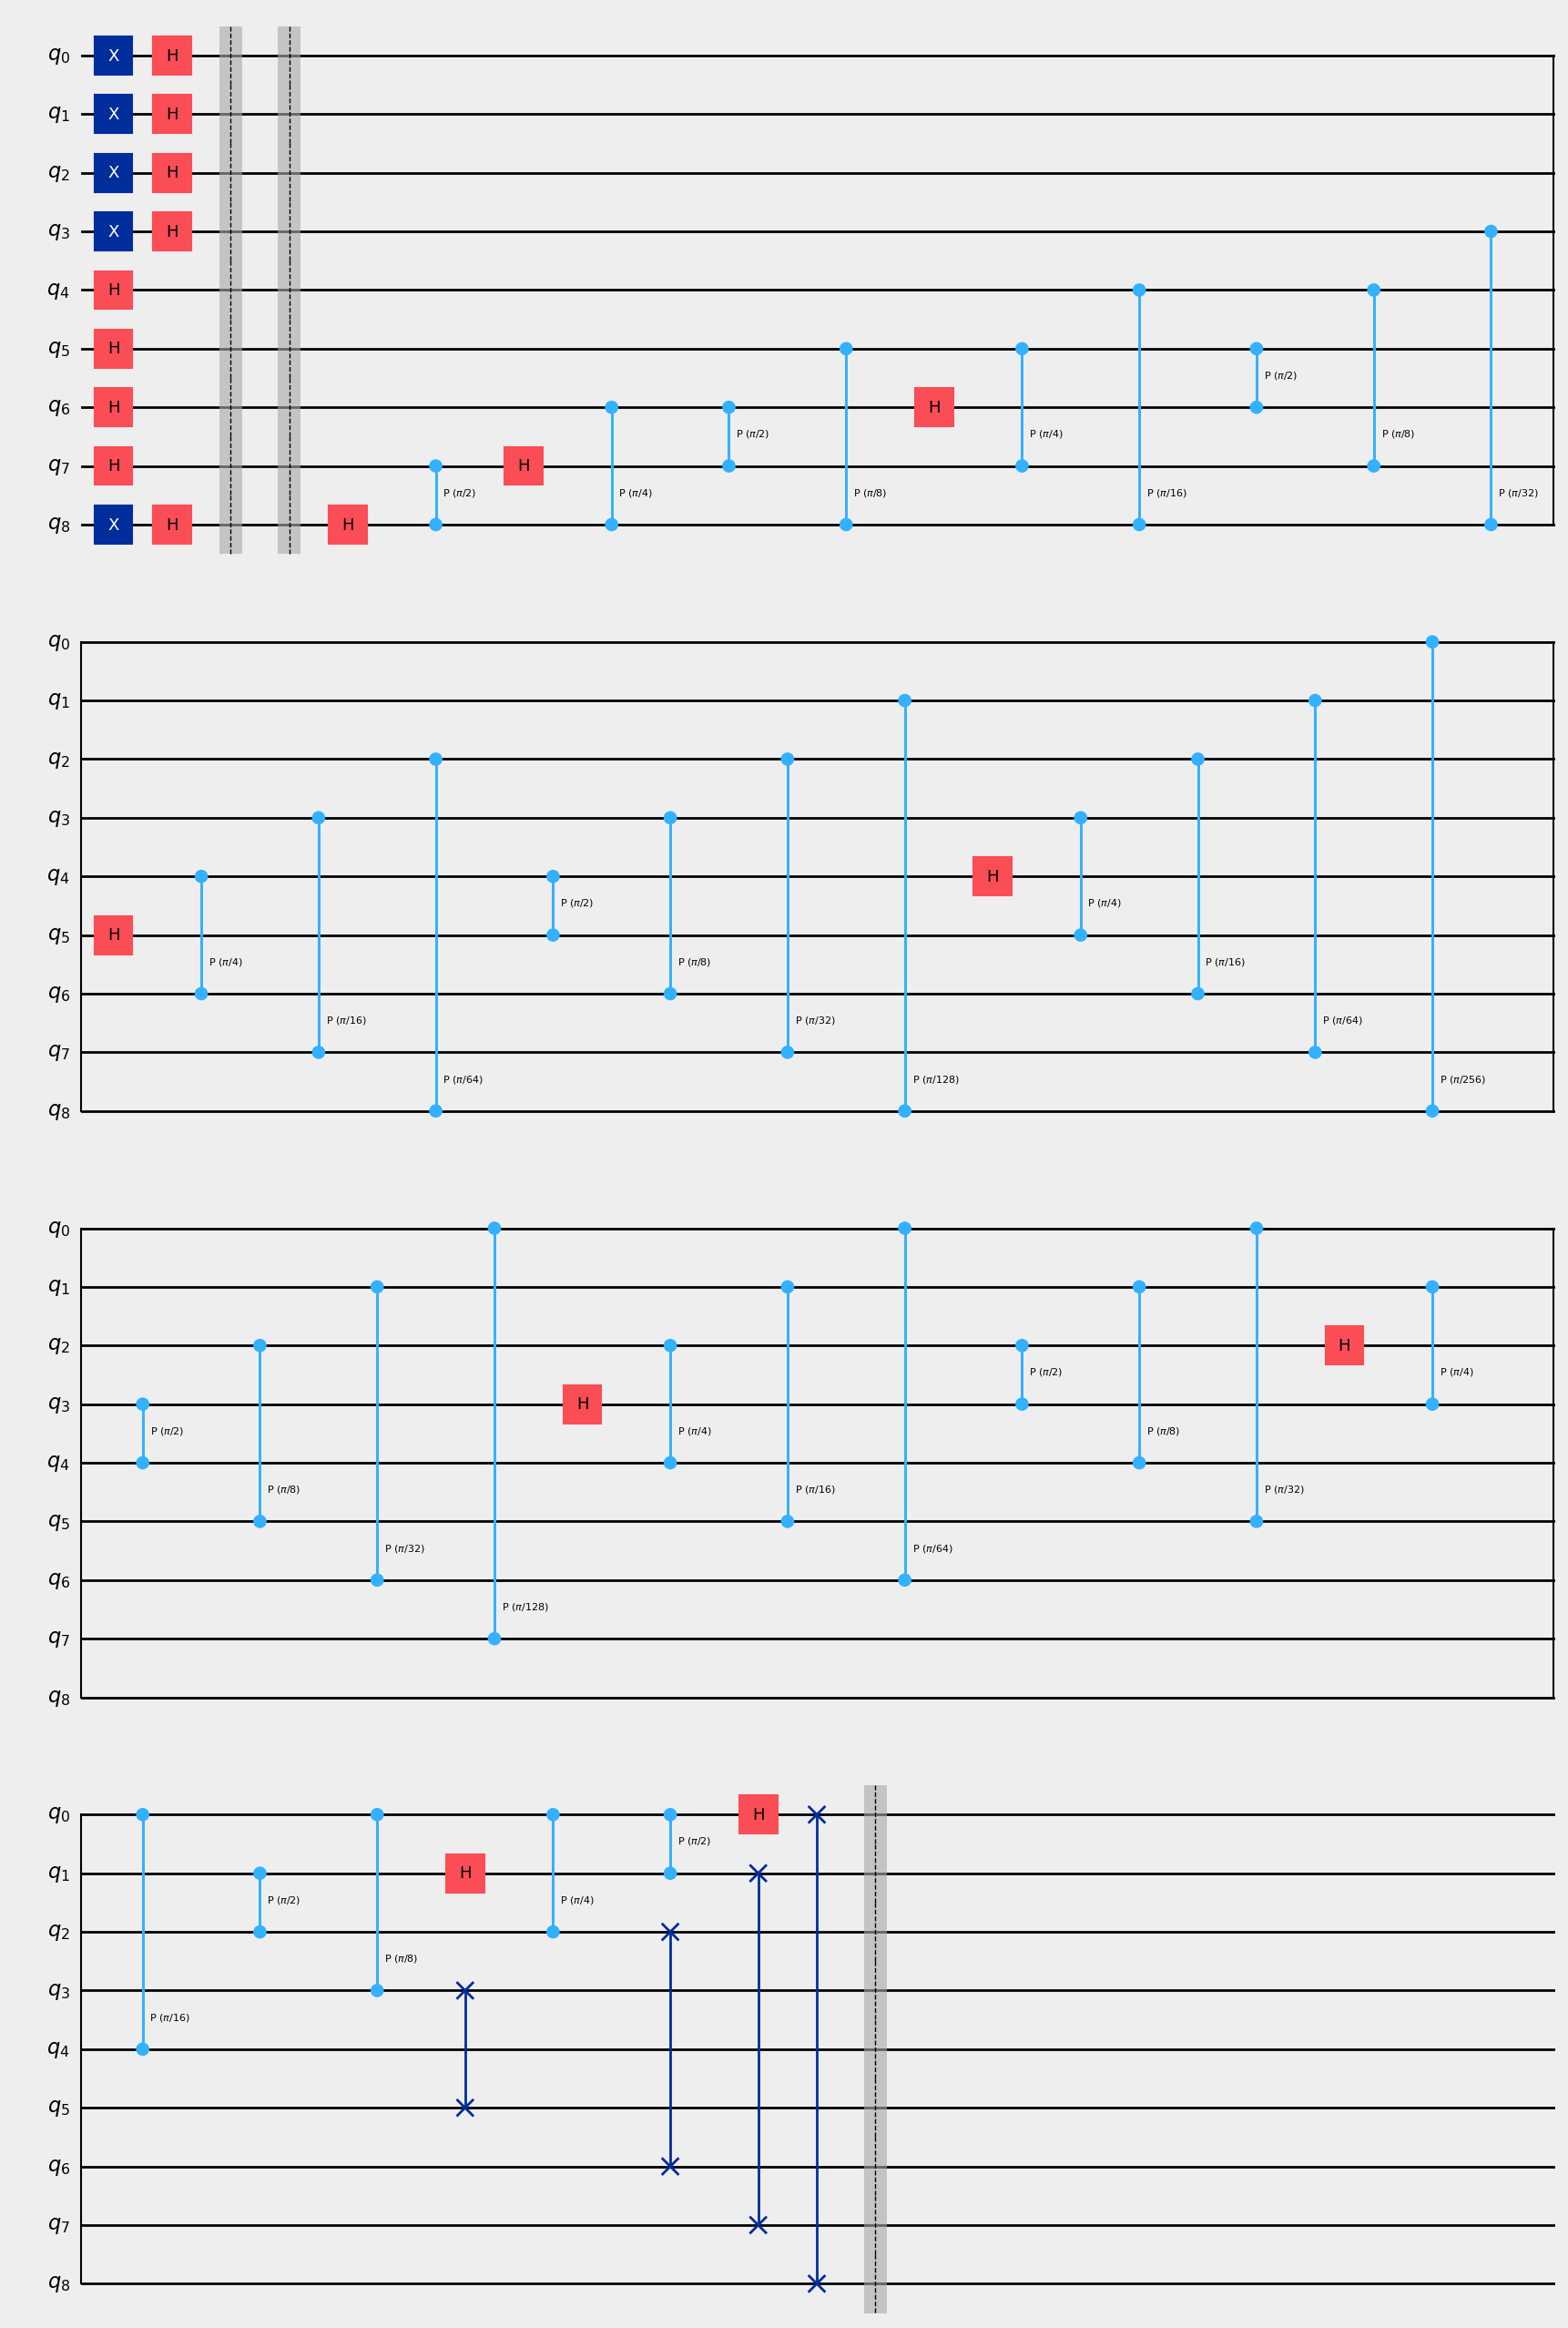

In [56]:
from qiskit.circuit.library import QFT


qft = QFT(9).decompose()

qc = QuantumCircuit(9)
qc.x([0,1,2,3,8])
qc.h([0,1,2,3,4,5,6,7,8])
qc.barrier([0,1,2,3,4,5,6,7,8])

qall = QuantumCircuit(9)
qall = qall.compose(qc)
qall.barrier([0,1,2,3,4,5,6,7,8])
qall = qall.compose(qft)

qc = qall
qc.barrier([0,1,2,3,4,5,6,7,8])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'110011011': 1, '110011111': 51, '101100001': 130, '101100011': 7, '101100101': 7, '101011111': 114, '010101001': 5, '001011011': 1, '111011111': 1, '110100001': 53, '010011111': 122, '101011011': 6, '010100001': 125, '001011111': 57, '011100011': 3, '001100001': 68, '100011011': 1, '011100001': 27, '001001011': 2, '011011111': 32, '101011101': 16, '010100011': 15, '100011111': 21, '111100001': 2, '100100001': 36, '010010111': 1, '001011101': 6, '010011101': 14, '001100011': 3, '100011001': 1, '011011001': 3, '010111111': 2, '001100101': 1, '010101011': 3, '010110101': 2, '010101101': 3, '100110011': 1, '010111011': 2, '100100101': 1, '110011101': 7, '110010101': 2, '011001101': 1, '100011101': 2, '101011001': 4, '110100011': 4, '011010001': 1, '010100111': 3, '010111101': 3, '101010001': 1, '001011001': 3, '010011011': 4, '101101001': 4, '011010111': 1, '101010101': 3, '101000001': 1, '010110001': 1, '101010111': 1, '010011001': 3, '001010011': 1, '011011011': 1, '101100111': 4, '110

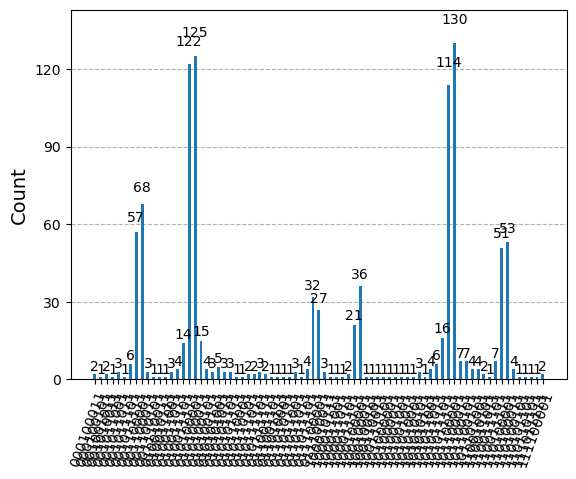

In [57]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

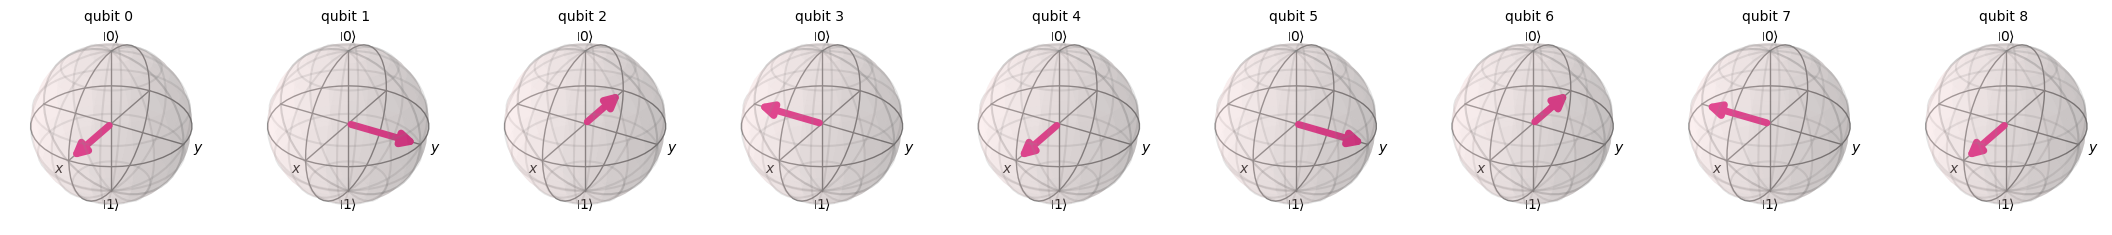

In [58]:
qc = QuantumCircuit(9)
qc.h([0,1,2,3,4,5,6,7,8])
qc.rz(math.pi /2, [1,2,3,4,5,6,7,8])
qc.rz(math.pi /2, [2,3,4,5,6,7,8])
qc.rz(math.pi /2, [3,4,5,6,7,8])
qc.rz(math.pi /2, [4,5,6,7,8])
qc.rz(math.pi /2, [5,6,7,8])
qc.rz(math.pi /2, [6,7,8])
qc.rz(math.pi /2, [7,8])
qc.rz(math.pi /2, [8])

matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

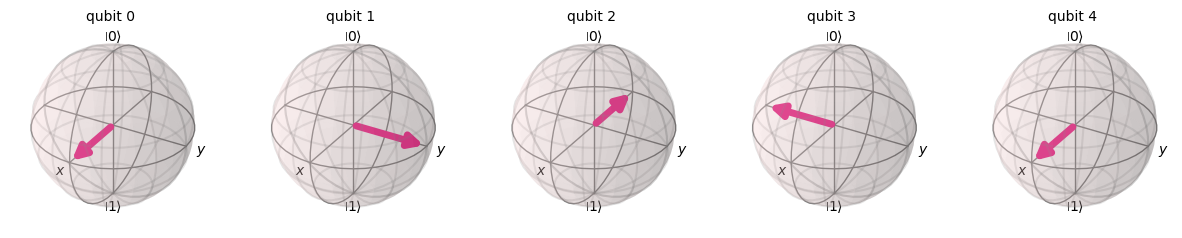

In [59]:
qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.rz(math.pi /2, [1,2,3,4])
qc.rz(math.pi /2, [2,3,4])
qc.rz(math.pi /2, [3,4])
qc.rz(math.pi /2, [4])
qc.barrier([0,1,2,3,4])
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

# FFT

In [60]:
# Número de pontos
sr = 100
# intervalo entre os pontos
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.0
# cálculo de cada ponto
x = 3*np.sin(8*np.pi*freq*t) + 3*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (4, 3))
plt.plot(t, x, 'r')
#plt.ylabel('Amplitude')
plt.show()

NameError: name 'np' is not defined

In [61]:
from scipy import fft

X = fft.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
#ax.set_xlabel('Frequency in Hertz [Hz]')
#ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 200)


TypeError: float() argument must be a string or a real number, not 'module'

# Grover

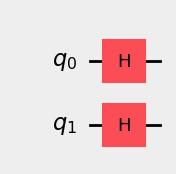

In [62]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'00': 255, '11': 279, '01': 265, '10': 225}


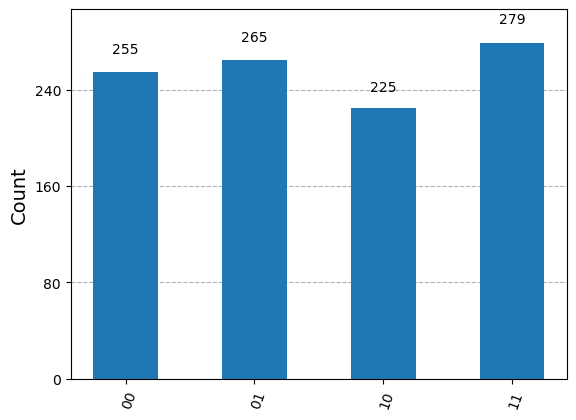

In [63]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

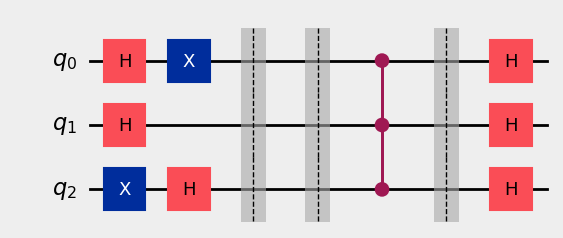

In [64]:
qc = QuantumCircuit(3)
qc.x(2)
qc.h([0,1,2])
qc.x([0])
qc.barrier([0,1,2])
#qc.x(1)
qc.barrier([0,1,2])
qc.ccz(0,1,2)
qc.barrier([0,1,2])
qc.h([0,1,2])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'100': 553, '001': 68, '011': 65, '101': 70, '010': 66, '110': 58, '000': 73, '111': 71}


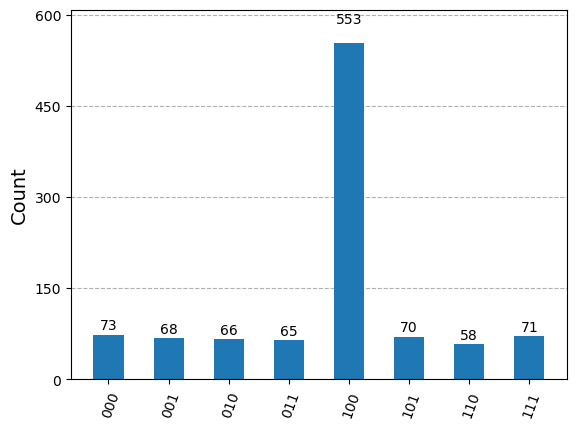

In [65]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

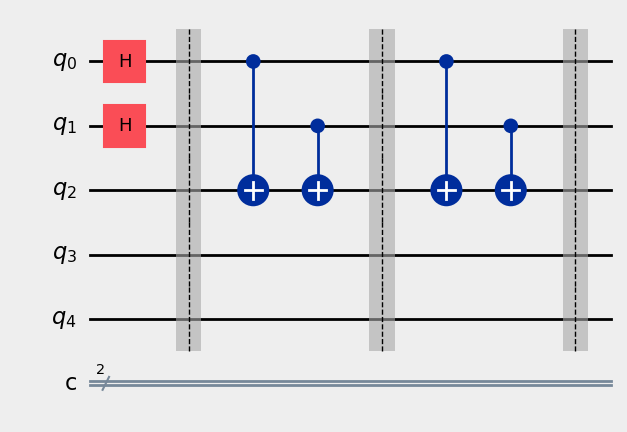

In [66]:
# circuito para identificar dois QUBITS iguais
qc = QuantumCircuit(5,2)
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.cx(0,2)
qc.cx(1,2)
qc.barrier([0,1,2,3,4])
qc.cx(0,2)
qc.cx(1,2)
qc.barrier([0,1,2,3,4])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'10': 234, '11': 273, '01': 258, '00': 259}


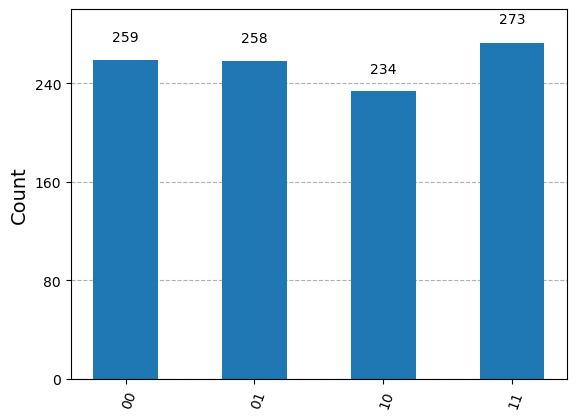

In [67]:
qc.measure([0,1],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

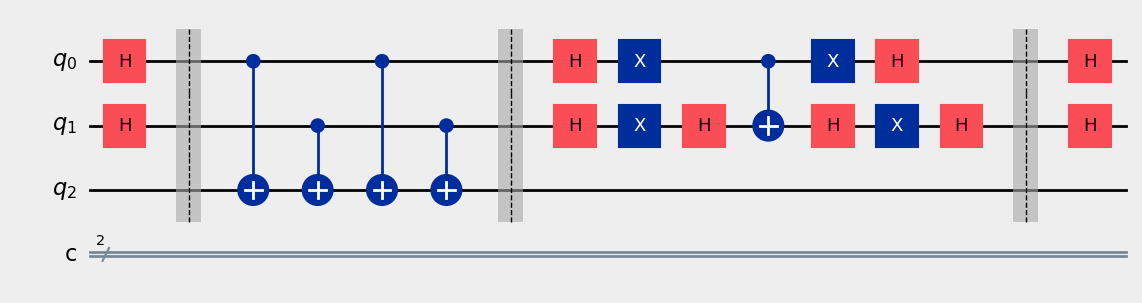

In [68]:
qc = QuantumCircuit(3,2)
qc.h([0,1])
qc.barrier([0,1,2])
qc.cx(0,2)
qc.cx(1,2)
qc.cx(0,2)
qc.cx(1,2)
qc.barrier([0,1,2])
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.h([0,1])
qc.barrier([0,1,2])
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'00': 1024}


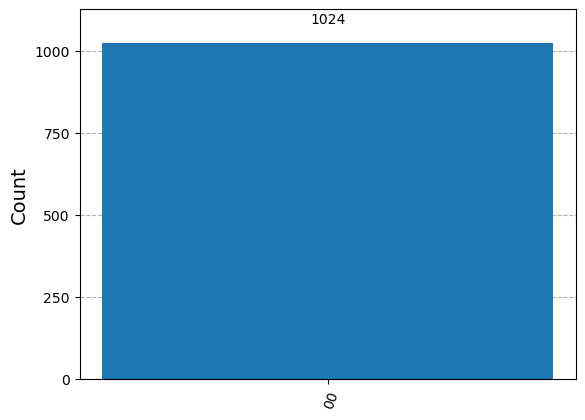

In [69]:
qc.measure([0,1],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [70]:
qc = QuantumCircuit(5,2)
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.ccx(0,1,3)
qc.x(1)
qc.cx(2,4)
qc.cx(3,4)
qc.barrier([0,1,2,3,4])
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.ccx(0,1,3)
qc.x(1)
qc.cx(2,4)
qc.cx(3,4)
qc.barrier([0,1,2,3,4])
qc.append(diffuser2(), [0,1])
qc.barrier([0,1,2,3,4])
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

NameError: name 'diffuser2' is not defined

{'01': 275, '00': 277, '11': 242, '10': 230}


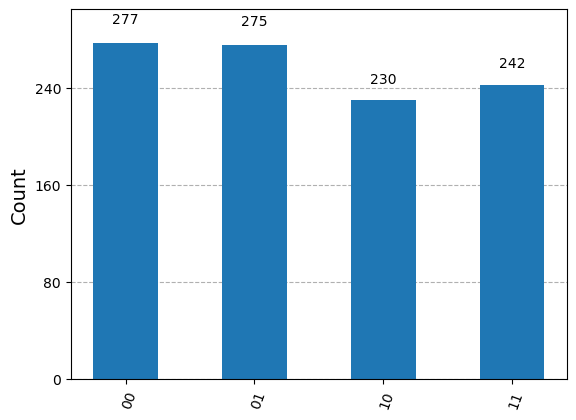

In [71]:
qc.measure([0,1],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [72]:
def diffuser3():
    qc = QuantumCircuit(3)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(3):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(3):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(2)
    qc.ccx(0,1,2)  # multi-controlled-toffoli
    qc.h(2)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(3):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(3):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "diffuser3"
    return U_s

def diffuser2():
    qc = QuantumCircuit(2)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(2):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(2):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(1)
    qc.cx(0,1)  # multi-controlled-toffoli
    qc.h(1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(2):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(2):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "diffuser2"
    return U_s

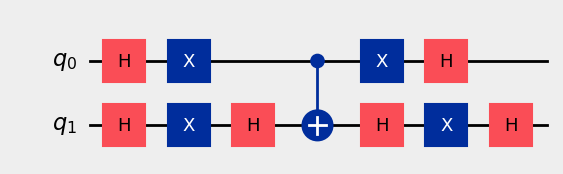

In [73]:
qc = QuantumCircuit(2)
qc.append(diffuser2(), [0,1])
qc.decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

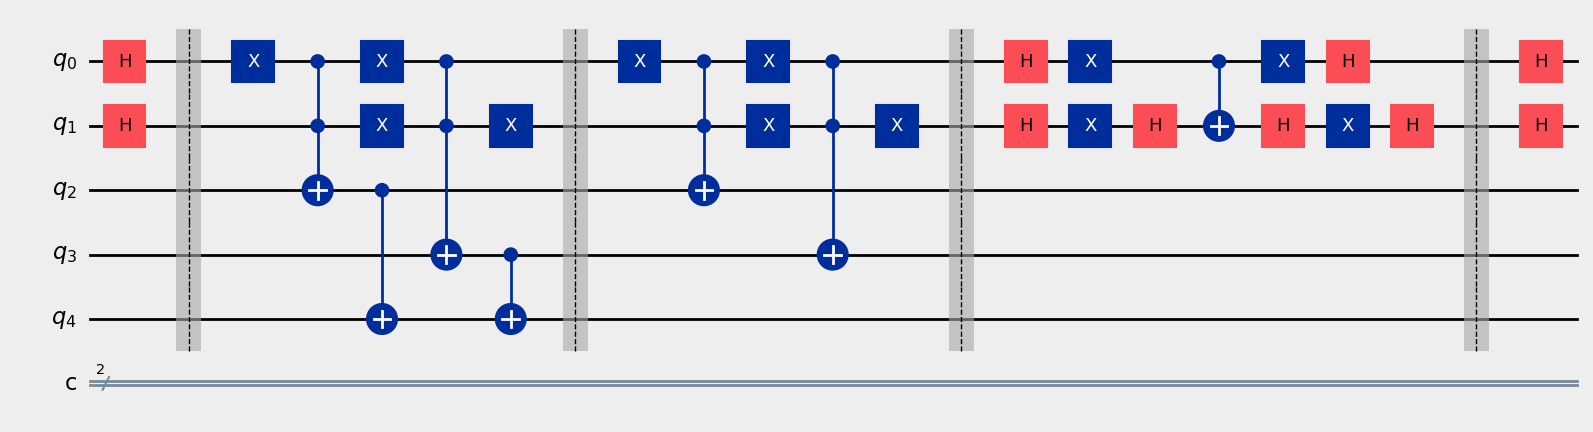

In [74]:
qc = QuantumCircuit(5,2)
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.ccx(0,1,3)
qc.x(1)
qc.cx(2,4)
qc.cx(3,4)
qc.barrier([0,1,2,3,4])
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.ccx(0,1,3)
qc.x(1)
qc.barrier([0,1,2,3,4])
#difusor
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'11': 488, '00': 536}


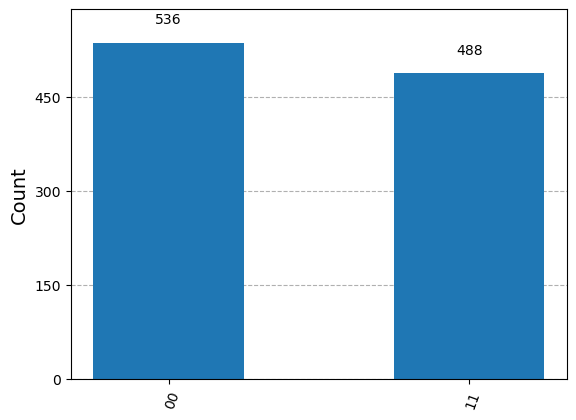

In [75]:
qc.measure([0,1],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

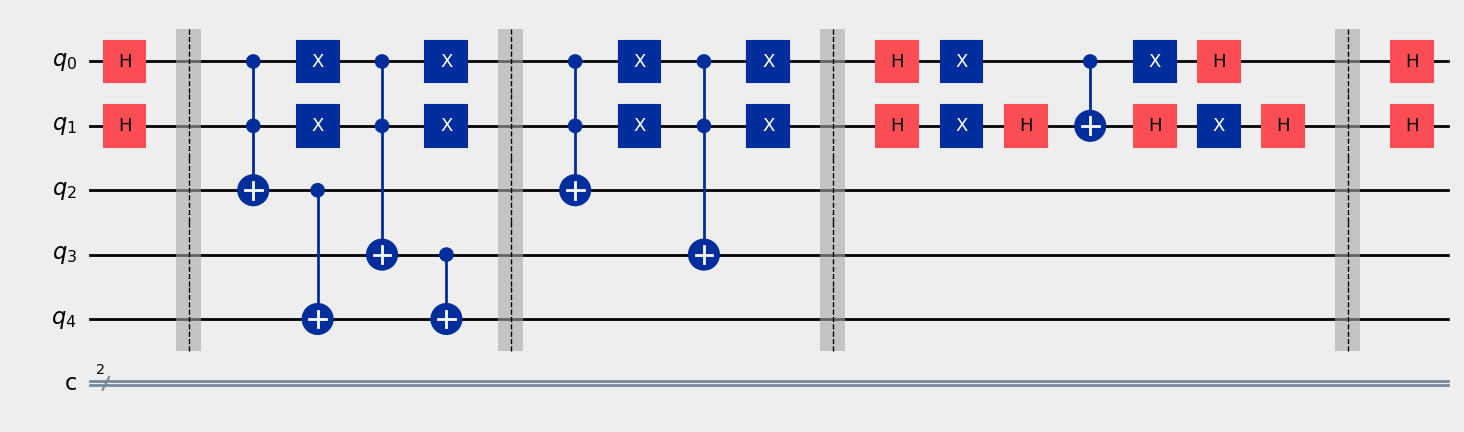

In [76]:
#verifica se iguais
qc = QuantumCircuit(5,2)
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.ccx(0,1,2)
qc.x([0,1])
qc.ccx(0,1,3)
qc.x([0,1])
qc.cx(2,4)
qc.cx(3,4)
qc.barrier([0,1,2,3,4])
qc.ccx(0,1,2)
qc.x([0,1])
qc.ccx(0,1,3)
qc.x([0,1])
qc.barrier([0,1,2,3,4])
#difusor
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.h([0,1])
qc.barrier([0,1,2,3,4])
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'11': 5047, '00': 4953}


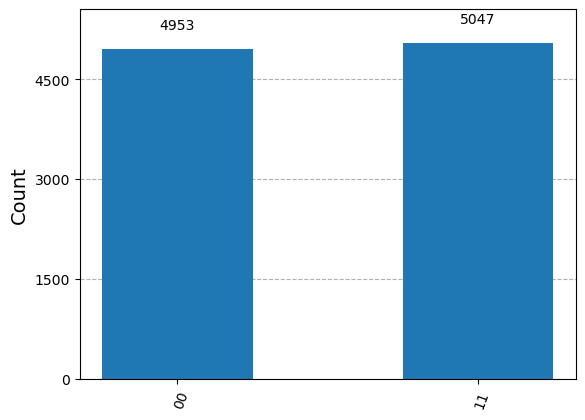

In [77]:
qc.measure([0,1],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=10000).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# q0 e q1 iguais em Grover

In [78]:
def difusor(nqubits):
    qc = QuantumCircuit(nqubits)
    # H Gates em todas as entradas
    for qubit in range(nqubits):
        qc.h(qubit)
    # X gates em todas as entradas
    for qubit in range(nqubits):
        qc.x(qubit)
    # HXH
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # HXH
    qc.h(nqubits-1)
    # X gates em todas entradas
    for qubit in range(nqubits):
        qc.x(qubit)
    # H Gates em todas entradas
    for qubit in range(nqubits):
        qc.h(qubit)
    # Retorna este conjunto como um gate
    diff = qc.to_gate()
    diff.name = "difusor"
    return diff

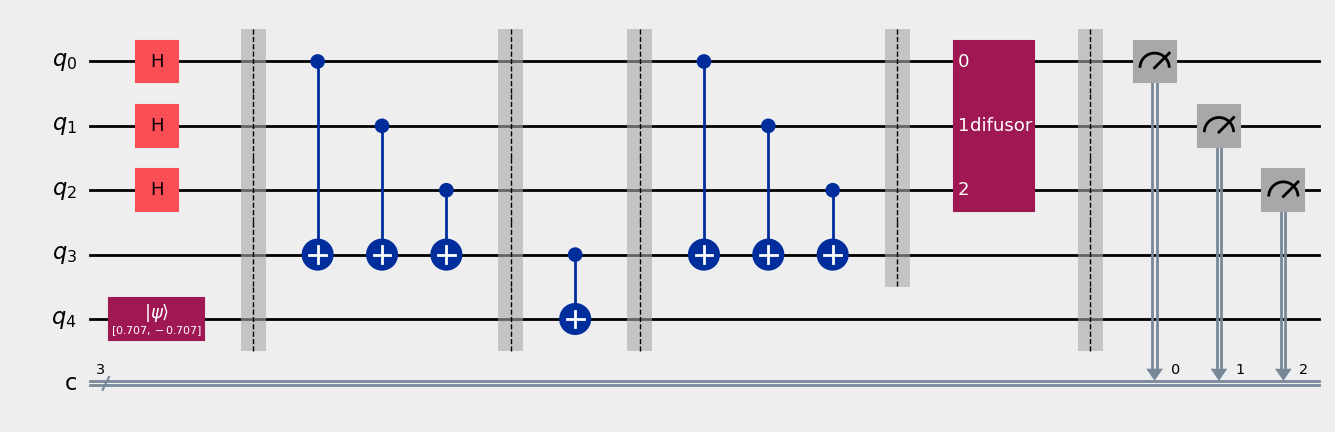

In [79]:
import numpy as np
import math
qc = QuantumCircuit(5,3)
qc.h([0,1,2])
qc.initialize([1, -1]/np.sqrt(2), 4)
qc.barrier([0,1,2,3,4])
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.barrier([0,1,2,3,4])
qc.cx(3,4)
qc.barrier([0,1,2,3,4])
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.barrier([0,1,2,3])
#difusor
qc.append(difusor(3), [0,1,2])
# qc.cx(0,2)
# qc.cx(1,2)
# qc.cx(2,3)
# qc.cx(0,2)
# qc.cx(1,2)
# qc.barrier([0,1,2])
#difusor
#qc.append(difusor(2), [0,1])
qc.barrier([0,1,2,3,4])
qc.measure([0,1,2], [0,1,2])
qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

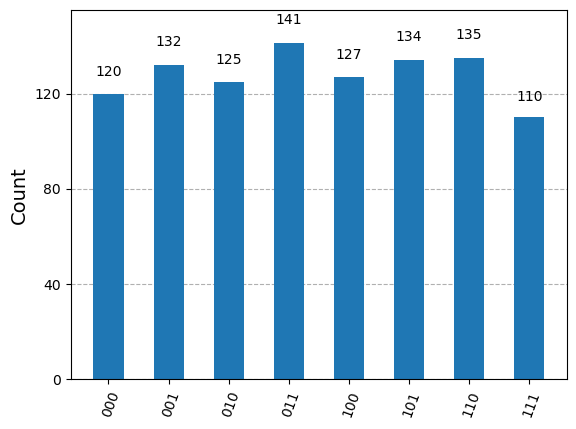

In [80]:
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc).result()
counts = results.get_counts()
plot_histogram(counts)

### SODOKU Oracle

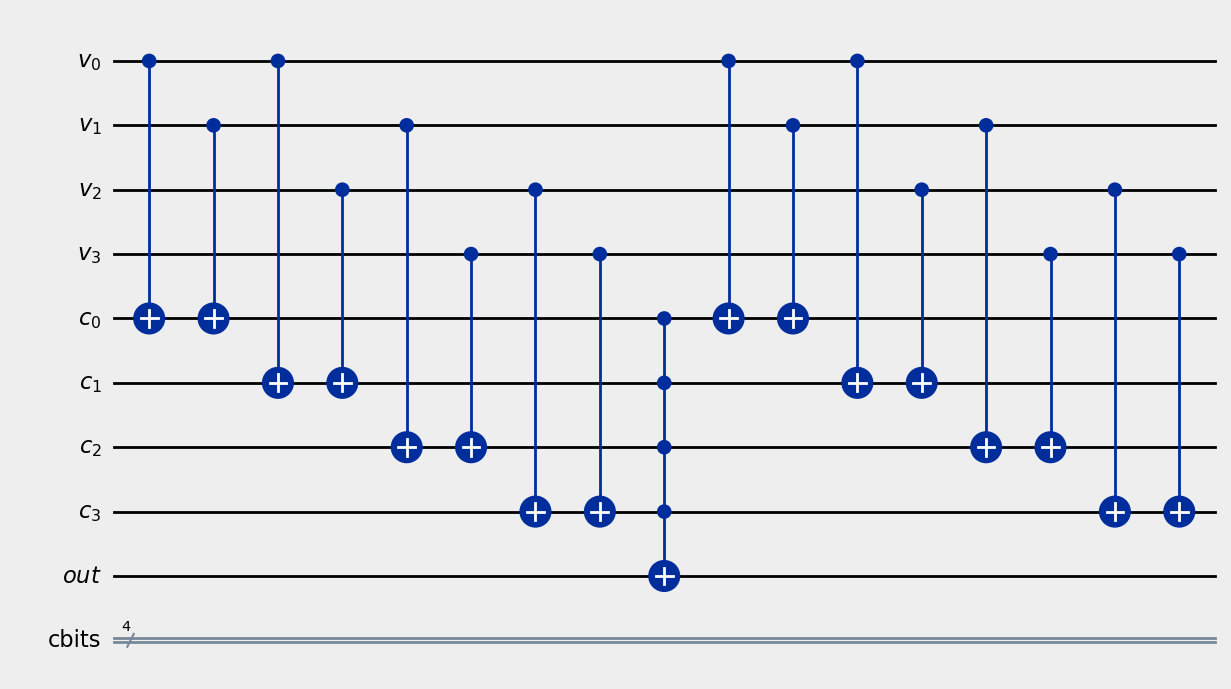

In [81]:
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]
              ]
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
    
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
#clause_qubits = QuantumRegister(1, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mcx(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [82]:
def difusor(nqubits):
    qc = QuantumCircuit(nqubits) # cria Quantum Circuit
    
    for qubit in range(nqubits): # coloca entradas em hadamard
        qc.h(qubit)
    
    for qubit in range(nqubits): # inverte todas as entradas |1>
        qc.x(qubit)

    qc.h(nqubits-1) # aplica hadamard no QUBIT que irá propagar as fases
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # MCT (Toffoli multicontrolado)
    qc.h(nqubits-1) # aplica hadamard no QUBIT que irá propagar as fases
    
    
    for qubit in range(nqubits): # inverte todas as entradas |1>
        qc.x(qubit)
    
    for qubit in range(nqubits): # coloca entradas em hadamard
        qc.h(qubit)

    diff = qc.to_gate()
    diff.name = "difusor"
    return diff

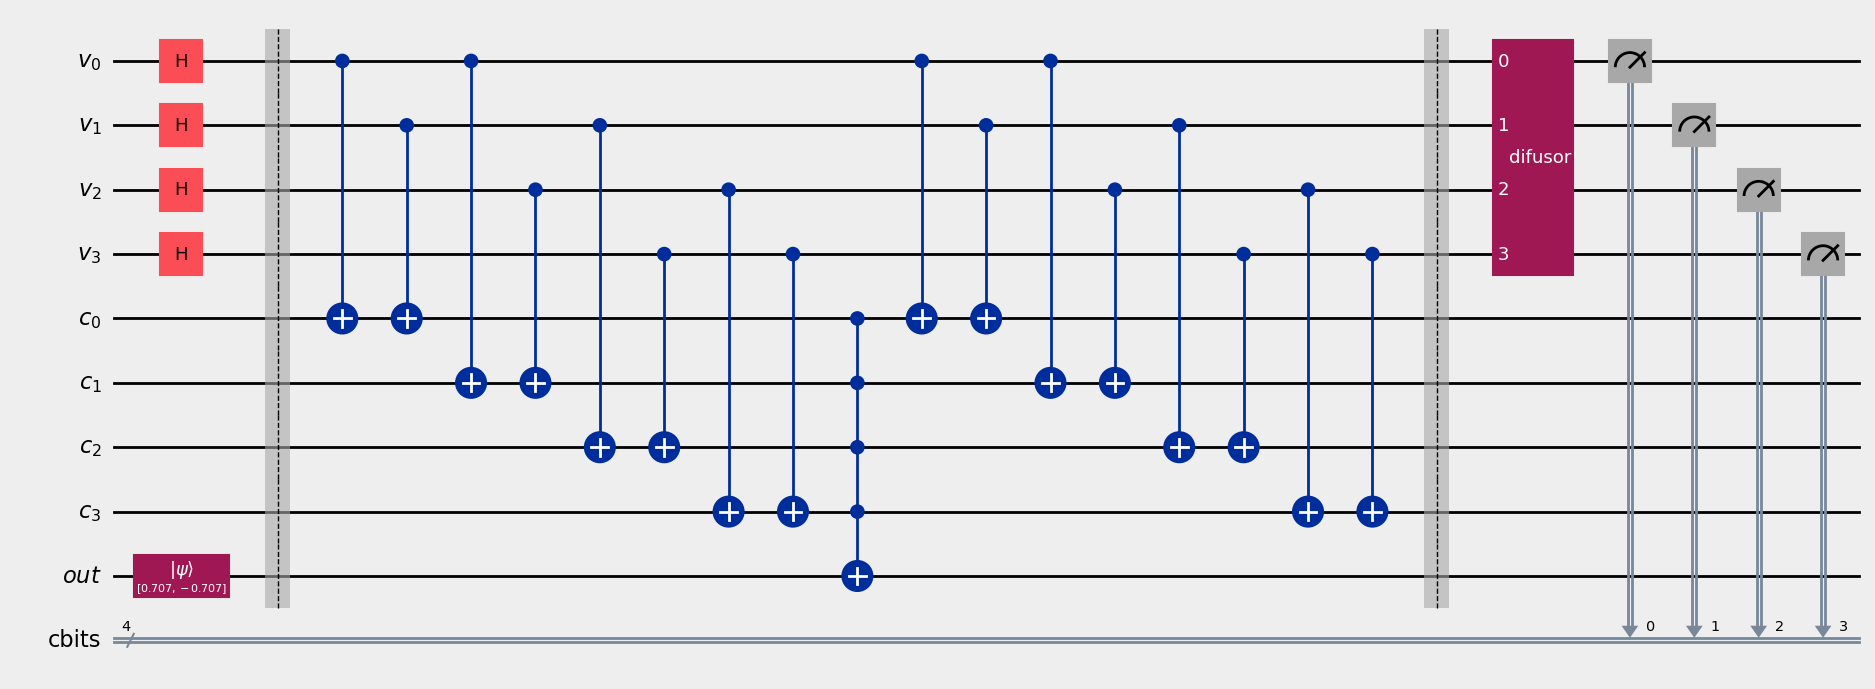

In [83]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
#from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
#from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(difusor(4), [0,1,2,3])

## Second Iteration
#sudoku_oracle(qc, clause_list, clause_qubits)
#qc.barrier()  # for visual separation
# Apply our diffuser
#qc.append(difusor(4), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'0111': 84, '1010': 70, '1011': 70, '0101': 75, '1110': 70, '1000': 92, '0100': 89, '1100': 79, '0001': 88, '0011': 78, '1101': 76, '1111': 61, '1001': 1960, '0000': 82, '0010': 89, '0110': 1937}


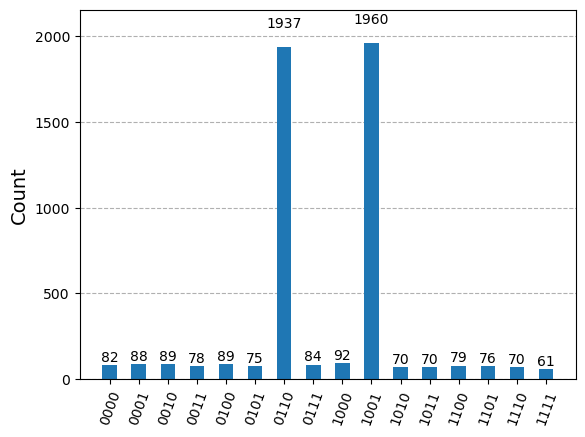

In [84]:
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)


There are two bit strings with a much higher probability of measurement than any of the others, 0110 and 1001. These correspond to the assignments:

v0 = 0

v1 = 1

v2 = 1

v3 = 0

and

v0 = 1

v1 = 0

v2 = 0

v3 = 1

which are the two solutions to our sudoku! The aim of this section is to show how we can create Grover oracles from real problems. While this specific problem is trivial, the process can be applied (allowing large enough circuits) to any decision problem. To recap, the steps are:

# peças do tetris


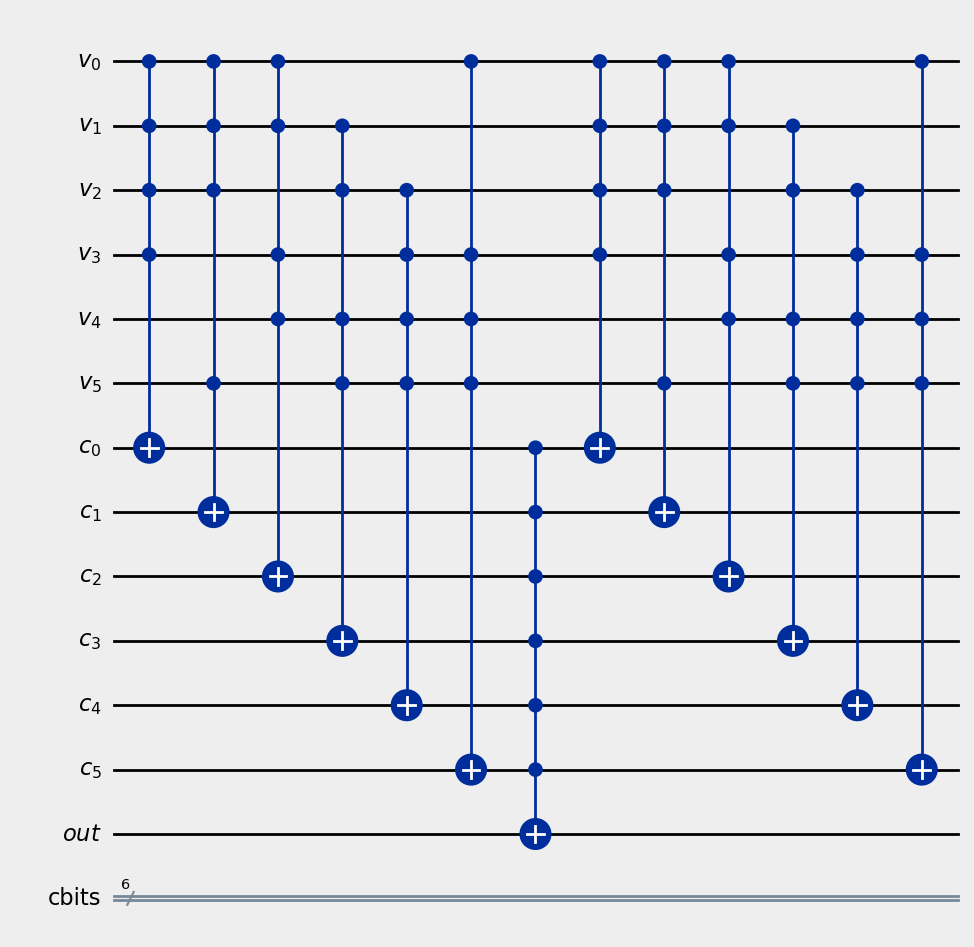

In [85]:
# 012
# 345
pecas_nao_existem = [[0,1,2,3],
               [0,1,2,5],
               [0,1,3,4],
               [1,2,4,5],
               [3,4,5,2],
               [3,4,5,0]
              ]
def XOR(qc, a, b, c, d, output):
    qc.mcx([a,b,c,d], output)
 
    
var_qubits = QuantumRegister(6, name='v')
clause_qubits = QuantumRegister(6, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def tetris(qc, pecas_nao_existem, clause_qubits):
    # Compute clauses
    i = 0
    for clause in pecas_nao_existem:
        XOR(qc, clause[0], clause[1], clause[2], clause[3], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mcx(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in pecas_nao_existem:
        XOR(qc, clause[0], clause[1], clause[2], clause[3], clause_qubits[i])
        i += 1

tetris(qc, pecas_nao_existem, clause_qubits)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

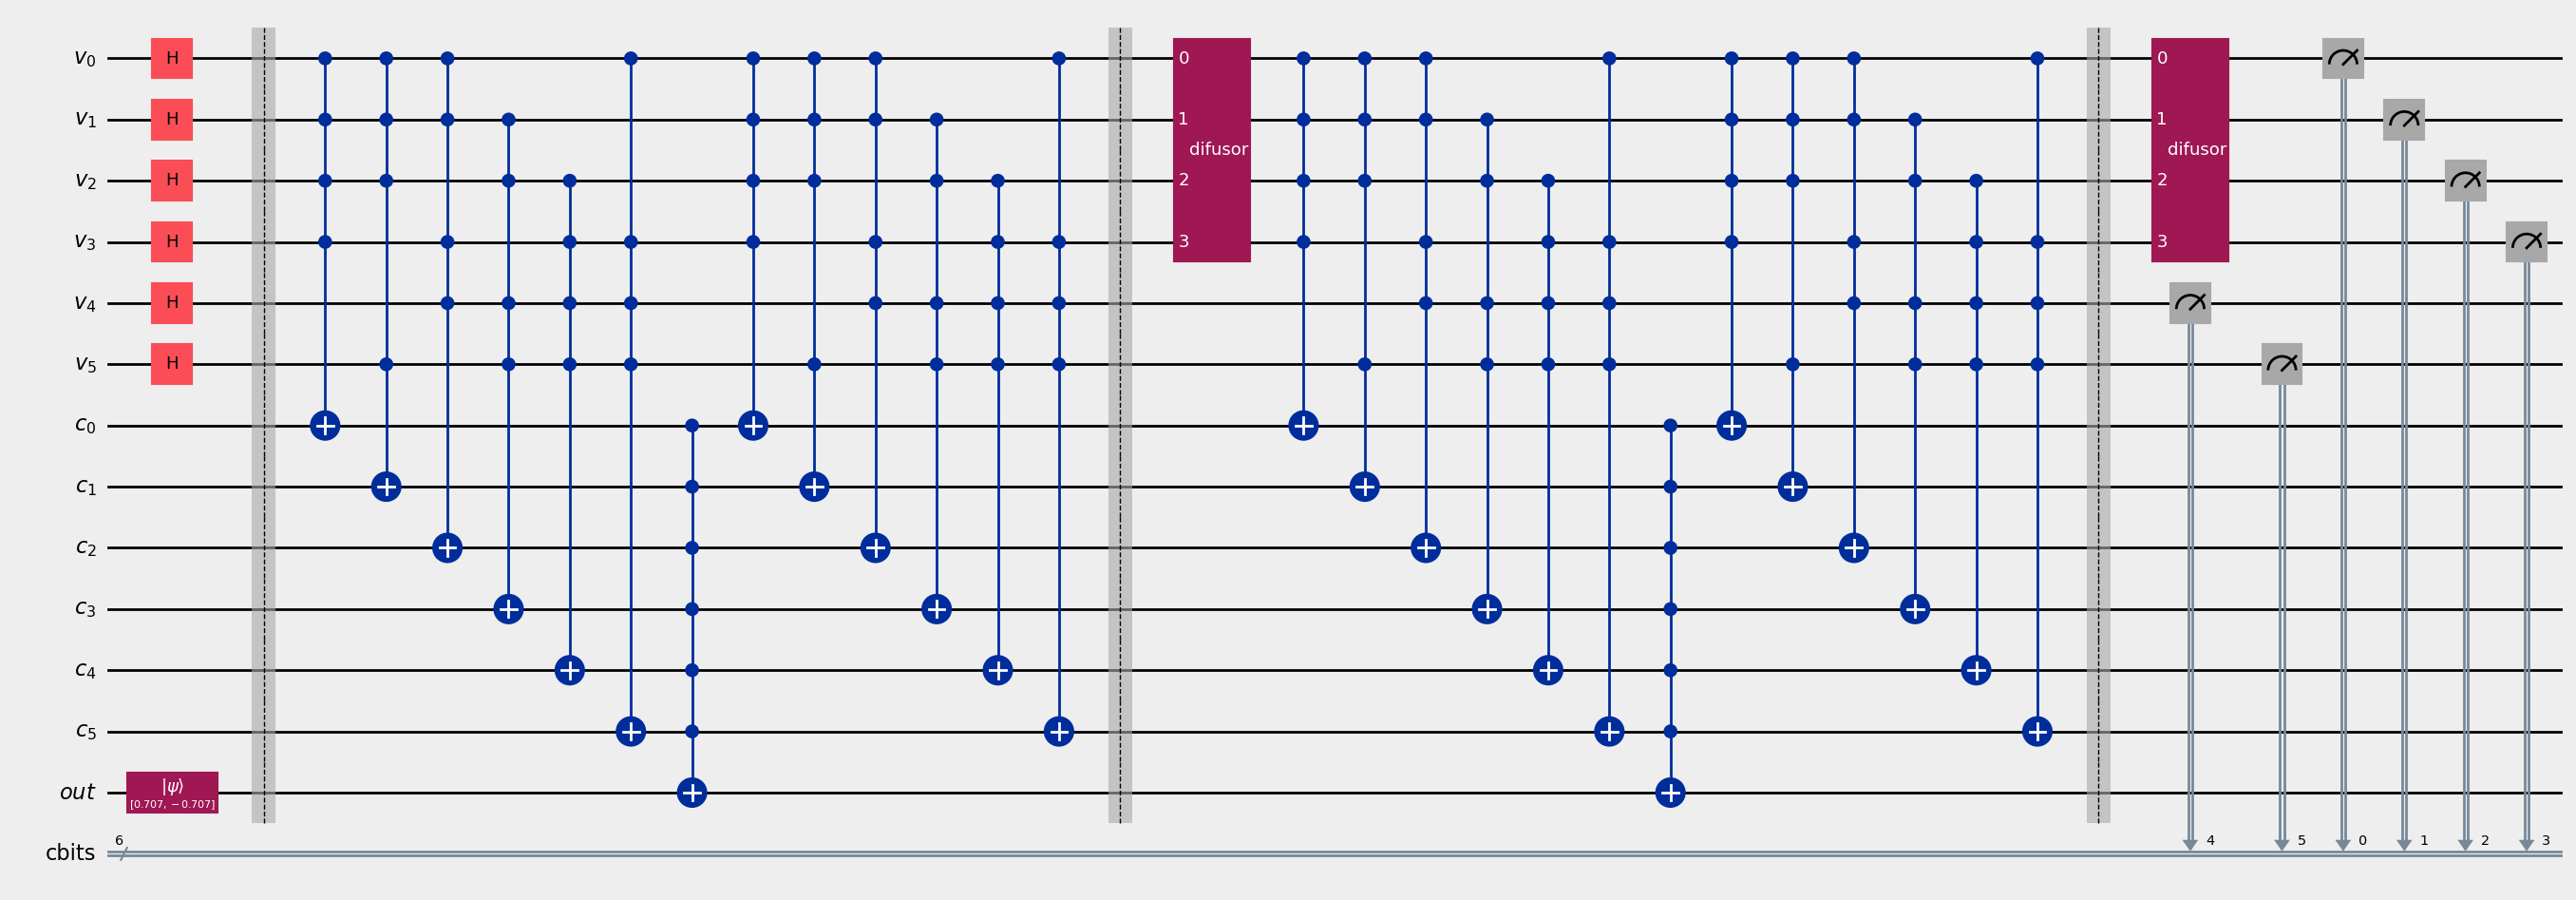

In [86]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
#from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
#from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
var_qubits = QuantumRegister(6, name='v')
clause_qubits = QuantumRegister(6, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
tetris(qc, pecas_nao_existem, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(difusor(4), [0,1,2,3])

## Second Iteration
tetris(qc, pecas_nao_existem, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(difusor(4), [0,1,2,3])


# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'110100': 5, '111011': 2, '111101': 6, '111000': 6, '110110': 7, '101110': 99, '110000': 7, '100011': 70, '110101': 7, '001111': 70, '010000': 85, '100110': 92, '100100': 66, '000010': 82, '101100': 65, '100111': 80, '101111': 82, '011100': 80, '000100': 89, '010100': 89, '000111': 75, '111110': 8, '100000': 89, '001001': 83, '011011': 70, '001011': 81, '100010': 70, '011110': 103, '011111': 82, '011000': 69, '010010': 93, '110001': 8, '000101': 72, '011101': 81, '000000': 73, '000011': 72, '101001': 84, '110010': 10, '101011': 83, '010111': 65, '010110': 84, '010001': 74, '111010': 7, '111100': 8, '001000': 73, '000001': 83, '100101': 66, '101000': 81, '001100': 68, '111111': 1123, '000110': 80, '110011': 8, '101101': 74, '001010': 81, '110111': 5, '011001': 73, '111001': 10, '100001': 79, '101010': 73, '011010': 75, '010101': 62, '010011': 103, '001110': 79, '001101': 71}


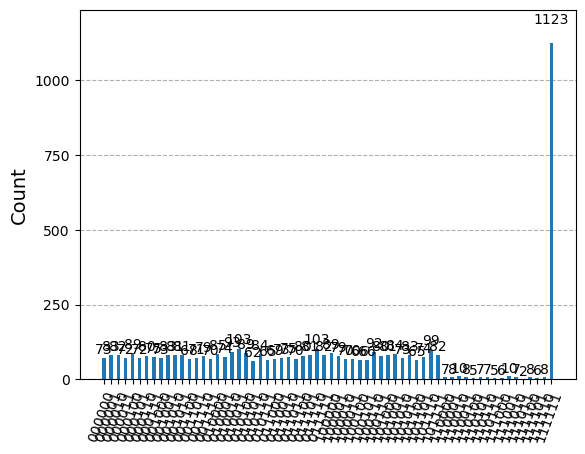

In [87]:
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

# peças do duotris


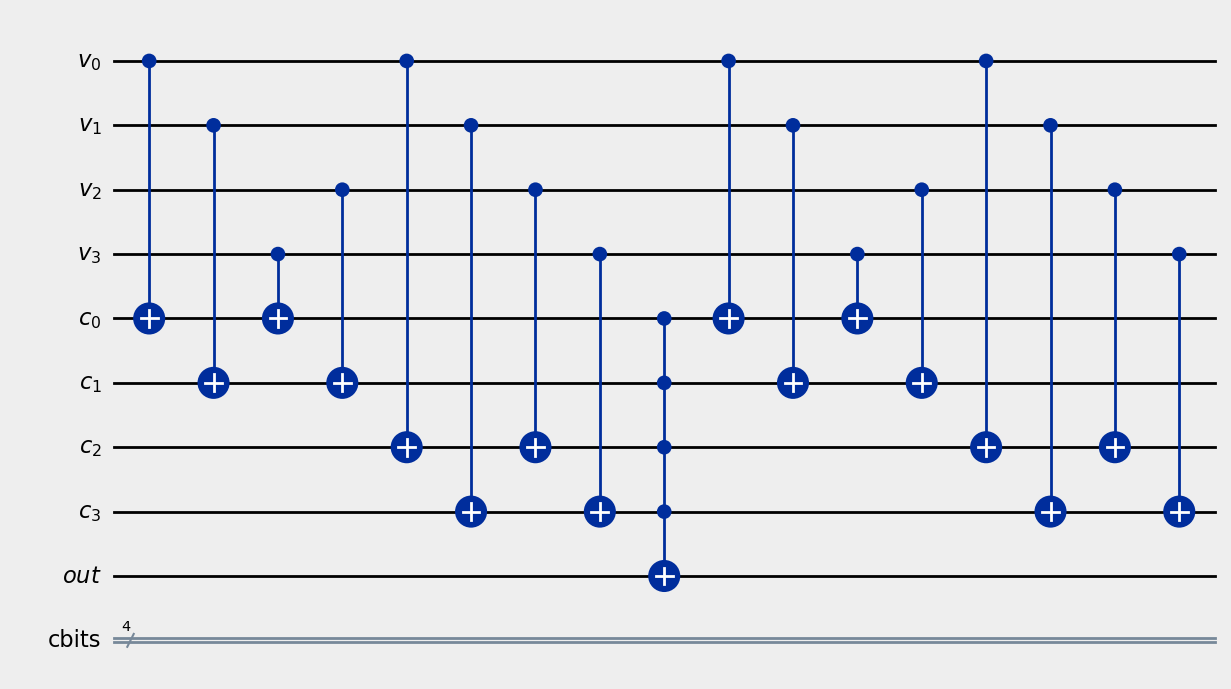

In [162]:

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
  
    
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def duotris(qc, pecas_nao_existem, clause_qubits):
    # Compute clauses
    i = 0
    for clause in pecas_nao_existem:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mcx(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in pecas_nao_existem:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

duotris(qc, pecas_nao_existem, clause_qubits)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

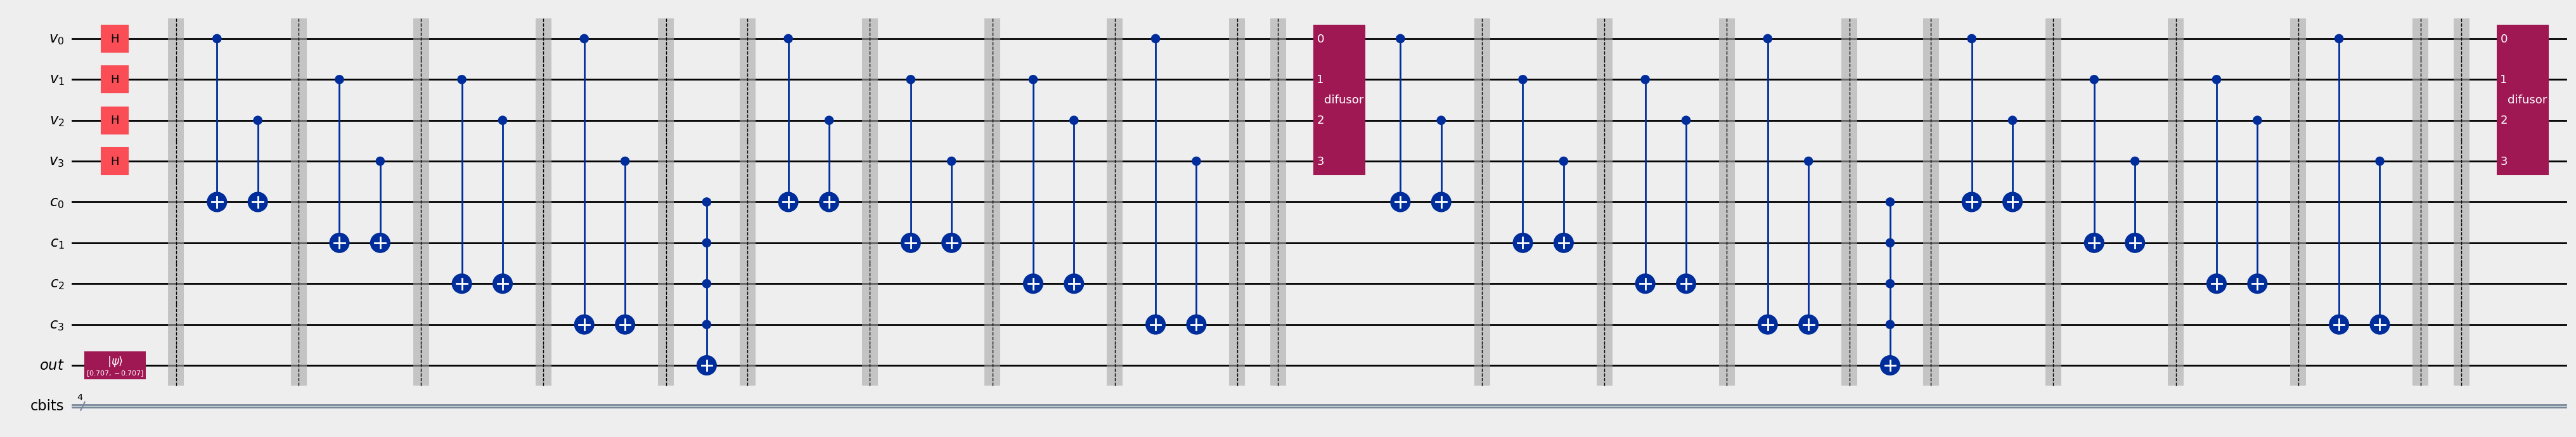

In [209]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
#from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
#from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Inicializa out no valor |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
duotris(qc, pecas_nao_existem, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(difusor(4), [0,1,2,3])

## Second Iteration
duotris(qc, pecas_nao_existem, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(difusor(4), [0,1,2,3])

qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

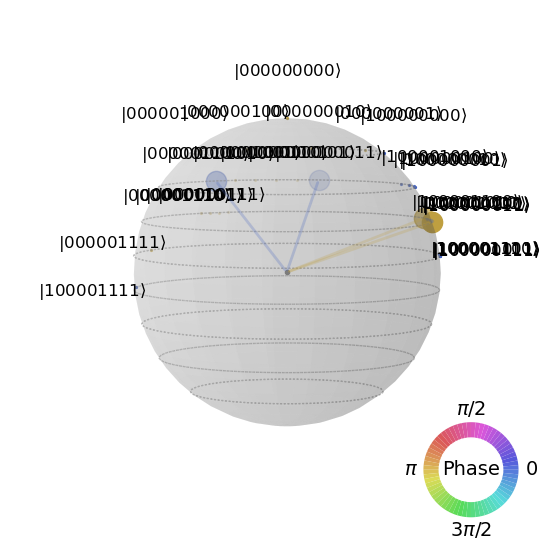

In [210]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

{'1000': 20, '0111': 21, '0110': 18, '0101': 18, '1111': 20, '1101': 23, '0000': 19, '0010': 18, '1001': 19, '1010': 13, '0001': 21, '0011': 2346, '1011': 22, '1110': 27, '0100': 15, '1100': 2380}
<class 'qiskit.result.counts.Counts'>


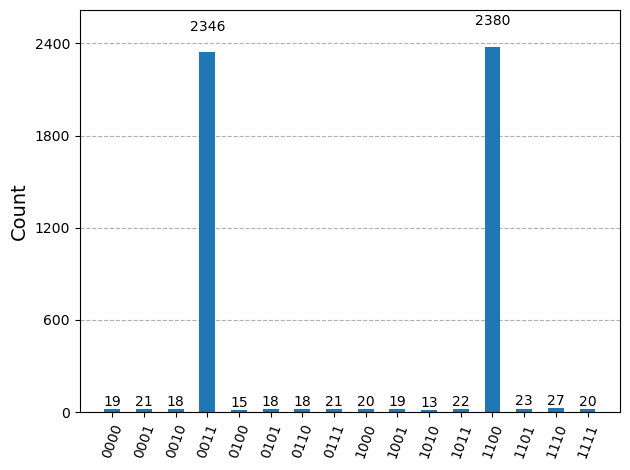

In [211]:
qc.measure(var_qubits, cbits)
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
print(counts)
print(type(counts))
plot_histogram(counts)

# amplitude amplification

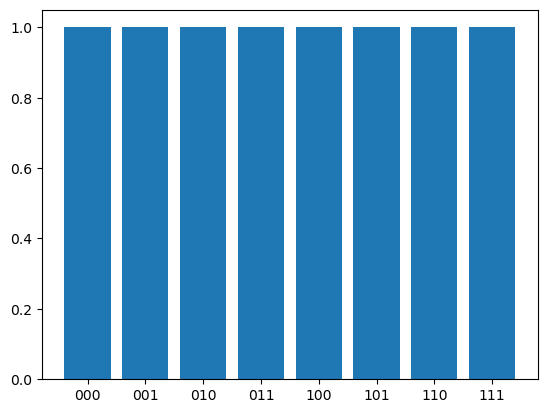

In [174]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
counts = [1, 1, 1, 1, 1, 1, 1, 1]

plt.bar(labels,counts)
plt.show()

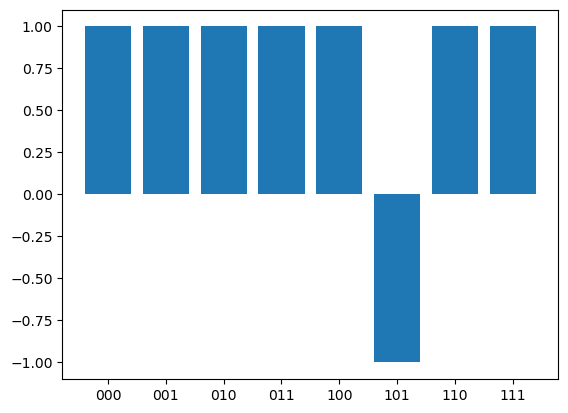

In [175]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
counts = [1, 1, 1, 1, 1, -1, 1, 1]

plt.bar(labels,counts)
plt.show()

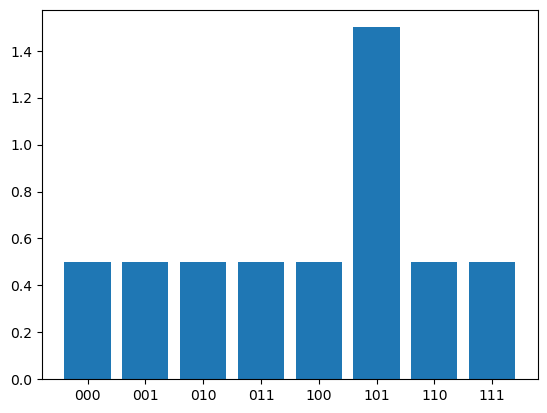

In [176]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['000', '001', '010', '011', '100', '101', '110', '111']
counts = [0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.5, 0.5]

plt.bar(labels,counts)
plt.show()

# duotetris passo a passo

In [178]:
# 01
# 23
pecas_nao_existem = [[0,2],
                     [1,3],
                     [1,2],
                     [0,3]]

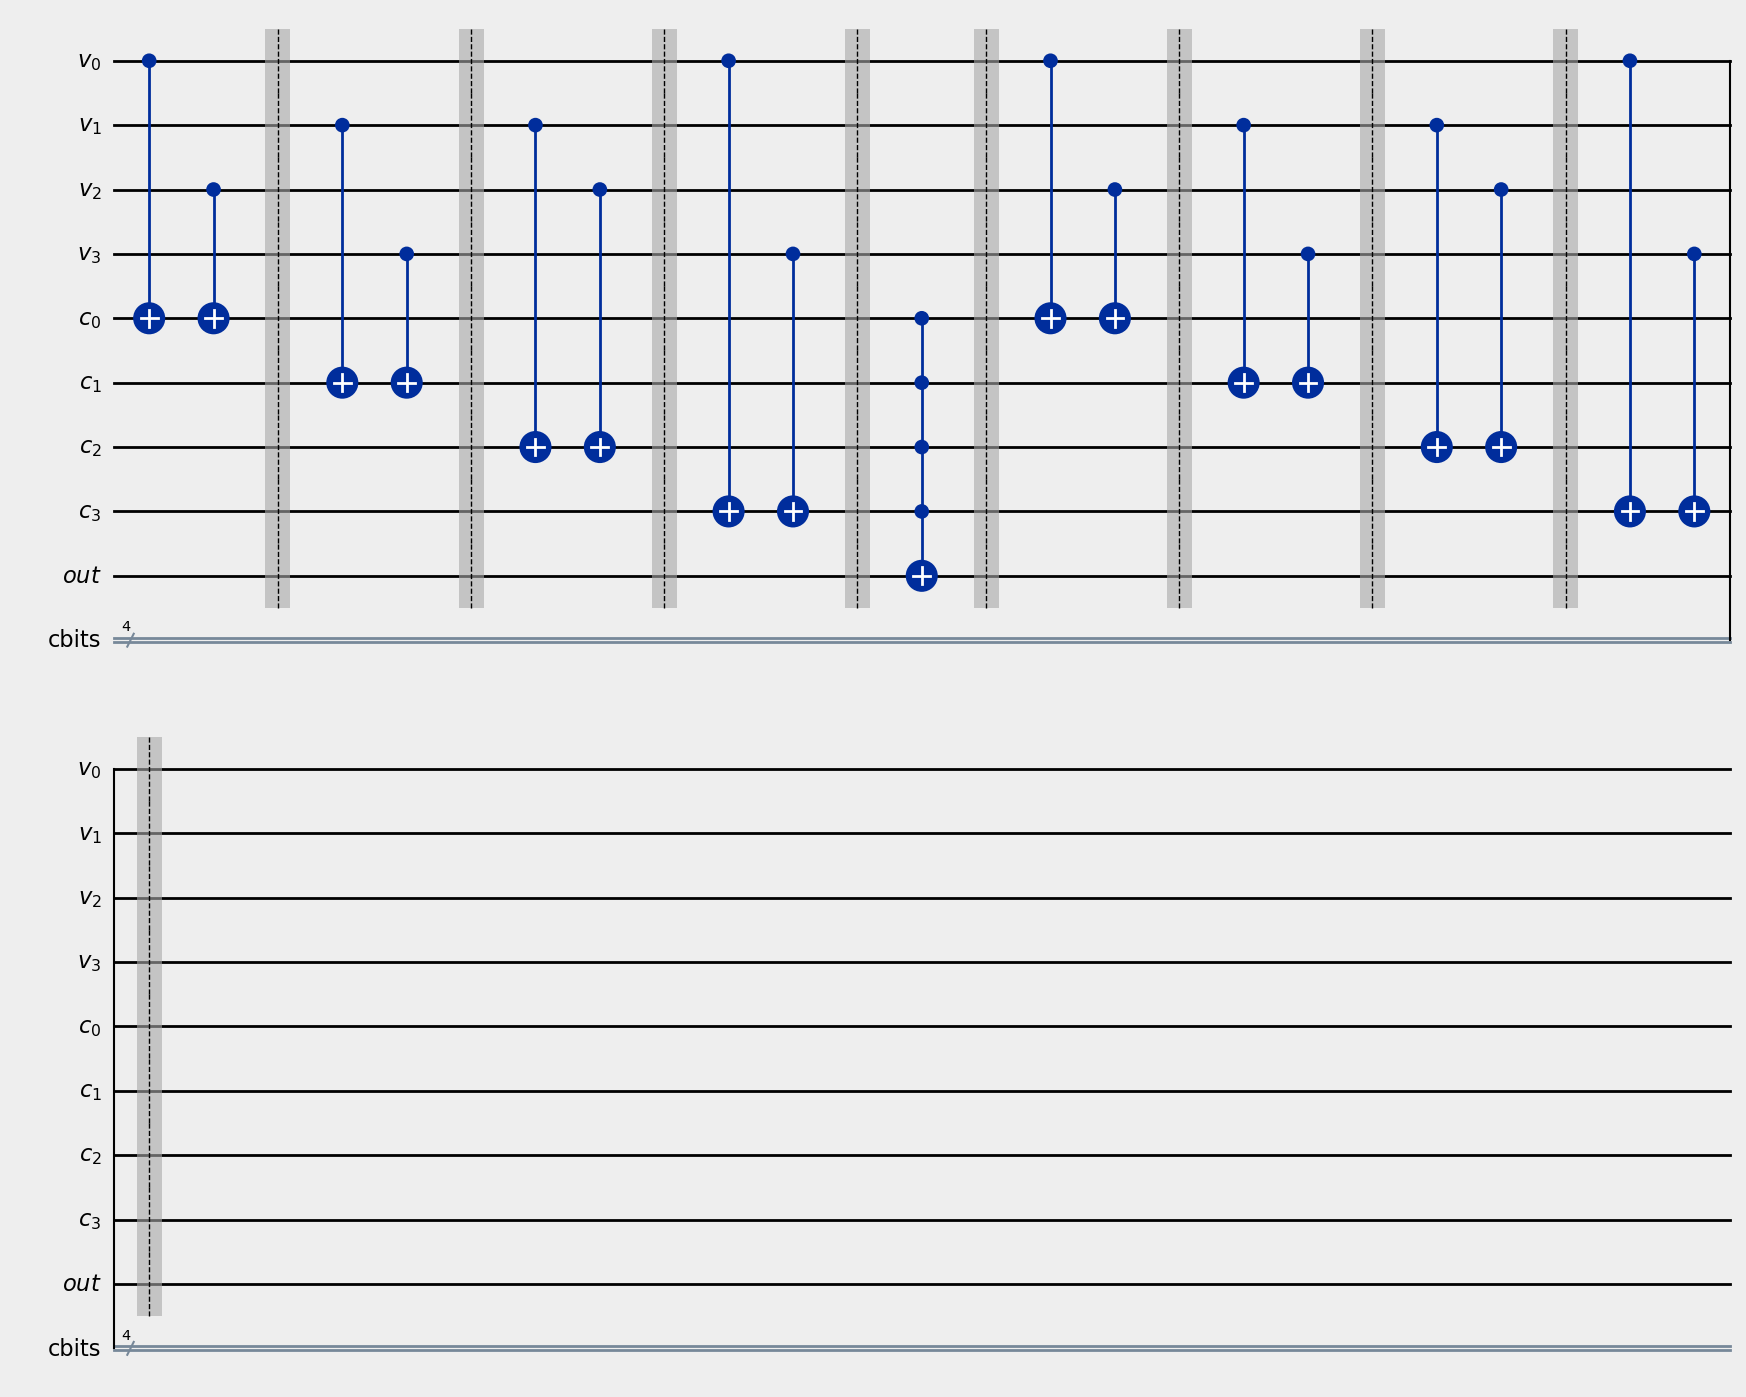

In [205]:
      
input = QuantumRegister(4, name='v')
teste_dupla = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
output = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, teste_dupla, output_qubit, cbits)

def duotris(qc, pecas_nao_existem, teste_dupla):
    # Testa todas as combinações 
    i = 0
    for clause in pecas_nao_existem:
        qc.cx(clause[0], teste_dupla[i])
        qc.cx(clause[1], teste_dupla[i])
        qc.barrier()  # for visual separation
        i += 1

    # Soma todas as combinações em um QUBIT
    qc.mcx(teste_dupla, output_qubit)
    qc.barrier()  # for visual separation

    # Executa Uncompute 
    i = 0
    for clause in pecas_nao_existem:
        qc.cx(clause[0], teste_dupla[i])
        qc.cx(clause[1], teste_dupla[i]) 
        qc.barrier()  # for visual separation
        i += 1

duotris(qc, pecas_nao_existem, teste_dupla)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

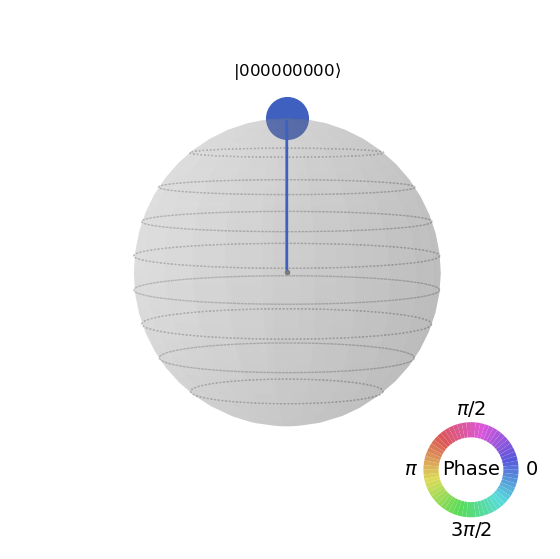

In [206]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

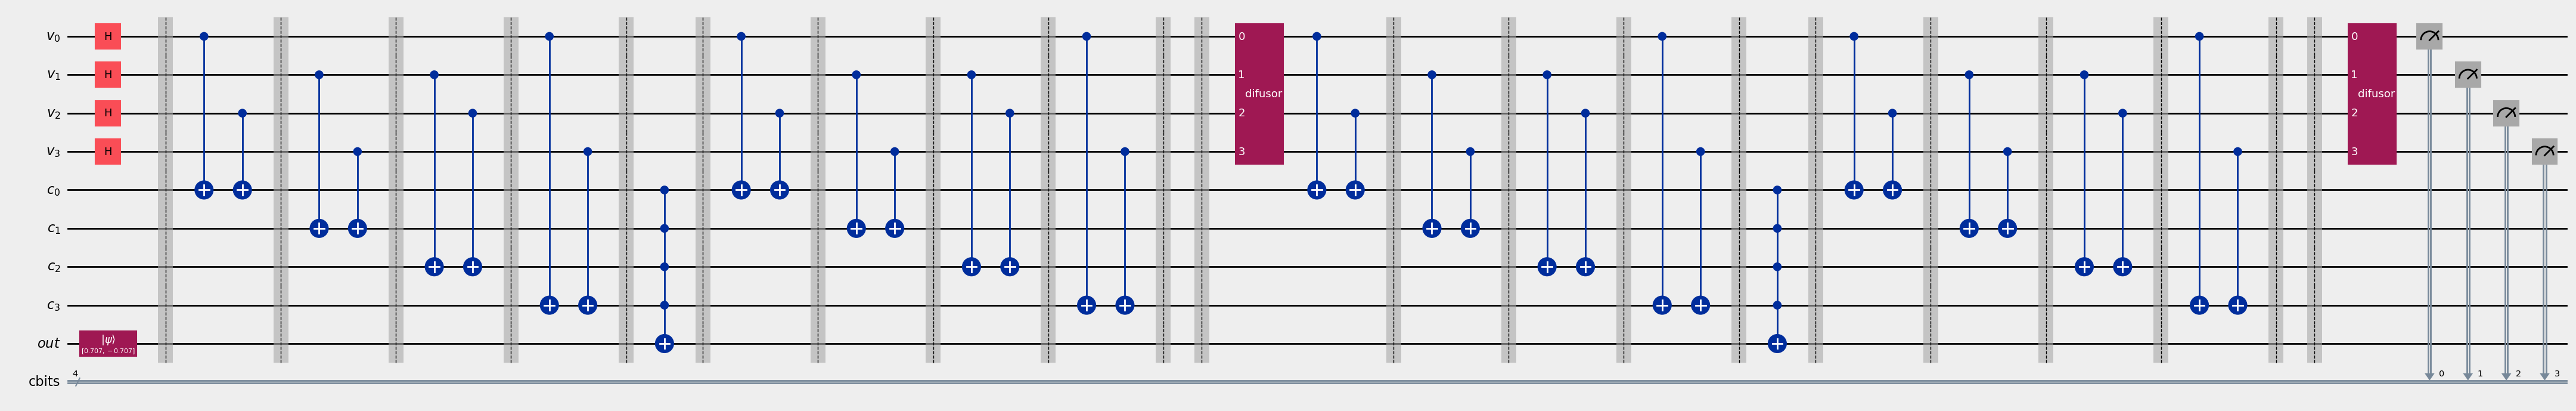

In [200]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# criação dos QUBITs
input = QuantumRegister(4, name='v')
teste_dupla = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
output = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, teste_dupla, output_qubit, cbits)


# Inicializa out no valor |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Coloca todas as entradas em superposição
qc.h(input)
qc.barrier()  

## Primeira execução
duotris(qc, pecas_nao_existem, teste_dupla) # aplica o oracle
qc.barrier()  
qc.append(difusor(4), [0,1,2,3]) # aplica o difusor

## Segunda execução
duotris(qc, pecas_nao_existem, teste_dupla)
qc.barrier()  
qc.append(difusor(4), [0,1,2,3])

qc.measure(input, output) # medida final

qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1010': 16, '1011': 17, '0010': 18, '0111': 16, '1001': 22, '0101': 27, '0000': 23, '0011': 2380, '0001': 14, '0110': 27, '1101': 16, '1111': 11, '1000': 21, '0100': 12, '1100': 2352, '1110': 28}
<class 'qiskit.result.counts.Counts'>


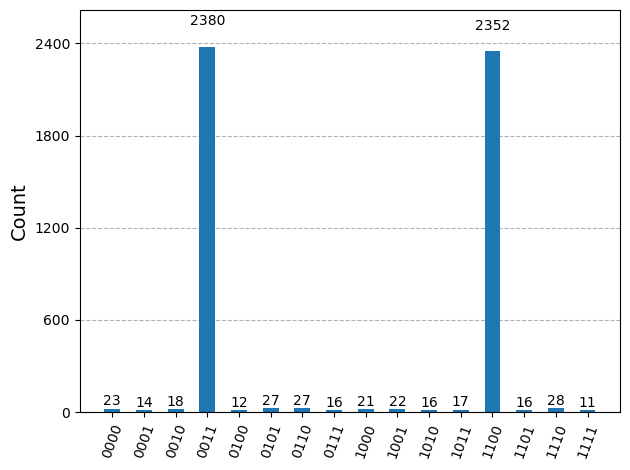

In [201]:
qc.measure(input, output)
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
print(counts)
print(type(counts))
plot_histogram(counts)

# difusor

In [6]:
def difusor(nqubits):
    qc = QuantumCircuit(nqubits) # cria Quantum Circuit
    
    for qubit in range(nqubits): # coloca entradas em hadamard
        qc.h(qubit)
    
    for qubit in range(nqubits): # inverte todas as entradas |1>
        qc.x(qubit)

    qc.h(nqubits-1) # aplica hadamard no QUBIT que irá propagar as fases
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # MCT (Toffoli multicontrolado)
    qc.h(nqubits-1) # aplica hadamard no QUBIT que irá propagar as fases
    
    
    for qubit in range(nqubits): # inverte todas as entradas |1>
        qc.x(qubit)
    
    for qubit in range(nqubits): # coloca entradas em hadamard
        qc.h(qubit)

    diff = qc.to_gate()
    diff.name = "difusor"
    return diff

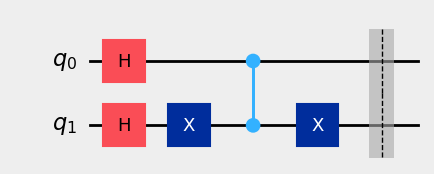

In [7]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.x(1)
qc.cz(1,0)
qc.x(1)
qc.barrier()
#qc.h([0,1])
#qc.append(difusor(2), [0,1]) # aplica o difusor
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

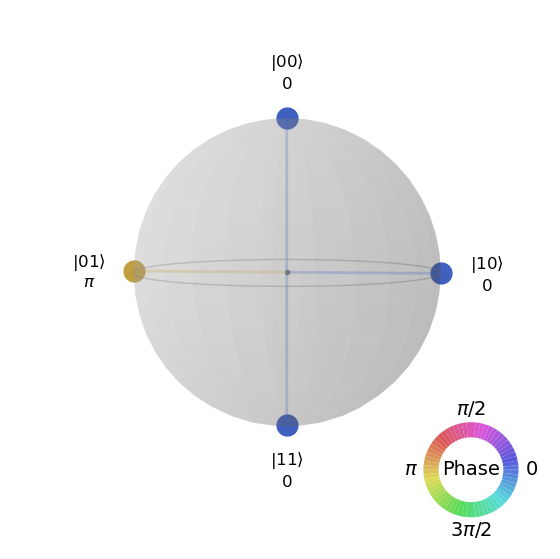

In [7]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)

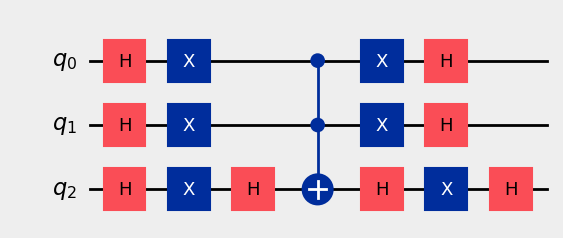

In [267]:
qc = QuantumCircuit(3)
qc.append(difusor(3), [0,1,2]) # aplica o difusor
qc.decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

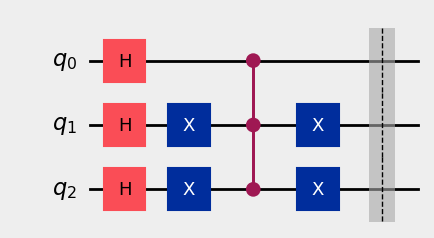

In [257]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.x([1,2])
qc.ccz(2,1,0)
qc.x([1,2])
qc.barrier()
#qc.append(difusor(2), [0,1]) # aplica o difusor
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

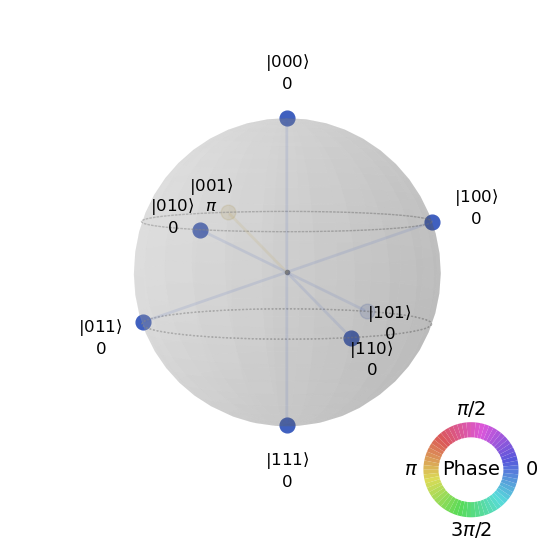

In [258]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)

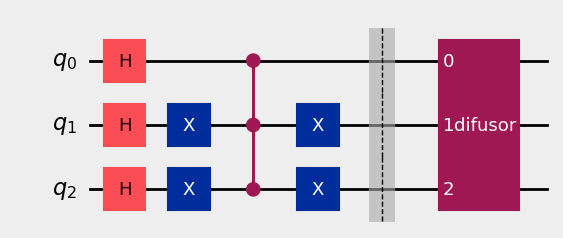

In [259]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.x([1,2])
qc.ccz(2,1,0)
qc.x([1,2])
qc.barrier()
qc.append(difusor(3), [0,1,2]) # aplica o difusor
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

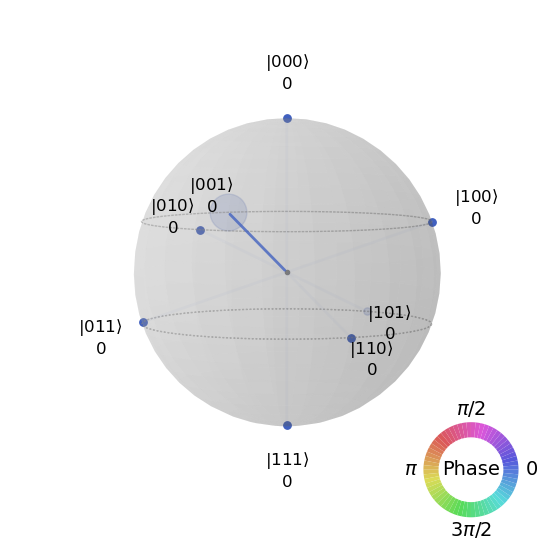

In [260]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)

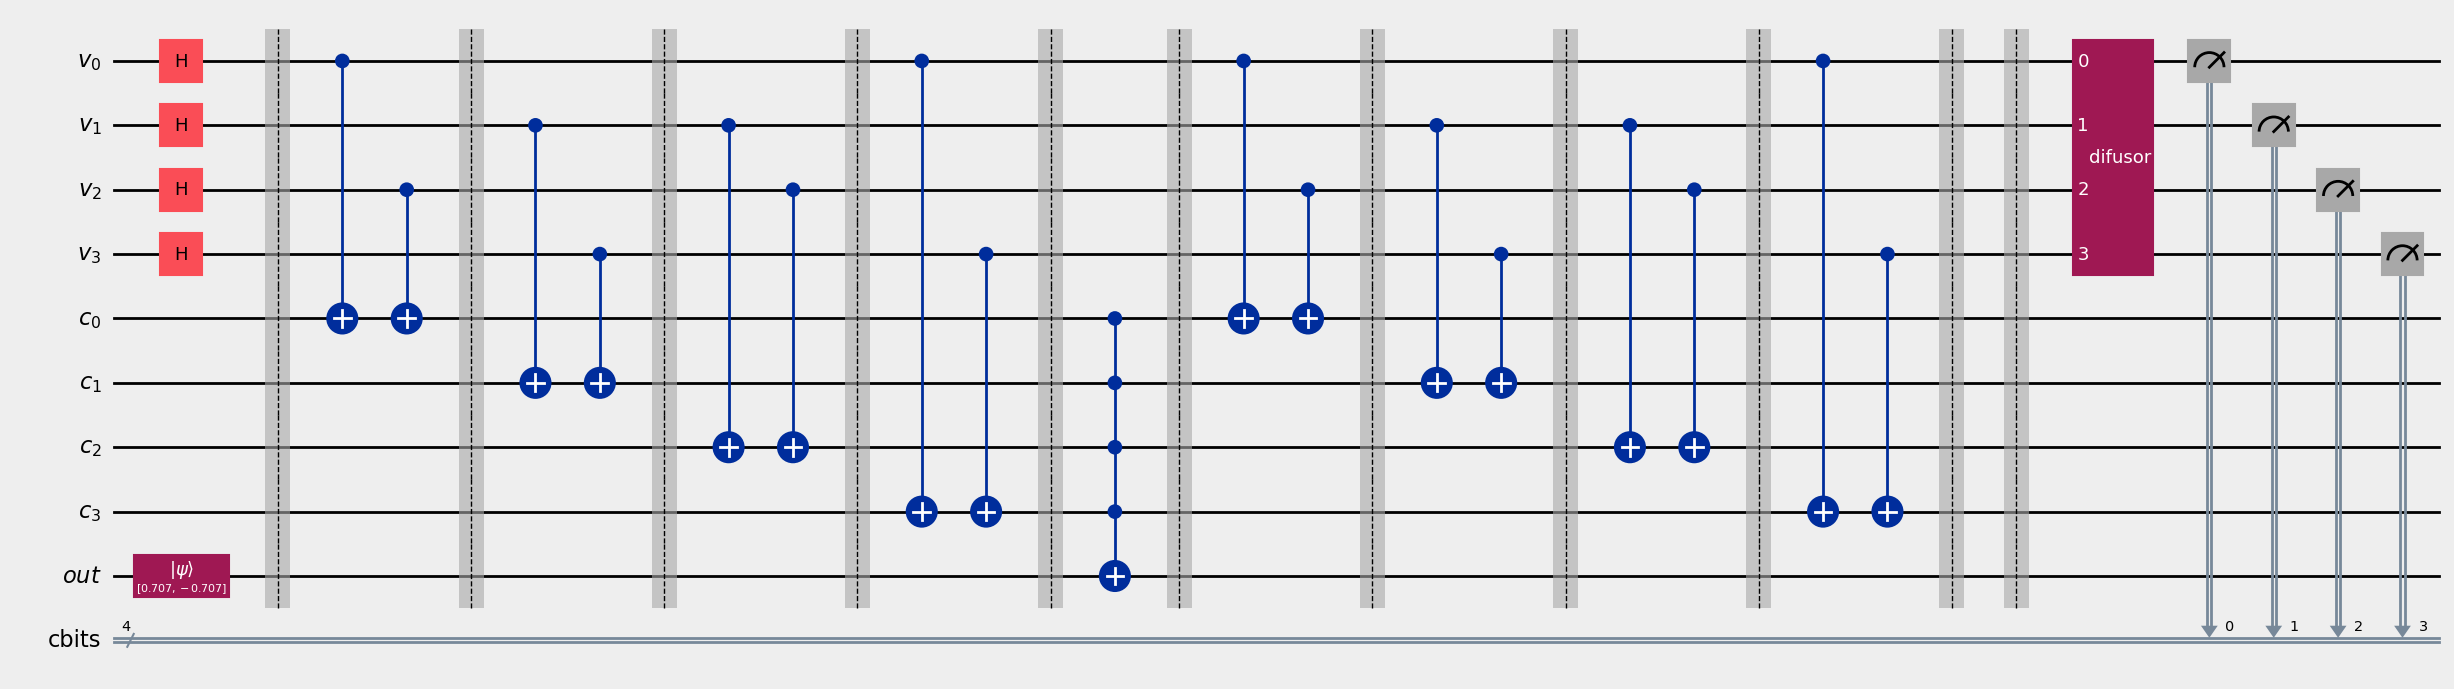

In [268]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# criação dos QUBITs
input = QuantumRegister(4, name='v')
teste_dupla = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
output = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, teste_dupla, output_qubit, cbits)


# Inicializa out no valor |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Coloca todas as entradas em superposição
qc.h(input)
qc.barrier()  

## Primeira execução
duotris(qc, pecas_nao_existem, teste_dupla) # aplica o oracle
qc.barrier()  
qc.append(difusor(4), [0,1,2,3]) # aplica o difusor


qc.measure(input, output) # medida final

qc.draw(fold=-1, output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1011': 65, '0010': 88, '0110': 69, '0101': 95, '0011': 2023, '0001': 73, '1010': 69, '1001': 79, '1101': 76, '1111': 81, '0111': 67, '1000': 82, '1110': 89, '0100': 58, '1100': 1903, '0000': 83}
<class 'qiskit.result.counts.Counts'>


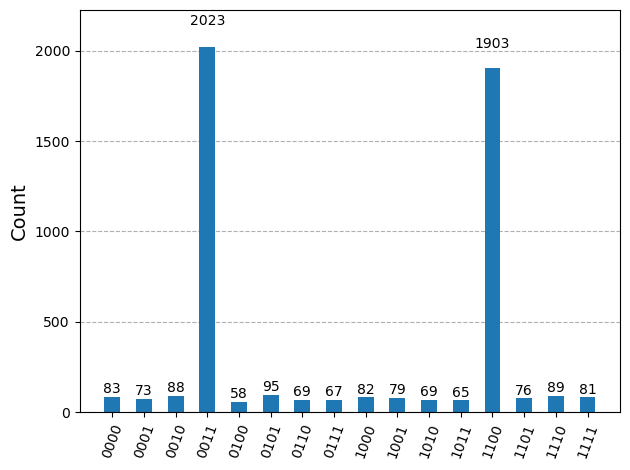

In [269]:
qc.measure(input, output)
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
print(counts)
print(type(counts))
plot_histogram(counts)

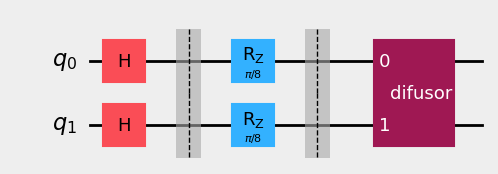

In [102]:
qc = QuantumCircuit(2)
angulo = math.pi / 8
qc.h([0,1])
qc.barrier(0,1)
qc.rz(angulo, 0)
qc.rz(angulo, 1)
qc.barrier(0,1)
qc.append(difusor(2), [0,1]) # aplica o difusor
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

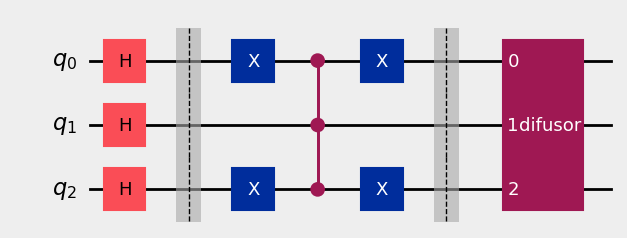

In [8]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.barrier(0,1,2)
qc.x([0,2])
qc.ccz(0,1,2)
qc.x([0,2])
qc.barrier(0,1,2)
qc.append(difusor(3), [0,1, 2]) # aplica o difusor
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

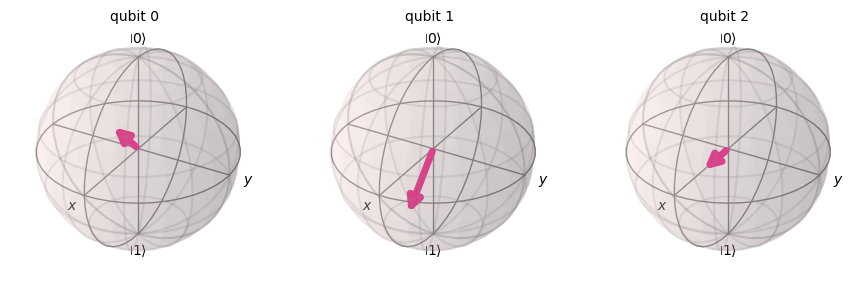

In [129]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

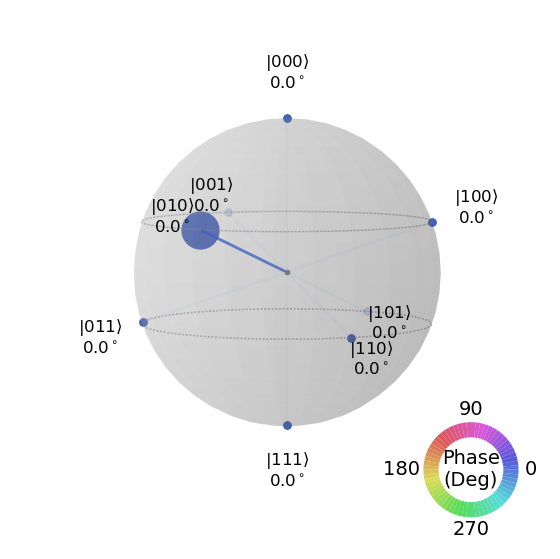

In [9]:
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

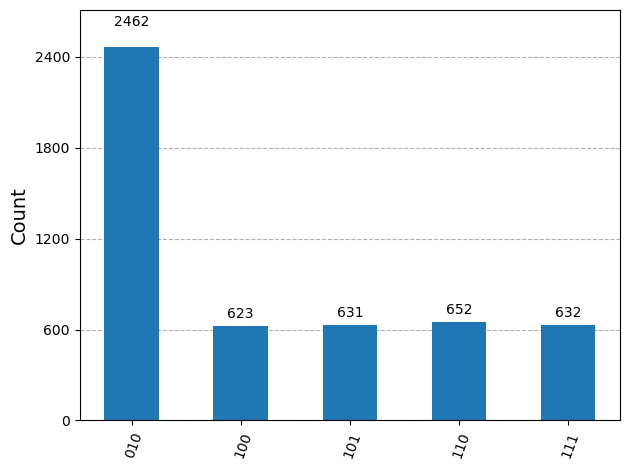

In [131]:
qc.measure_all()
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc, shots=5000).result()
counts = results.get_counts()
plot_histogram(counts)

# Random Walk

In [77]:
def circuit():
    qc = QuantumCircuit(4)
    qc.h(0)
    #incremento
    qc.mcx([0,1,2],3)
    qc.ccx(0,1,2)
    qc.cx(0,1)
    qc.x(0)
    # decremento
    qc.cx(0,1)
    qc.ccx(0,1,2)
    qc.mcx([0,1,2],3)
    return qc

#qc = circuit()
#qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

In [54]:
def measure():
    qc.measure([1,2,3],[0,1,2])
    qasm_sim = Aer.get_backend('qasm_simulator')
    qc = transpile(qc, qasm_sim)
    results = qasm_sim.run(qc, shots=1).result()
    return list(results.results[0].data.counts.keys())[0]


In [55]:
def preparation(value):
  qc1=QuantumCircuit(3)
  if (value ^ 1):
        qc1.h(0)
  if (value ^ 2):
        qc1.h(1)
  if (value ^ 4):
        qc1.h(2)
  return qc1

#qc = preparation(3)
#qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

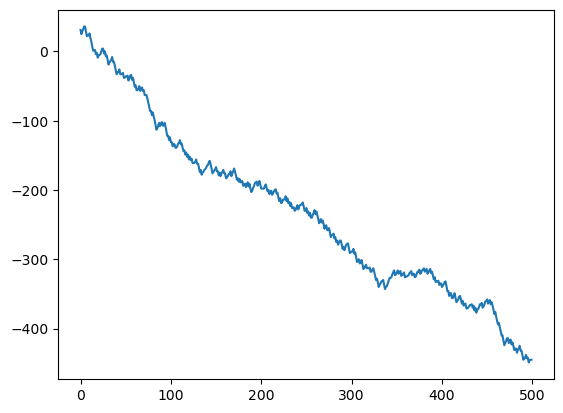

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import struct
num_iter = 500
qc = QuantumCircuit(4,3)
value = 0
values = []
actualvalue = 30
for value in range(num_iter):
    qc.append(preparation(value), [1,2,3])
    qc.append(circuit(), [0,1,2,3])
    qc.measure([1,2,3],[0,1,2])
    qasm_sim = Aer.get_backend('qasm_simulator')
    qc = transpile(qc, qasm_sim)
    results = qasm_sim.run(qc, shots=1).result()
    value = list(results.results[0].data.counts.keys())[0]
    value = int(value, 16)  # Convert hex string to integer
    value = float(value)
    if (value >= 5):
        actualvalue = actualvalue - (value)
    else:
        actualvalue = actualvalue + (value)
    values.append(actualvalue)

y = values
x = np.array(range(num_iter))  

plt.plot(x, y)  
plt.show() 


# Bernstein-Vazirani

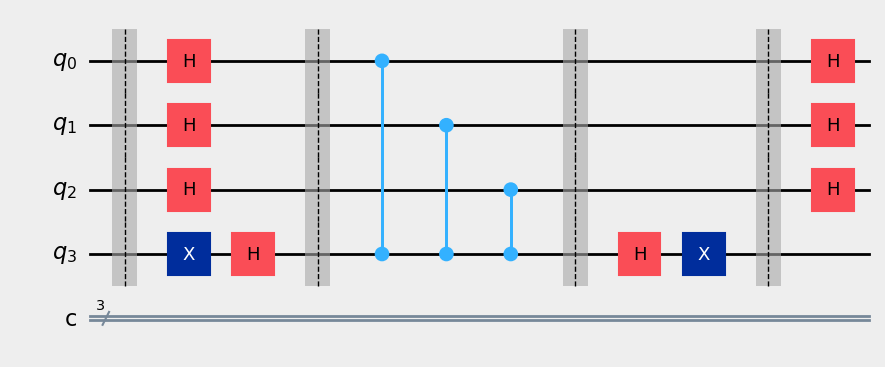

In [83]:
#Bernstein-Vazirani  000
qc = QuantumCircuit(4,3)
qc.barrier(0,1,2,3)
#qc.x(0)
qc.x(3)
qc.h([0,1,2,3])
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.cz(0,3)
qc.cz(1,3)
qc.cz(2,3)
qc.barrier(0,1,2,3)
qc.h(3)
qc.x(3)
#qc.x([0,1,2])
qc.barrier(0,1,2,3)
qc.h([0,1,2])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

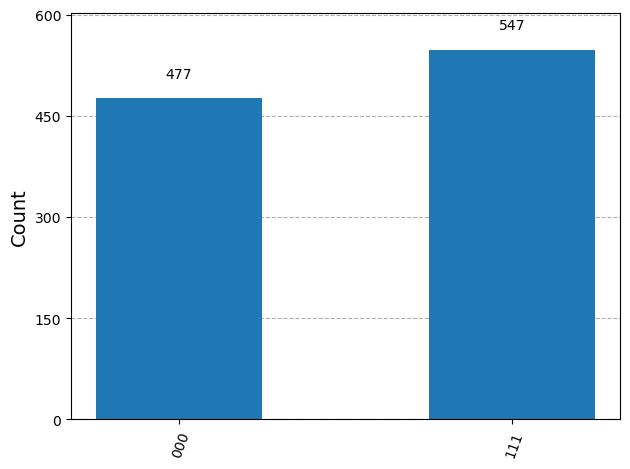

In [84]:
qc.measure([0,1,2],[0,1,2])
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
results = qasm_sim.run(qc).result()
counts = results.get_counts()
plot_histogram(counts)

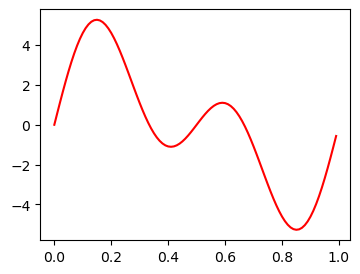

In [101]:
import numpy as np
from matplotlib import pyplot as plt
#Número de poontos
sr = 100
#intervalor entre os pontos 
ts = 1.0 / sr
t = np.arange(0,1,ts)

freq = 1.0
#calculo para cada ponto 
x = 3 * np.sin(4*np.pi*freq*t) + 3*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (4,3))
plt.plot(t,x, 'r')
plt.show()

In [109]:
res = np.sum(x)
print(f'{res:.5f}')

0.00000


# QUBO

In [2]:
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.algorithms import MinimumEigenOptimizer

from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import QAOA

# # Note: These are the replacements of the aqua package.
# from qiskit.utils import algorithm_globals, QuantumInstance
# from qiskit.algorithms import QAOA

Q = [[-23.0,   0.,   4.,   4.,   0.,   4.]
     [  0., -31.,   4.,   4.,   4.,   4.]
     [  4.,   4., -15.,   0.,   0.,   0.]
     [  4.,   4.,   0., -23.,   4.,   0.]
     [  0.,   4.,   0.,   4., -15.,   0.]
     [  4.,   4.,   0.,   0.,   0., -15.]]


def solve(Q):
    qp = QuadraticProgram()
    [qp.binary_var() for _ in range(Q.shape[0])]
    qp.minimize(quadratic=Q)

    quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'))
    qaoa_mes = QAOA(quantum_instance=quantum_instance)
    qaoa = MinimumEigenOptimizer(qaoa_mes)
    qaoa_result = qaoa.solve(qp)
    return [qaoa_result.x], [qaoa_result.fval]

<>:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?


ModuleNotFoundError: No module named 'qiskit.optimization'

In [20]:
!pip install qiskit.optimization
#!pip install qiskit.optimization.algorithms

In [7]:
items_values = {"⚽️": 8, "💻": 47, "📸": 10, "📚": 5, "🎸": 16}
values_list = [8, 47, 10, 5, 16]
items_weight = {"⚽️": 3, "💻": 11, "📸": 14, "📚": 19, "🎸": 5}
weights_list = [3, 11, 14, 19, 5]
maximum_weight = 26
import numpy as np

def sum_weight(bitstring, items_weight):
    weight = 0
    for n, i in enumerate(items_weight):
        if bitstring[n] == "1":
            weight += i
    return weight


def sum_values(bitstring, items_value):
    value = 0
    for n, i in enumerate(items_value):
        if bitstring[n] == "1":
            value += i
    return value

items = list(items_values.keys())
n_items = len(items)
combinations = {}
max_value = 0
for case_i in range(2**n_items):  # all possible options
    combinations[case_i] = {}
    bitstring = np.binary_repr(
        case_i, n_items
    )  # bitstring representation of a possible combination, e.g, "01100" in our problem means bringing (-💻📸--)
    combinations[case_i]["items"] = [items[n] for n, i in enumerate(bitstring) if i == "1"]
    combinations[case_i]["value"] = sum_values(bitstring, values_list)
    combinations[case_i]["weight"] = sum_values(bitstring, weights_list)
    # save the information of the optimal solution (the one that maximizes the value while respecting the maximum weight)
    if (
        combinations[case_i]["value"] > max_value
        and combinations[case_i]["weight"] <= maximum_weight
    ):
        max_value = combinations[case_i]["value"]
        optimal_solution = {
            "items": combinations[case_i]["items"],
            "value": combinations[case_i]["value"],
            "weight": combinations[case_i]["weight"],
        }


print(
    f"The best combination is {optimal_solution['items']} with a total value: {optimal_solution['value']} and total weight {optimal_solution['weight']} "
)


The best combination is ['⚽️', '💻', '🎸'] with a total value: 71 and total weight 19 


In [8]:
def time_to_solution(n, time_single_case):
    """
        n (int): number of variables
        time_single_case (float): time to solve a single case
    """
    return time_single_case * 2 ** n

time_per_case = 1e-9 # time to execute a single case in seconds
sec_day = 3600 * 24 # seconds in a day
sec_year = sec_day * 365 # seconds in a year

print(
    f"- For 10 items, 2^10 cases, we need {time_to_solution(2, time_per_case)} seconds."
)
print(
    f"- For 50 items, 2^50 cases, we need {round(time_to_solution(50, time_per_case) / sec_day)} days."
)
print(
    f"- For 100 items, 2^100 cases, we need {round(time_to_solution(100, time_per_case) / sec_year)} years."
)

- For 10 items, 2^10 cases, we need 4e-09 seconds.
- For 50 items, 2^50 cases, we need 13 days.
- For 100 items, 2^100 cases, we need 40196936841331 years.


In [9]:
Q = -np.diag(list(items_values.values()))  # Matrix Q for the problem above.
x_opt = np.array(
    [[1 if i in optimal_solution["items"] else 0] for i in items_values.keys()]
)  # Optimal solution.
opt_str = "".join(str(i[0]) for i in x_opt)
min_cost = (x_opt.T @ Q @ x_opt)[0, 0]  # using Equation 3 above
print(f"Q={Q}")
print(f"The minimum cost is  {min_cost}")

Q=[[ -8   0   0   0   0]
 [  0 -47   0   0   0]
 [  0   0 -10   0   0]
 [  0   0   0  -5   0]
 [  0   0   0   0 -16]]
The minimum cost is  -71


In [10]:
N = round(np.ceil(np.log2(maximum_weight)))  # number of slack variables
weights = list(items_weight.values()) + [2**k for k in range(N)]

QT = np.pad(Q, ((0, N), (0, N)))  # adding the extra slack variables at the end of the Q matrix
n_qubits = len(QT)
lambd = 2  # We choose a lambda parameter enough large for the constraint to always be fulfilled
# Adding the terms for the penalty term
for i in range(len(QT)):
    QT[i, i] += lambd * weights[i] * (weights[i] - 2 * maximum_weight)  # Eq. 10
    for j in range(i + 1, len(QT)):
        QT[i, j] += 2 * lambd * weights[i] * weights[j]  # Eq. 9
offset = lambd * maximum_weight**2
print(f"Q={QT}")
# optimal string slack string
slack_string = np.binary_repr(maximum_weight - optimal_solution["weight"], N)[::-1]
x_opt_slack = np.concatenate(
    (x_opt, np.array([[int(i)] for i in slack_string]))
)  # combining the optimal string and slack string
opt_str_slack = "".join(str(i[0]) for i in x_opt_slack)
cost = (x_opt_slack.T @ QT @ x_opt_slack)[0, 0] + offset  # Optimal cost using equation 3
print(f"Cost:{cost}")

# At this point, we have encoded the problem in a format that we can use to solve it on quantum
# computers. Now it only remains to solve it using quantum algorithms!

Q=[[ -302   132   168   228    60    12    24    48    96   192]
 [    0  -949   616   836   220    44    88   176   352   704]
 [    0     0 -1074  1064   280    56   112   224   448   896]
 [    0     0     0 -1259   380    76   152   304   608  1216]
 [    0     0     0     0  -486    20    40    80   160   320]
 [    0     0     0     0     0  -102     8    16    32    64]
 [    0     0     0     0     0     0  -200    32    64   128]
 [    0     0     0     0     0     0     0  -384   128   256]
 [    0     0     0     0     0     0     0     0  -704   512]
 [    0     0     0     0     0     0     0     0     0 -1152]]
Cost:-71


In [11]:
cost = (x_opt_slack.T @ QT @ x_opt_slack)[0, 0] + offset  # Optimal cost using equation 3
print(x_opt_slack.T)
#print(QT)
print(f"Cost:{cost}")

[[1 1 0 0 1 1 1 1 0 0]]
Cost:-71


In [61]:
# -----------------------------   QAOA circuit ------------------------------------
from collections import defaultdict
import pennylane as qml

shots = 5000  # Number of samples used
dev = qml.device("default.qubit", shots=shots)


@qml.qnode(dev)
def qaoa_circuit(gammas, betas, h, J, num_qubits):
    wmax = max(
        np.max(np.abs(list(h.values()))), np.max(np.abs(list(h.values())))
    )  # Normalizing the Hamiltonian is a good idea
    p = len(gammas)
    # Apply the initial layer of Hadamard gates to all qubits
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    # repeat p layers the circuit shown in Fig. 1
    for layer in range(p):
        # ---------- COST HAMILTONIAN ----------
        for ki, v in h.items():  # single-qubit terms
            qml.RZ(2 * gammas[layer] * v / wmax, wires=ki[0])
        for kij, vij in J.items():  # two-qubit terms
            qml.CNOT(wires=[kij[0], kij[1]])
            qml.RZ(2 * gammas[layer] * vij / wmax, wires=kij[1])
            qml.CNOT(wires=[kij[0], kij[1]])
        # ---------- MIXER HAMILTONIAN ----------
        for i in range(num_qubits):
            qml.RX(-2 * betas[layer], wires=i)
    return qml.sample()


def samples_dict(samples, n_items):
    """Just sorting the outputs in a dictionary"""
    results = defaultdict(int)
    for sample in samples:
        results["".join(str(i) for i in sample)[:n_items]] += 1
    return results

/var/folders/3k/s6mpc3_563d7wlt__4gzrd_r0000gn/T/ipykernel_75334/3297791593.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


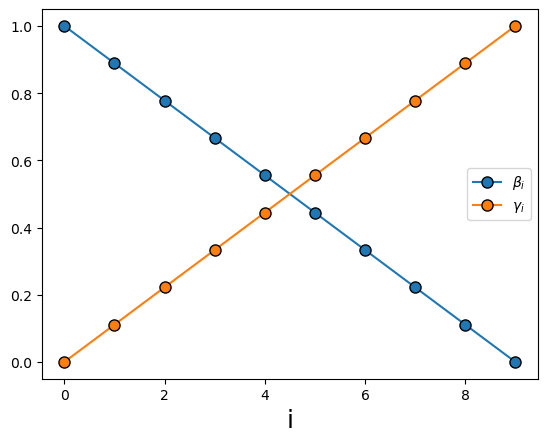

In [62]:
import matplotlib.pyplot as plt
# Annealing schedule for QAOA
betas = np.linspace(0, 1, 10)[::-1]  # Parameters for the mixer Hamiltonian
gammas = np.linspace(0, 1, 10)  # Parameters for the cost Hamiltonian (Our Knapsack problem)

fig, ax = plt.subplots()
ax.plot(betas, label=r"$\beta_i$", marker="o", markersize=8, markeredgecolor="black")
ax.plot(gammas, label=r"$\gamma_i$", marker="o", markersize=8, markeredgecolor="black")
ax.set_xlabel("i", fontsize=18)
ax.legend()
fig.show()

In [63]:
def from_Q_to_Ising(Q, offset):
    """Convert the matrix Q of Eq.3 into Eq.13 elements J and h"""
    n_qubits = len(Q)  # Get the number of qubits (variables) in the QUBO matrix
    # Create default dictionaries to store h and pairwise interactions J
    h = defaultdict(int)
    J = defaultdict(int)

    # Loop over each qubit (variable) in the QUBO matrix
    for i in range(n_qubits):
        # Update the magnetic field for qubit i based on its diagonal element in Q
        h[(i,)] -= Q[i, i] / 2
        # Update the offset based on the diagonal element in Q
        offset += Q[i, i] / 2
        # Loop over other qubits (variables) to calculate pairwise interactions
        for j in range(i + 1, n_qubits):
            # Update the pairwise interaction strength (J) between qubits i and j
            J[(i, j)] += Q[i, j] / 4
            # Update the magnetic fields for qubits i and j based on their interactions in Q
            h[(i,)] -= Q[i, j] / 4
            h[(j,)] -= Q[i, j] / 4
            # Update the offset based on the interaction strength between qubits i and j
            offset += Q[i, j] / 4
    # Return the magnetic fields, pairwise interactions, and the updated offset
    return h, J, offset


def energy_Ising(z, h, J, offset):
    """
    Calculate the energy of an Ising model given spin configurations.

    Parameters:
    - z: A dictionary representing the spin configurations for each qubit.
    - h: A dictionary representing the magnetic fields for each qubit.
    - J: A dictionary representing the pairwise interactions between qubits.
    - offset: An offset value.

    Returns:
    - energy: The total energy of the Ising model.
    """
    if isinstance(z, str):
        z = [(1 if int(i) == 0 else -1) for i in z]
    # Initialize the energy with the offset term
    energy = offset
    # Loop over the magnetic fields (h) for each qubit and update the energy
    for k, v in h.items():
        energy += v * z[k[0]]
    # Loop over the pairwise interactions (J) between qubits and update the energy
    for k, v in J.items():
        energy += v * z[k[0]] * z[k[1]]
    # Return the total energy of the Ising model
    return energy


# Our previous example should give us the same result
z_exp = [
    (1 if i == 0 else -1) for i in x_opt_slack
]  # Converting the optimal solution from (0,1) to (1, -1)
h, J, zoffset = from_Q_to_Ising(QT, offset)  # Eq.13 for our problem
energy = energy_Ising(
    z_exp, h, J, zoffset
)  # Caluclating the energy (Should be the same that for the QUBO)
print(f"Minimum energy:{energy}")

samples_slack = samples_dict(qaoa_circuit(gammas, betas, h, J, num_qubits=len(QT)), n_qubits)
values_slack = {
    sum_values(sample_i, values_list): count
    for sample_i, count in samples_slack.items()
    if sum_weight(sample_i, weights_list) <= maximum_weight
}  # saving only the solutions that fulfill the constraint
print(
    f"The number of optimal solutions using slack variables is {samples_slack[opt_str_slack]} out of {shots}"
)

Minimum energy:-71.0
The number of optimal solutions using slack variables is 20 out of 5000


In [64]:
from openqaoa.problems import FromDocplex2IsingModel
from docplex.mp.model import Model


def Knapsack(values, weights, maximum_weight):
    """Create a docplex model of the problem. (Docplex is a classical solver from IBM)"""
    n_items = len(values)
    mdl = Model()
    x = mdl.binary_var_list(range(n_items), name="x")
    cost = -mdl.sum(x[i] * values[i] for i in range(n_items))
    mdl.minimize(cost)
    mdl.add_constraint(mdl.sum(x[i] * weights[i] for i in range(n_items)) <= maximum_weight)
    return mdl


# Docplex model, we need to convert our problem in this format to use the unbalanced penalization approach
mdl = Knapsack(values_list, weights_list, maximum_weight)
lambda_1, lambda_2 = (
    0.96,
    0.0371,
)  # Parameters of the unbalanced penalization function (They are in the main paper)
ising_hamiltonian = FromDocplex2IsingModel(
    mdl,
    unbalanced_const=True,
    strength_ineq=[lambda_1, lambda_2],  # https://arxiv.org/abs/2211.13914
).ising_model

h_new = {
    tuple(i): w for i, w in zip(ising_hamiltonian.terms, ising_hamiltonian.weights) if len(i) == 1
}
J_new = {
    tuple(i): w for i, w in zip(ising_hamiltonian.terms, ising_hamiltonian.weights) if len(i) == 2
}

samples_unbalanced = samples_dict(
    qaoa_circuit(gammas, betas, h_new, J_new, num_qubits=n_items), n_items
)
values_unbalanced = {
    sum_values(sample_i, values_list): count
    for sample_i, count in samples_unbalanced.items()
    if sum_weight(sample_i, weights_list) <= maximum_weight
}  # saving only the solutions that fulfill the constraint

print(
    f"The number of solutions using unbalanced penalization is {samples_unbalanced[opt_str]} out of {shots}"
)

ModuleNotFoundError: No module named 'openqaoa'

NameError: name 'values_unbalanced' is not defined

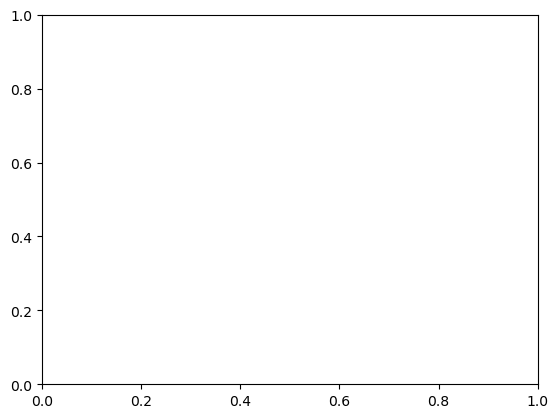

In [65]:
fig, ax = plt.subplots()
ax.hist(
    values_unbalanced.keys(),
    weights=values_unbalanced.values(),
    bins=50,
    edgecolor="black",
    label="unbalanced",
    align="right",
)
ax.hist(
    values_slack.keys(),
    weights=values_slack.values(),
    bins=50,
    edgecolor="black",
    label="slack",
    align="left",
)
ax.vlines(-min_cost, 0, 3000, linestyle="--", color="black", label="Optimal", linewidth=2)
ax.set_yscale("log")
ax.legend()
ax.set_ylabel("counts")
ax.set_xlabel("values")
fig.show()

# QAOA

In [13]:
import numpy as np
import networkx as nx

num_nodes = 4
w = np.array(
    [[0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 1.0, 1.0], [1.0, 1.0, 0.0, 1.0], [0.0, 1.0, 1.0, 0.0]]
)
G = nx.from_numpy_array(w)

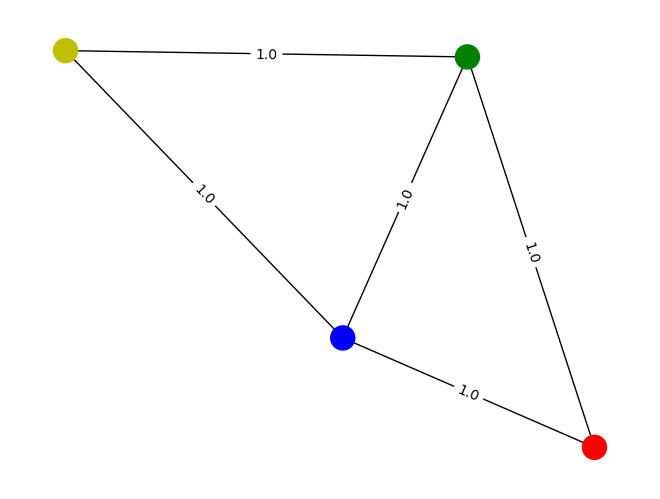

In [14]:
layout = nx.random_layout(G, seed=10)
colors = ["r", "g", "b", "y"]
nx.draw(G, layout, node_color=colors)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels);

In [15]:
from qiskit.quantum_info import Pauli, SparsePauliOp


def get_operator(weight_matrix):
    r"""Generate Hamiltonian for the graph partitioning
    Notes:
        Goals:
            1 Separate the vertices into two set of the same size.
            2 Make sure the number of edges between the two set is minimized.
        Hamiltonian:
            H = H_A + H_B
            H_A = sum\_{(i,j)\in E}{(1-ZiZj)/2}
            H_B = (sum_{i}{Zi})^2 = sum_{i}{Zi^2}+sum_{i!=j}{ZiZj}
            H_A is for achieving goal 2 and H_B is for achieving goal 1.
    Args:
        weight_matrix: Adjacency matrix.
    Returns:
        Operator for the Hamiltonian
        A constant shift for the obj function.
    """
    num_nodes = len(weight_matrix)
    pauli_list = []
    coeffs = []
    shift = 0

    for i in range(num_nodes):
        for j in range(i):
            if weight_matrix[i, j] != 0:
                x_p = np.zeros(num_nodes, dtype=bool)
                z_p = np.zeros(num_nodes, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(-0.5)
                shift += 0.5

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                x_p = np.zeros(num_nodes, dtype=bool)
                z_p = np.zeros(num_nodes, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(1.0)
            else:
                shift += 1

    return SparsePauliOp(pauli_list, coeffs=coeffs), shift


In [16]:
from qiskit.primitives import Sampler
from qiskit.quantum_info import Pauli
from qiskit.result import QuasiDistribution

from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA

from qiskit_algorithms.utils import algorithm_globals

sampler = Sampler()


def sample_most_likely(state_vector):
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)


algorithm_globals.random_seed = 10598

optimizer = COBYLA()
qaoa = QAOA(sampler, optimizer, reps=2)

result = qaoa.compute_minimum_eigenvalue(qubit_op)

x = sample_most_likely(result.eigenstate)

print(x)
print(f"Objective value computed by QAOA is {objective_value(x, w)}")


ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (/Users/glaucoreis/anaconda3/lib/python3.11/site-packages/qiskit/primitives/__init__.py)

In [38]:
!pip install qiskit.primitives

ERROR: Could not find a version that satisfies the requirement qiskit.primitives (from versions: none)
ERROR: No matching distribution found for qiskit.primitives


In [17]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.quantum_info import Operator

npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(Operator(qubit_op))

x = sample_most_likely(result.eigenstate)

print(x)
print(f"Objective value computed by the NumPyMinimumEigensolver is {objective_value(x, w)}")

ImportError: cannot import name 'BaseSampler' from 'qiskit.primitives' (/Users/glaucoreis/anaconda3/lib/python3.11/site-packages/qiskit/primitives/__init__.py)

# QAOA 2

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from scipy.optimize import minimize
from collections import defaultdict
from typing import Sequence
 
 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

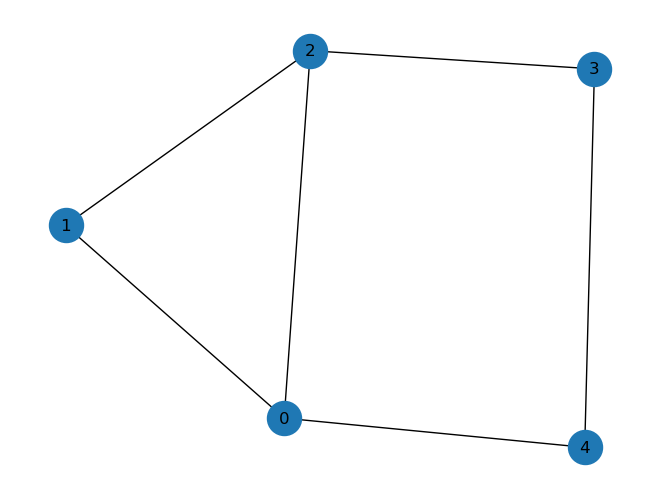

In [19]:
n = 5
 
graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
edge_list = [
    (0, 1, 1.0),
    (0, 2, 1.0),
    (0, 4, 1.0),
    (1, 2, 1.0),
    (2, 3, 1.0),
    (3, 4, 1.0),
]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

In [20]:
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.
 
    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in list(graph.edge_list()):
        weight = graph.get_edge_data(edge[0], edge[1])
        pauli_list.append(("ZZ", [edge[0], edge[1]], weight))
    return pauli_list
 
 
max_cut_paulis = build_max_cut_paulis(graph)
cost_hamiltonian = SparsePauliOp.from_sparse_list(max_cut_paulis, n)
print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIIZZ', 'IIZIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZZIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()
 
circuit.decompose().draw("mpl")

In [21]:
circuit.parameters

NameError: name 'circuit' is not defined

In [22]:
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)
print(backend)
 
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
 
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

<IBMBackend('ibm_torino')>


NameError: name 'circuit' is not defined

# QAOA 3

In [54]:
import pennylane as qml

H = qml.Hamiltonian([1, 1, 0.5], [qml.PauliX(0), qml.PauliZ(1), qml.PauliX(0) @ qml.PauliX(1)])
print(H)


1 * X(0) + 1 * Z(1) + 0.5 * (X(0) @ X(1))


In [55]:
dev = qml.device("default.qubit", wires=2)

t = 1
n = 2


@qml.qnode(dev)
def circuit():
    qml.ApproxTimeEvolution(H, t, n)
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]


print(qml.draw(circuit, level="device")())

0: ──RX(1.00)─╭RXX(0.50)──RX(1.00)─╭RXX(0.50)─┤  <Z>
1: ──RZ(1.00)─╰RXX(0.50)──RZ(1.00)─╰RXX(0.50)─┤  <Z>


In [56]:
def circ(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])


@qml.qnode(dev)
def circuit(param):
    circ(param)
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]


print(qml.draw(circuit)(0.5))

0: ──RX(0.50)─╭●─┤  <Z>
1: ──H────────╰X─┤  <Z>


In [57]:
@qml.qnode(dev)
def circuit(params, **kwargs):
    qml.layer(circ, 3, params)
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]


print(qml.draw(circuit)([0.3, 0.4, 0.5]))

0: ──RX(0.30)─╭●──RX(0.40)─╭●──RX(0.50)─╭●─┤  <Z>
1: ──H────────╰X──H────────╰X──H────────╰X─┤  <Z>


In [58]:
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

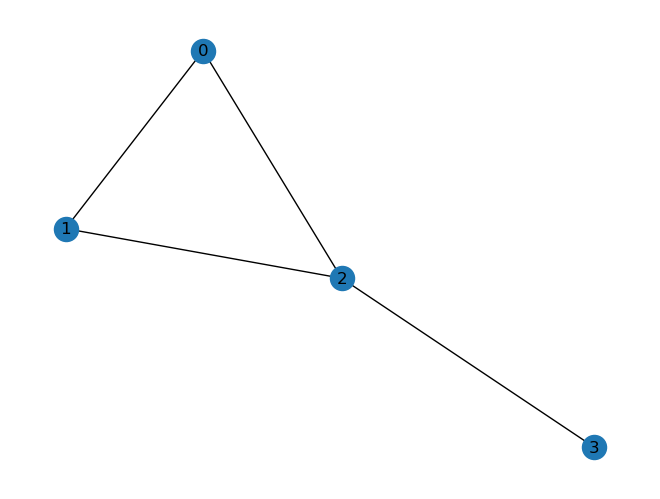

In [59]:
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)
positions = nx.spring_layout(graph, seed=1)

nx.draw(graph, with_labels=True, pos=positions)
plt.show()

In [60]:
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian 0.75 * (Z(0) @ Z(1)) + 0.75 * Z(0) + 0.75 * Z(1) + 0.75 * (Z(0) @ Z(2)) + 0.75 * Z(0) + 0.75 * Z(2) + 0.75 * (Z(1) @ Z(2)) + 0.75 * Z(1) + 0.75 * Z(2) + 0.75 * (Z(2) @ Z(3)) + 0.75 * Z(2) + 0.75 * Z(3) + -1.0 * Z(0) + -1.0 * Z(1) + -1.0 * Z(2) + -1.0 * Z(3)
Mixer Hamiltonian 1 * X(0) + 1 * X(1) + 1 * X(2) + 1 * X(3)


In [61]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [62]:
wires = range(4)
depth = 2


def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [63]:
dev = qml.device("qulacs.simulator", wires=wires)


@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

DeviceError: Device qulacs.simulator does not exist. Make sure the required plugin is installed.

In [64]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [65]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

NameError: name 'cost_function' is not defined

# grafos

In [23]:
def draw_graph(G, colors):
    pos = nx.spring_layout(graph)
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='black')

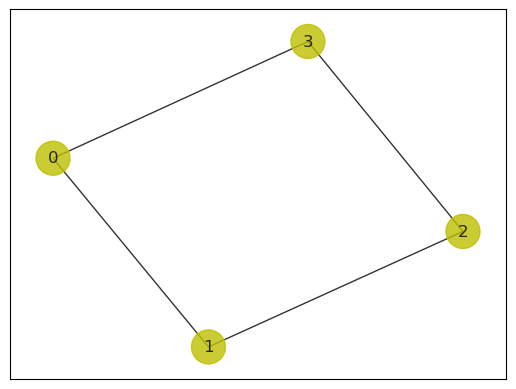

In [24]:
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3])
graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
colors = ['y'for node in graph.nodes]
draw_graph(graph, colors)

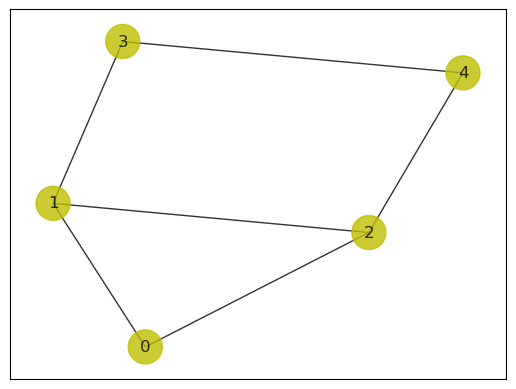

In [25]:
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3, 4])
graph.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)])
colors = ['y'for node in graph.nodes]
draw_graph(graph, colors)

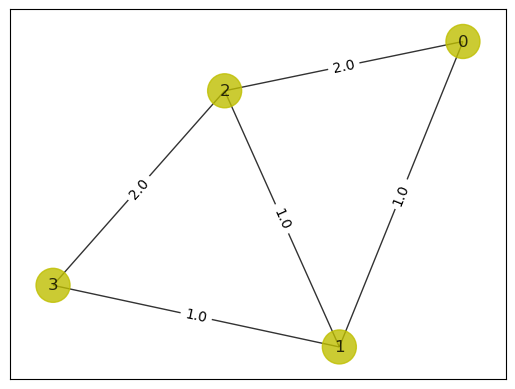

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3])
graph.add_weighted_edges_from([(0, 1, 1.0), (0, 2, 2.0), \
(1, 2, 1.0), (1, 3, 1.0), (2,3, 2.0)])
colors = ['y'for node in graph.nodes]
draw_graph(graph, colors)

In [27]:
import numpy as np
n = 4
weight_matrix = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        edge = graph.get_edge_data(i,j,default=0)
        type(edge)
        if edge != 0:
            weight_matrix[i,j] = edge['weight'] 
print(weight_matrix)

[[0. 1. 2. 0.]
 [1. 0. 1. 1.]
 [2. 1. 0. 2.]
 [0. 1. 2. 0.]]


bitstring = [0, 0, 0, 0] cutvalue = 0.0
bitstring = [1, 0, 0, 0] cutvalue = 3.0
bitstring = [0, 1, 0, 0] cutvalue = 3.0
bitstring = [1, 1, 0, 0] cutvalue = 4.0
bitstring = [0, 0, 1, 0] cutvalue = 5.0
bitstring = [1, 0, 1, 0] cutvalue = 4.0
bitstring = [0, 1, 1, 0] cutvalue = 6.0
bitstring = [1, 1, 1, 0] cutvalue = 3.0
bitstring = [0, 0, 0, 1] cutvalue = 3.0
bitstring = [1, 0, 0, 1] cutvalue = 6.0
bitstring = [0, 1, 0, 1] cutvalue = 4.0
bitstring = [1, 1, 0, 1] cutvalue = 5.0
bitstring = [0, 0, 1, 1] cutvalue = 4.0
bitstring = [1, 0, 1, 1] cutvalue = 3.0
bitstring = [0, 1, 1, 1] cutvalue = 3.0
bitstring = [1, 1, 1, 1] cutvalue = 0.0

Melhor solução = [0, 1, 1, 0] custo = 6.0


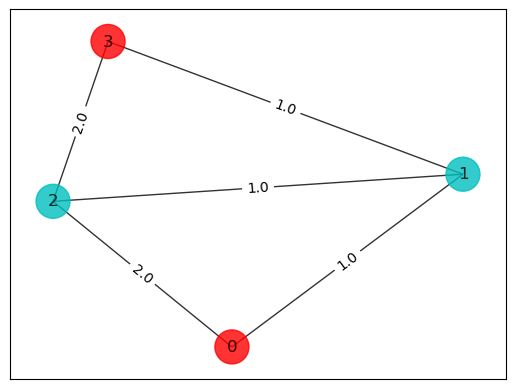

In [28]:
best_cost_brute = best_sol_brute = 0
for bit_string in range(2**n):
    solution = [int(t) for t in reversed(list(bin(bit_string)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + weight_matrix[i,j]*solution[i]*(1-solution[j])
    # Salva melhor solução
    if best_cost_brute < cost:
        best_cost_brute = cost
        best_sol_brute = solution 
    print('bitstring = ' + str(solution) + ' cutvalue = ' + str(cost))

colors = ['r' if best_sol_brute[i] == 0 else 'c' for i in range(n)]
draw_graph(graph, colors)
print('\nMelhor solução = ' + str(best_sol_brute) + ' custo = ' + str(best_cost_brute)) 

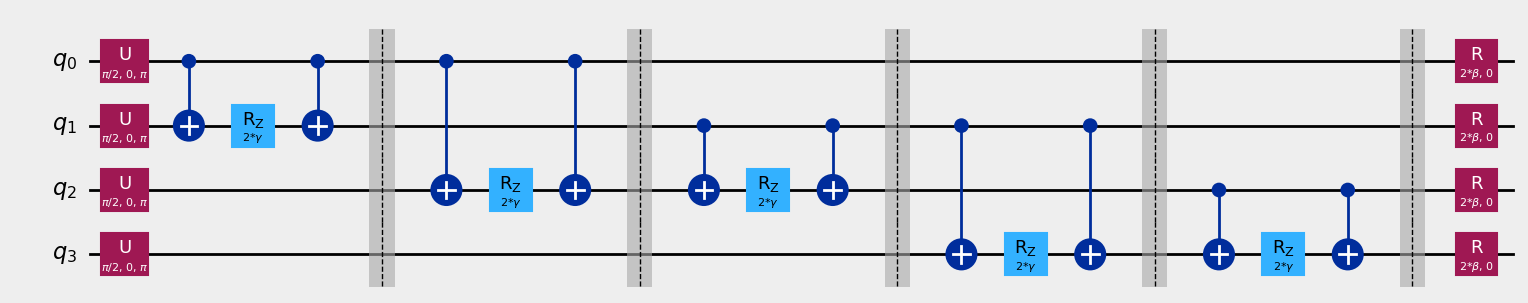

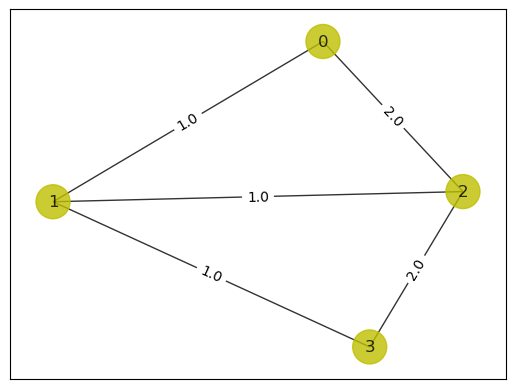

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3])
graph.add_weighted_edges_from([(0, 1, 1.0), (0, 2, 2.0), (1, 2, 1.0), (1, 3, 1.0), (2,3, 2.0)])
colors = ['y'for node in graph.nodes]
draw_graph(graph, colors)

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(graph).todense()

N_QUBITS = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_mix.rx(2 * beta, i)

#qc_mix.draw()
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(N_QUBITS)
for pair in list(graph.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()

#qc_p.decompose().draw()
qc_0 = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_0.h(i)

#qc_0.draw()
qc_qaoa = QuantumCircuit(N_QUBITS)
qc_qaoa.append(qc_0, range(N_QUBITS))
qc_qaoa.append(qc_p, range(N_QUBITS))
qc_qaoa.append(qc_mix, range(N_QUBITS))

qc_qaoa.decompose().decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [30]:
def create_qaoa_circ(graph, theta):
    nqubits = len(graph.nodes())
    n_layers = len(theta)//2  # divide em dois grupos
    beta = theta[:n_layers]
    gamma = theta[n_layers:]

    qc = QuantumCircuit(nqubits)

    # estado inicial todos os QUBITs em Hadamard
    qc.h(range(nqubits))

    for layer_index in range(n_layers):
        # Para cada aresta efetua uma rotação em ZZ
        for pair in list(graph.edges()):
            qc.rzz(2 * gamma[layer_index], pair[0], pair[1])
        # Ao final de cada grupo rotaciona em X
        for qubit in range(nqubits):
            qc.rx(2 * beta[layer_index], qubit)
    return qc

In [31]:
def maxcut_obj(solution, graph):
    """Efetua a somatória de valores dos pesos para um vértice"""
    obj = 0
    for i, j in graph.edges():
        if solution[i] != solution[j]:
            obj -= 1
    return obj


def compute_expectation(counts, graph):
    """Calcula a média para os valores desta combinação"""
    avg = 0
    sum_count = 0
    for bit_string, count in counts.items():
        obj = maxcut_obj(bit_string, graph)
        avg += obj * count
        sum_count += count
    return avg/sum_count

# executa o circuito com os novos parâmetros
def get_expectation(graph, shots=512):
    """Esta rotina cria o circuito parametrizado e obtém resultados dele"""
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots

    def execute_circ(theta):
        qc = create_qaoa_circ(graph, theta)
        qc.measure_all()
        counts = backend.run(qc, seed_simulator=10,
                             nshots=512).result().get_counts()
        expectation = compute_expectation(counts, graph)
        print("theta", theta, "Expectation", expectation)
        return expectation

    return execute_circ

In [32]:
from scipy.optimize import minimize
expectation = get_expectation(graph)
res = minimize(expectation,
               [1.0, 1.0],
               method='COBYLA')
res

theta [1. 1.] Expectation -2.8115234375
theta [2. 1.] Expectation -2.9462890625
theta [2. 2.] Expectation -2.7763671875
theta [2.62139471 0.21650232] Expectation -2.931640625
theta [2.36580096 1.34086604] Expectation -2.6982421875
theta [1.91478349 1.09145024] Expectation -2.7900390625
theta [2.09094391 0.76712835] Expectation -2.3759765625
theta [2.08156194 1.05785889] Expectation -3.001953125
theta [2.16858258 1.00859016] Expectation -3.076171875
theta [2.26713731 0.99165013] Expectation -3.0859375
theta [2.25521745 0.89236308] Expectation -2.8994140625
theta [2.27816217 1.04041951] Expectation -3.09765625
theta [2.30524355 1.08245044] Expectation -3.078125
theta [2.25470514 1.04906632] Expectation -3.095703125
theta [2.28429243 1.04832014] Expectation -3.08984375
theta [2.28211249 1.03735438] Expectation -3.0947265625
theta [2.26851759 1.03777716] Expectation -3.09765625
theta [2.27948335 1.03559722] Expectation -3.09375
theta [2.27750159 1.04283065] Expectation -3.0947265625
theta 

 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -3.099609375
       x: [ 2.278e+00  1.039e+00]
    nfev: 27
   maxcv: 0.0

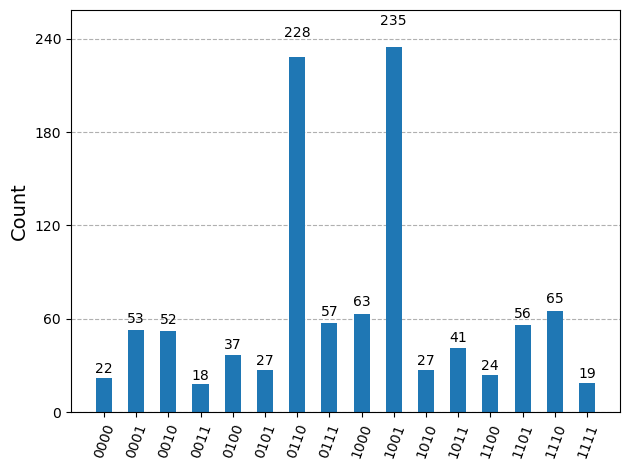

In [33]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 512

qc_res = create_qaoa_circ(graph, res.x)
qc_res.measure_all()
counts = backend.run(qc_res, seed_simulator=10).result().get_counts()
plot_histogram(counts)

# END QAOA

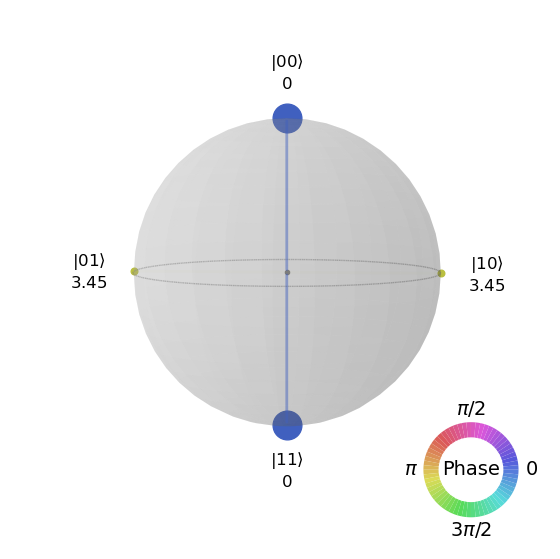

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from([0, 1])
graph.add_weighted_edges_from([(0, 1, 2.0)])
nqubits = 2
qc = create_qaoa_circ(graph,[2.0,1.0])

#qc.decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)

#qc.measure_all()
#counts = backend.run(qc, seed_simulator=10).result().get_counts()
#plot_histogram(counts)

#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

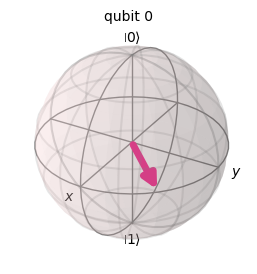

In [33]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(math.pi/4, 0)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

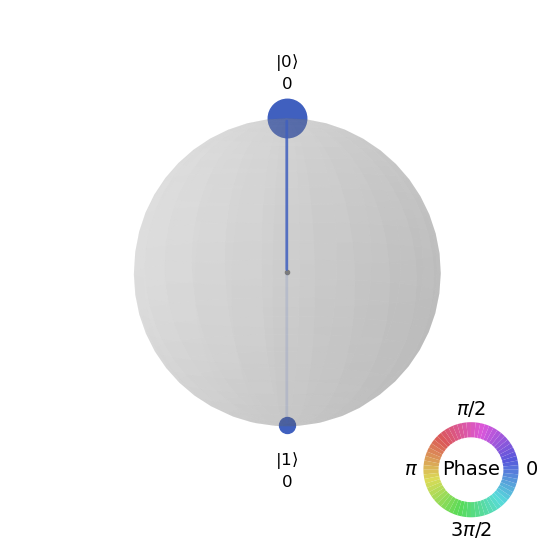

In [48]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(math.pi/4, 0)
qc.rx(math.pi/2, 0)
# qc.measure_all()
# counts = backend.run(qc, seed_simulator=10).result().get_counts()
# plot_histogram(counts)
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)


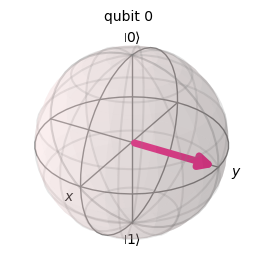

In [50]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(math.pi/2, 0)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

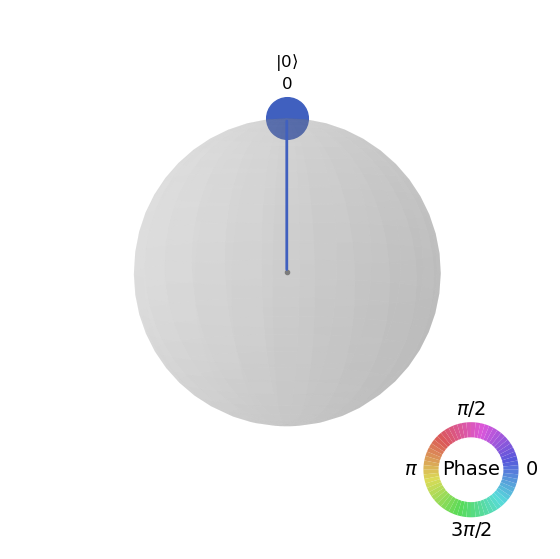

In [49]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(math.pi/2, 0)
qc.rx(math.pi/2, 0)
# qc.measure_all()
# counts = backend.run(qc, seed_simulator=10).result().get_counts()
# plot_histogram(counts)
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = False)


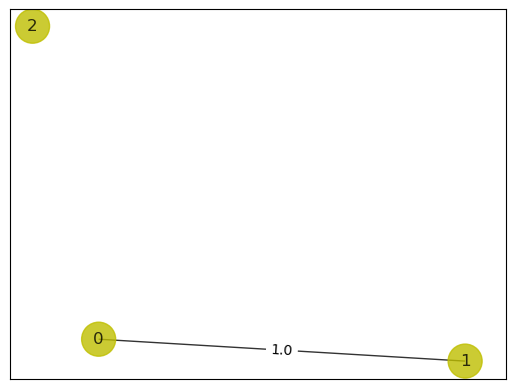

In [94]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from([0, 1, 2])
graph.add_weighted_edges_from([(0, 1, 1.0)]) #,(0,2, 1.0)])
colors = ['y'for node in graph.nodes]
draw_graph(graph, colors)

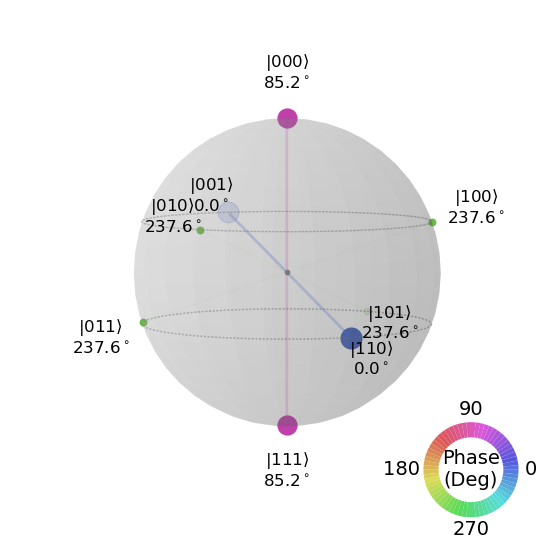

In [93]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(graph).todense()

N_QUBITS = 3

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_mix.rx(2 * beta, i)

#qc_mix.draw()
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(N_QUBITS)
for pair in list(graph.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()

#qc_p.decompose().draw()
qc_0 = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_0.h(i)

#qc_0.draw()
qc_qaoa = QuantumCircuit(N_QUBITS)
qc_qaoa.append(qc_0, range(N_QUBITS))
qc_qaoa.append(qc_p, range(N_QUBITS))
qc_qaoa.append(qc_mix, range(N_QUBITS))

#qc_qaoa.decompose().decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

qc = create_qaoa_circ(graph,[0.866,1.0])
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

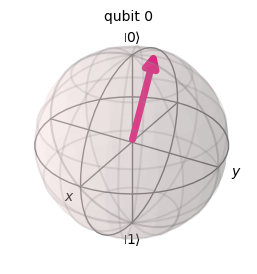

In [128]:
# circuito 1
qc = QuantumCircuit(1)
qc.h(0)
# rotacionando 4 vezes 30 graus
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)


qc.rx(math.pi/2, 0)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

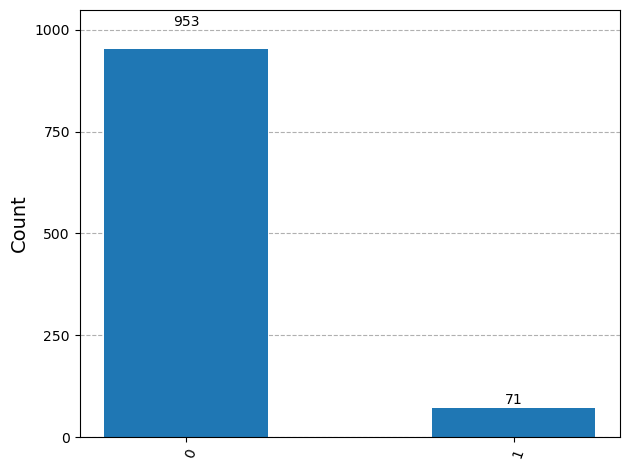

In [129]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 512

qc.measure_all()
counts = backend.run(qc, seed_simulator=10).result().get_counts()
plot_histogram(counts)

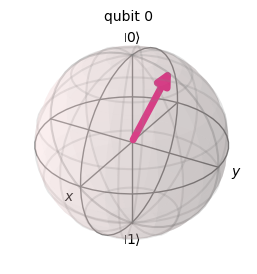

In [131]:
# circuito 1
qc = QuantumCircuit(1)
qc.h(0)
# rotacionando 4 vezes 30 graus
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)
qc.rz(math.pi / 6, 0)

qc.rx(math.pi/2, 0)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

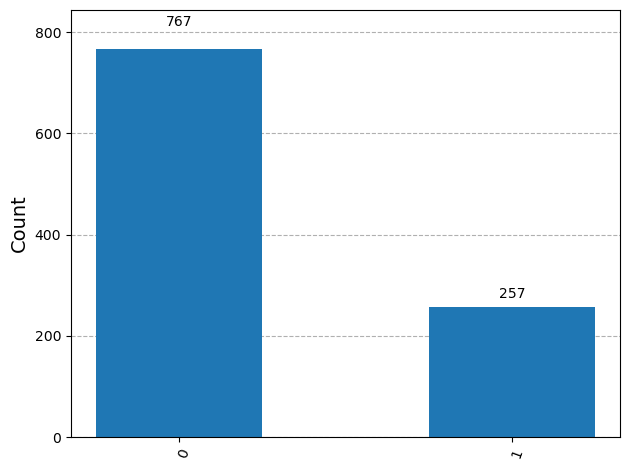

In [132]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 512

qc.measure_all()
counts = backend.run(qc, seed_simulator=10).result().get_counts()
plot_histogram(counts)

# MAXCUT & QAOA 3

In [48]:
import numpy as np

url = "https://raw.githubusercontent.com/Wikstahl/autumn-school-qas2024/refs/heads/main/data/"
#A = np.loadtxt(url + "instance_8.csv", delimiter=",")  # load problem data
A = np.loadtxt("instance_small.csv", delimiter=",")  # load problem data

num_rows, num_cols = A.shape
print(f"Number of flights equals {num_rows}, and number of routes equals {num_cols}.")


Number of flights equals 4, and number of routes equals 4.


In [49]:
def QUBO(A: np.ndarray) -> np.ndarray:
    num_rows = A.shape[0]
    id_vec = np.ones((num_rows, 1))  # create column vector with ones
    Q = A.transpose() @ A - 2 * np.diag((A.T @ id_vec).flatten())
    return Q


Q = QUBO(A)
print(Q)

[[-2.  1.  1.  1.]
 [ 1. -3.  2.  1.]
 [ 1.  2. -3.  0.]
 [ 1.  1.  0. -1.]]


In [50]:
from qiskit.quantum_info import SparsePauliOp


def generate_pauli_terms(Q: np.ndarray, b: np.ndarray) -> list[tuple[str, float]]:
    """Construct the cost Hamiltonian.

    Args:
        Q (ndarray): NxN symmetric matrix of coefficients for Z_i Z_j terms.
        b (ndarray): N-dimensional array coefficients for Z_i terms.

    Returns:
        pauli_list: List of (Pauli string, coefficient) pairs
                    representing the Hamiltonian terms.
    """
    N = len(b)  # number of qubits

    pauli_list = []

    # Two-qubit terms
    for i in range(N - 1):
        for j in range(i + 1, N):
            if Q[i, j] != 0:
                # Create a Pauli string with "Z" at positions i and j
                paulis = ["I"] * N
                paulis[i], paulis[j] = "Z", "Z"
                coeff = (
                    # multiply by a factor 2 since we are
                    # only summing the upper triangular of Q
                    2 * Q[i, j] / 4
                )
                pauli_list.append(("".join(paulis)[::-1], coeff))

    # Single-qubit terms
    for i in range(N):
        if b[i] != 0:
            # Create a Pauli string with "Z" at position i
            paulis = ["I"] * N
            paulis[i] = "Z"
            coeff = b[i] / 4
            pauli_list.append(("".join(paulis)[::-1], coeff))

    return pauli_list


b = -sum(Q[i, :] + Q[:, i] for i in range(Q.shape[0]))
pauli_terms = generate_pauli_terms(Q, b)
cost_hamiltonian = SparsePauliOp.from_list(pauli_terms)

print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'IIIZ', 'IIZI', 'ZIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  1. +0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j])


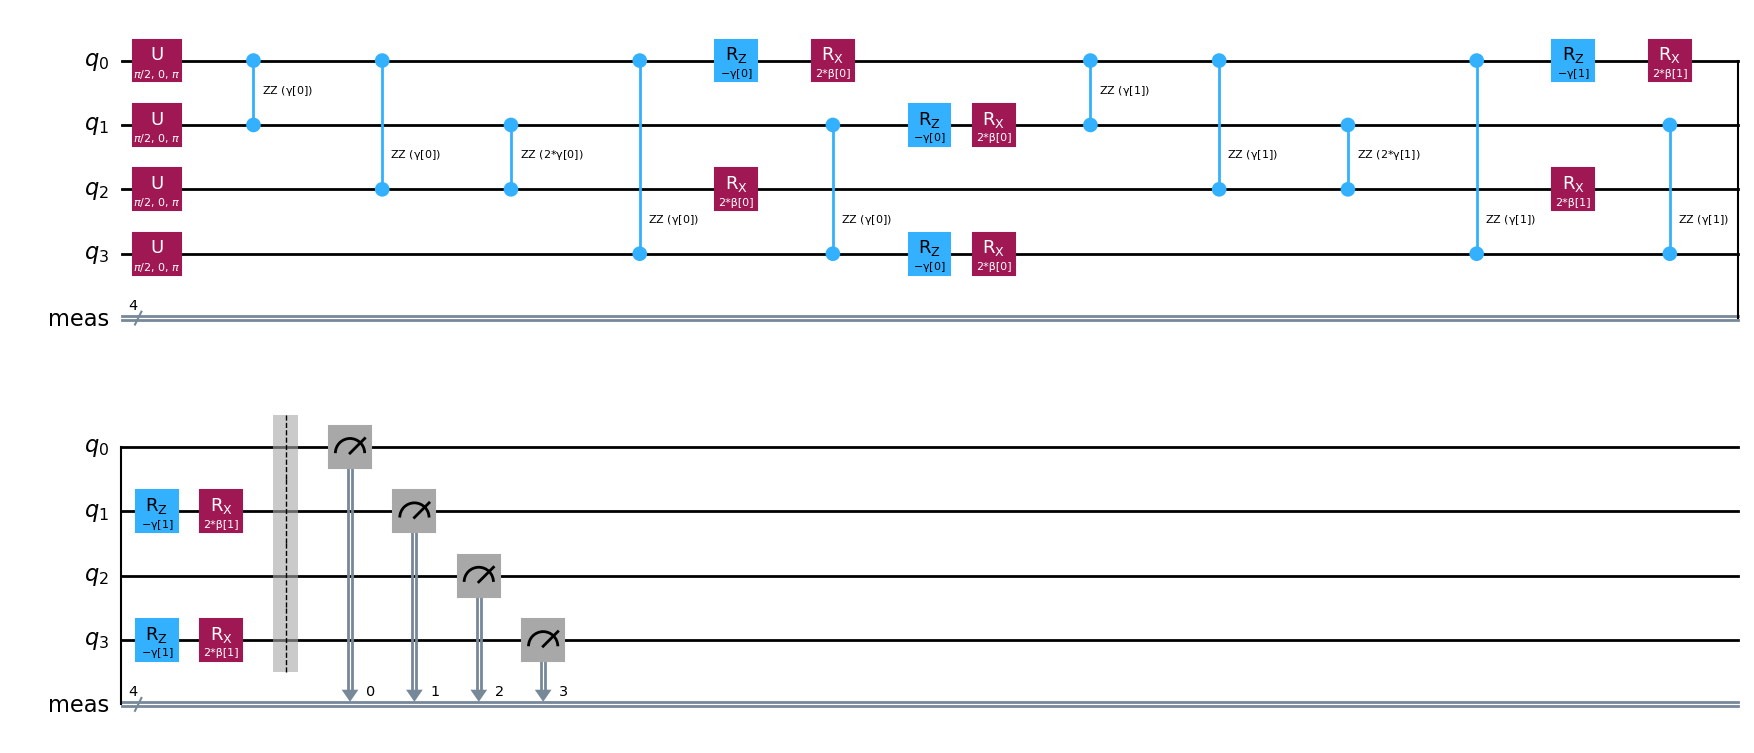

In [51]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.decompose().decompose().draw("mpl")

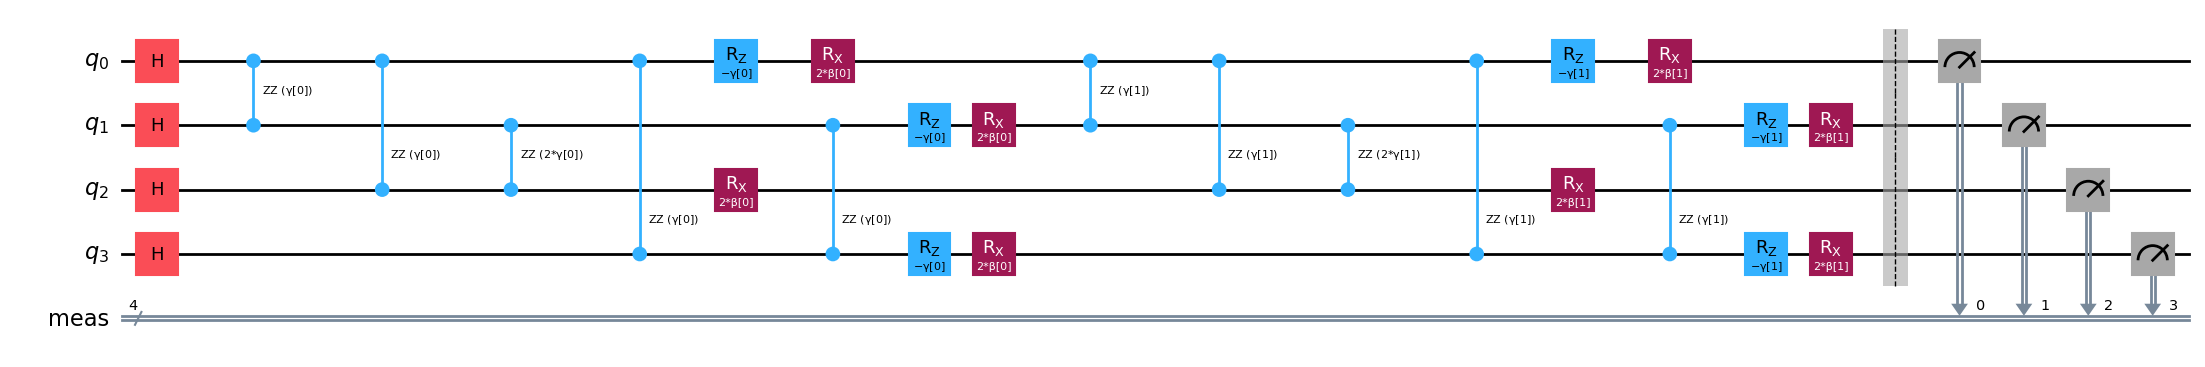

In [52]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

# Choose backend (this can either be a simulator or a real qc backend.)
backend = AerSimulator()

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)

candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [53]:
init_params = [2.5, 2.5, 0.1, 0.1]
print(init_params)

[2.5, 2.5, 0.1, 0.1]


# smaller problem

In [41]:
import numpy as np

#url = "https://raw.githubusercontent.com/Wikstahl/autumn-school-qas2024/refs/heads/main/data/"
#url = "file:///Users/glaucoreis/Desktop/"
A = np.loadtxt("instance_small.csv", delimiter=",")  # load problem data
#A = np.loadtxt(url + "instance_8.csv", delimiter=",")  # load problem data
num_rows, num_cols = A.shape
print(f"Number of flights equals {num_rows}, and number of routes equals {num_cols}.")
print(A)

Number of flights equals 4, and number of routes equals 4.
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]


In [42]:
def QUBO(A: np.ndarray) -> np.ndarray:
    num_rows = A.shape[0]
    id_vec = np.ones((num_rows, 1))  # create column vector with ones
    Q = A.transpose() @ A - 2 * np.diag((A.T @ id_vec).flatten())
    return Q


Q = QUBO(A)
print(Q)

[[-2.  1.  1.  1.]
 [ 1. -3.  2.  1.]
 [ 1.  2. -3.  0.]
 [ 1.  1.  0. -1.]]


In [43]:
from qiskit.quantum_info import SparsePauliOp


def generate_pauli_terms(Q: np.ndarray, b: np.ndarray) -> list[tuple[str, float]]:
    """Construct the cost Hamiltonian.

    Args:
        Q (ndarray): NxN symmetric matrix of coefficients for Z_i Z_j terms.
        b (ndarray): N-dimensional array coefficients for Z_i terms.

    Returns:
        pauli_list: List of (Pauli string, coefficient) pairs
                    representing the Hamiltonian terms.
    """
    N = len(b)  # number of qubits

    pauli_list = []

    # Two-qubit terms
    for i in range(N - 1):
        for j in range(i + 1, N):
            if Q[i, j] != 0:
                # Create a Pauli string with "Z" at positions i and j
                paulis = ["I"] * N
                paulis[i], paulis[j] = "Z", "Z"
                coeff = (
                    # multiply by a factor 2 since we are
                    # only summing the upper triangular of Q
                    2 * Q[i, j] / 4
                )
                pauli_list.append(("".join(paulis)[::-1], coeff))

    # Single-qubit terms
    for i in range(N):
        if b[i] != 0:
            # Create a Pauli string with "Z" at position i
            paulis = ["I"] * N
            paulis[i] = "Z"
            coeff = b[i] / 4
            pauli_list.append(("".join(paulis)[::-1], coeff))

    return pauli_list


b = -sum(Q[i, :] + Q[:, i] for i in range(Q.shape[0]))
pauli_terms = generate_pauli_terms(Q, b)
cost_hamiltonian = SparsePauliOp.from_list(pauli_terms)

print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'IIIZ', 'IIZI', 'ZIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  1. +0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j])


In [44]:
Q = QUBO(A)
b = -sum(Q[i, :] + Q[:, i] for i in range(Q.shape[0]))
pauli_terms = generate_pauli_terms(Q, b)
cost_hamiltonian = SparsePauliOp.from_list(pauli_terms)
cost_hamiltonian

SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'IIIZ', 'IIZI', 'ZIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  1. +0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j])

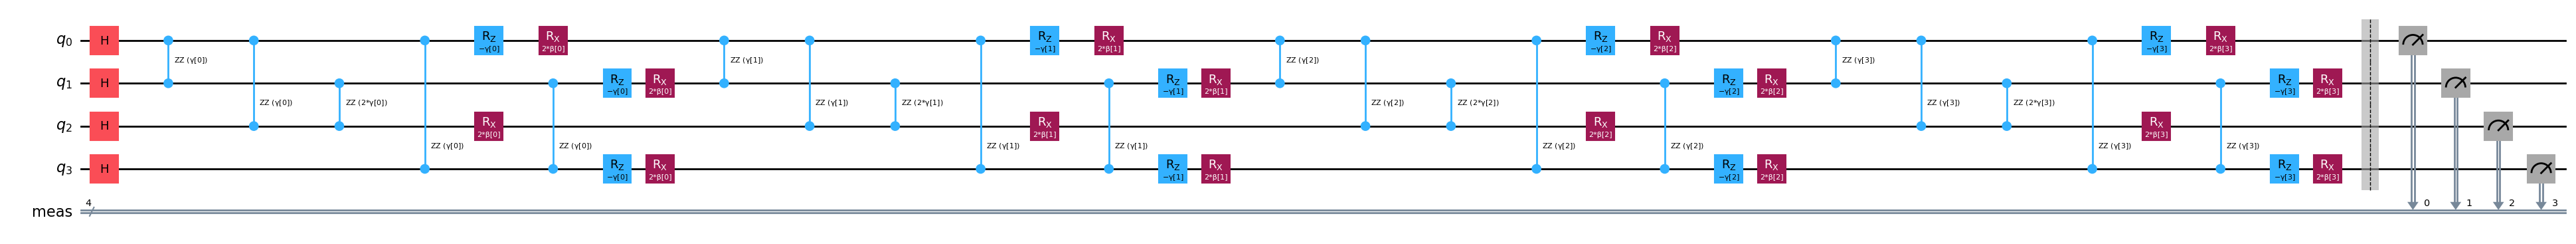

In [45]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=4)
circuit.measure_all()

# Choose backend (this can either be a simulator or a real qc backend.)
backend = AerSimulator()

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
candidate_circuit = pm.run(circuit)

candidate_circuit = pm.run(candidate_circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [37]:
# Theoretical pre-calculated optimal parameters
optimal_params = [2.3562, 2.3562, 1.5708, 1.5708]
optimized_circuit = candidate_circuit.assign_parameters(optimal_params)

ValueError: Mismatching number of values and parameters. For partial binding please pass a mapping of {parameter: value} pairs.

In [84]:
optimized_circuit.draw("mpl")

NameError: name 'optimized_circuit' is not defined

In [55]:
# sampler = Sampler(mode=backend, options={"default_shots": 4_000})
# pub = (optimized_circuit,)
# job = sampler.run([pub])
backend = Aer.get_backend('aer_simulator')
backend.shots = 512

# optimized_circuit.measure_all()
counts = backend.run(optimized_circuit, seed_simulator=10).result().get_counts()
plot_histogram(counts)

NameError: name 'optimized_circuit' is not defined

In [40]:
# Look through samples to see if any of the bit strings solve the problem
for bit_str in counts_bin.keys():
    if classical_cost_fun(bit_str, A) == 0:
        print("Valid solution found:", bit_str)
        break
x, prob = highest_probability_bitstring(final_distribution_bin)

NameError: name 'counts_bin' is not defined

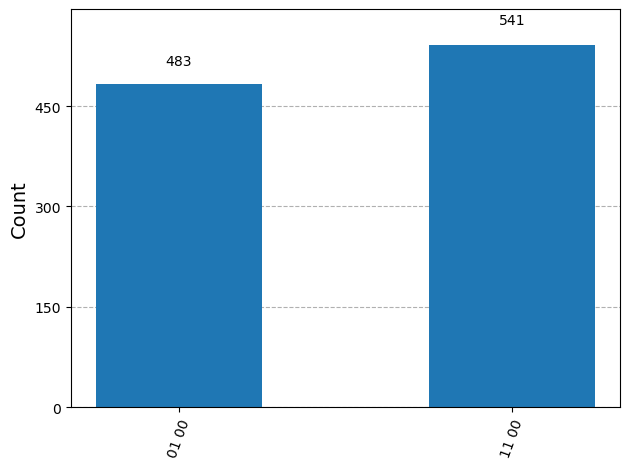

In [43]:
#f(0)=0 e X=1
qc = QuantumCircuit(2,2)
qc.x(0)
qc.barrier(0,1)
qc.h([0,1])
qc.cx(0,1)
qc.h(0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
# matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)
qc.measure_all()
backend = Aer.get_backend('aer_simulator')
backend.shots = 512
counts = backend.run(qc, seed_simulator=10).result().get_counts()
plot_histogram(counts)
# matrix = Statevector.from_instruction(qc)
# plot_bloch_multivector(matrix, figsize=[3,3])

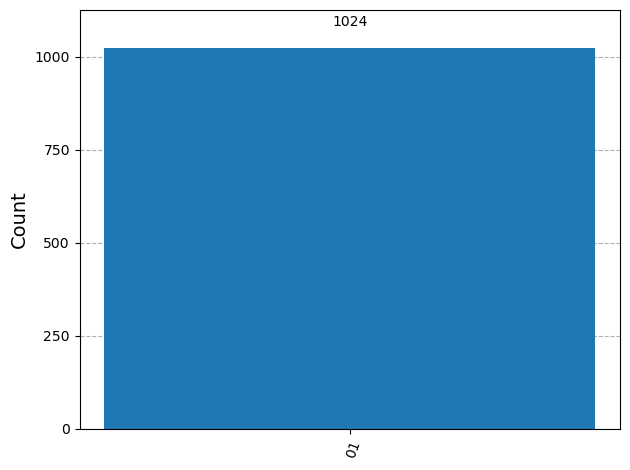

In [45]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.measure([0,1],[0,1])
backend = Aer.get_backend('aer_simulator')
backend.shots = 512
counts = backend.run(qc, seed_simulator=10).result().get_counts()
plot_histogram(counts)
